# **Definição do Objetivo**
A representação feminina nos bastidores de hollywood, embora em tendência ascendente, também não tem sido maravilhosa. Segundo a Forbes, “Entre 2008 e 2022, houve 325 nomeações para diretores em grandes eventos de premiação – apenas 8,9% dessas nomeações foram dadas a diretoras. Num estudo patrocinado pela Universidade Estadual de San Diego com foco nos 250 filmes de maior bilheteria de 2021 nos EUA, apenas 25% dos papéis nos bastidores foram preenchidos por mulheres. A porcentagem de editoras era de 22% e ainda menor, de 17% para diretores e roteiristas. O número de diretoras de fotografia era péssimo, seis em cada 100. Quando se trata de cargos de alto nível em mídia e entretenimento, apenas 27% são ocupados por mulheres. ”

Atualmente, diante do sucesso do filme “Barbie” e das grandes produções realizadas por diretoras neste ano, o questionamento a seguir surgiu como objetivo de investigação:

***Vale a pena investir no trabalho realizado por mulheres em filmes?***

# **Tipo de problema**

A investigação está ligada a dizer se os filmes avaliados são ou não rentáveis, sendo assim estudamos um problema de aprendizado supervisionado, pois temos dados passados para a predição, a princípio de regressão, pois nossos dados são númericos e queremos prever o quanto o filme é rentável através dos valores de receita.
Porém o problema também pode ser analisado por classes: rentáveis ou não rentáveis o que o torna um problema de classificação.

# **Atributos do Datase - Catálogo de dados**

Vamos começar importando os dados do dataset

# Importação de pacotes


In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
import statsmodels.api as sm
import statistics

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [1]:
#Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

NameError: name 'pd' is not defined

: 

In [ ]:
# Informa a URL de importação do dataset
url_movies = 'https://raw.githubusercontent.com/anakrol72/analise_de_dados_e_boas_praticas/main/movies.json'
url_ratings = 'https://raw.githubusercontent.com/anakrol72/analise_de_dados_e_boas_praticas/main/ratings.tsv'
url_tmdb_movies = 'https://raw.githubusercontent.com/anakrol72/analise_de_dados_e_boas_praticas/main/tmdb_5000_movies.csv'

In [ ]:
# Lê o arquivo
df_movies = pd.read_json(url_movies)
df_ratings = pd.read_table(url_ratings)
df_tmdb_movies = pd.read_csv(url_tmdb_movies)

# df_movies

In [ ]:
#Visualizando as 5 primeiras linhas
df_movies.head()

title  year  \
0  Execution_of_Czolgosz_with_Panorama_of_Auburn_...  1901   
1                      Jack_and_the_Beanstalk_(1902)  1902   
2                    The_Little_Train_Robbery_(1905)  1905   
3                    Dream_of_a_Rarebit_Fiend_(1906)  1906   
4                         Devil_in_Miss_Jones_(1973)  1973   

                                     genre        _id  \
0                  [Drama, History, Short]  tt0000353   
1                         [Fantasy, Short]  tt0000399   
2  [Action, Crime, Family, Short, Western]  tt0000521   
3                         [Fantasy, Short]  tt0000546   
4                  [Adult, Drama, Fantasy]  tt0069969   

                                            director  \
0  [{'name': 'Edwin S. Porter', 'gender': 'male',...   
1  [{'name': 'George S. Fleming', 'gender': 'male...   
2  [{'name': 'Edwin S. Porter', 'gender': 'male',...   
3  [{'name': 'Wallace McCutcheon', 'gender': 'mal...   
4  [{'name': 'Gerard Damiano', 'gender': 'male', ...   

                                          all_actors  gender_percent  \
0                                                NaN             NaN   
1  [{'name': 'Thomas White', 'url': 'nm0925513', ...            0.00   
2                                                NaN             NaN   
3  [{'name': 'Jack Brawn', 'url': 'nm0106151', 'g...            0.00   
4  [{'name': 'John Clemens', 'url': 'nm0166031', ...           37.00   

   adjusted_budget producer  
0              NaN      NaN  
1              NaN      NaN  
2              NaN      NaN  
3              NaN      NaN  
4       171,875.00      NaN

In [ ]:
#Visualizando as colunas do dataset df_movies
df_movies.columns

Index(['title', 'year', 'genre', '_id', 'director', 'all_actors',
       'gender_percent', 'adjusted_budget', 'producer'],
      dtype='object')

## **Descrição dos atributos - df_movies**

Contém as seguintes informações sobre 15.425 filmes:

* **_id** - identificador exclusivo do filme na IMDb.
* **adjusted_budget** - orçamento do filme, se presente no IMDb, ajustado pela inflação de 2014. Presente apenas em cerca de 36% dos filmes.
* **all_actors** - lista de três argumentos [gender (gênero), URL, name(nome)] para cada ator do elenco. Cada lista de três argumentos corresponde a gender (gênero), _id e name(nome) do próprio arquivo actors.json(arquivo associado, mas não utilizado para análise), respectivamente.
* **director** - lista de quatro argumentos [(name(nome), URL, type(tipo), gender(gênero)] para cada diretor do filme. O argumento type(tipo) pode conter três tipos de dados: 'diretor', 'main_casting' ou 'secondary_casting'. Os campos restantes correspondem a name(nome), _id e gender(gênero) de directors.json(arquivo associado, mas não utilizado para análise), respectivamente.
* **producer** - lista de quatro argumentos [(name(nome), URL, role(função), gender(gênero)] para cada produtor do filme. A função(role) indica a função específica do produtor: produtor, produtor associado, produtor executivo, produtor de linha, etc. Os campos restantes correspondem aos campos name(nome), _id e gender(gênero) de produtores.json(arquivo associado, mas não utilizado para análise).
* **gender_percent** - porcentagem inteira de atrizes no filme.
* **genre** - lista de gêneros de filmes.
* **year** - ano em que o filme foi lançado.
* **title** - título do filme.

[Todos os arquivos podem ser encontrados para download aqui](https://figshare.com/articles/dataset/U_S_movies_with_gender-disambiguated_actors_directors_and_producers/4967876)

# df_ratings

In [ ]:
df_ratings.head()

tconst  averageRating  numVotes
0  tt0000001           5.70      1993
1  tt0000002           5.80       268
2  tt0000003           6.50      1879
3  tt0000004           5.50       177
4  tt0000005           6.20      2662

In [ ]:
df_ratings.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

## **Descrição dos atributos - df_ratings**

* tconst (string) – identificador alfanumérico exclusivo do título.
* AverageRating – média ponderada de todas as avaliações individuais dos usuários.
* numVotes - número de votos que o título recebeu.

[O arquivo pode ser encontrado para download aqui na página: IMDb data files available for download, na opção 'title.ratings.tsv.gz'](https://datasets.imdbws.com/)


# df_tbmdb_movies

In [ ]:
df_tmdb_movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...      150.44   
1  Captain Barbossa, long believed to be dead, ha...      139.08   
2  A cryptic message from Bond’s past sends him o...      107.38   
3  Following the death of District Attorney Harve...      112.31   
4  John Carter is a war-weary, former military ca...       43.93   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0   162.00  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1   169.00           [{"iso_639_1": "en", "name": "English"}]  Released   
2   148.00  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3   165.00           [{"iso_639_1": "en", "name": "English"}]  Released   
4   132.00           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar          7.20       11800  
1  Pirates of the Caribbean: At World's End          6.90        4500  
2                                   Spectre          6.30        4466  
3                     The Dark Knight Rises          7.60        9106  
4                               John Carter          6.10        2124

In [ ]:
df_tmdb_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

## **Descrição do dataset - df_tmdb_movies**

* budget – Orçamento do filme.
* genres - Lista de dois argumentos contendo o ID e name[nome(gênero cinematográfico)].
* homepage – link oficial da página.
* id – código de identificação do The Movie Database (TMDb).
* keywords – Palavras-chaves dos títulos.
* original_language – Idioma original.
* original_title – Título original.
* overview – Descrição prévia do filme em resumo.
* popularity – Popularidade.
* production_companies – Empresas de produção ou produtoras.
* production_countries – Países das produtoras.
* release_date – Data de lançamento.
* revenue – Receita do filme.
* runtime – Hora da versão original.
* spoken_languages – Línguas faladas no filme.
* status – Situação do filme.
* tagline - parte dos mesmos princípios do slogan: frase curta, impactante e de fácil memorização, sobre o filme.
* title - Título
* vote_average – Média dos votos
* vote_count – Contagem dos votos

[O arquivo pode ser encontrado para download neste link da página do kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/?select=tmdb_5000_movies.csv)


 **Vamos consolidar esses 3 datasets em um só para a análise de dados final.
 Mas antes, faremos uma breve investigação sobre alguns atributos dos dataset, avaliando a qualidade de dados e os missings de alguns atributos utilizados na consolidação**

# **Qualidade de dados e breve análise**

## **df_movies**

In [ ]:
#verificando as informações da base df_movies
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            15425 non-null  object 
 1   year             15425 non-null  int64  
 2   genre            15425 non-null  object 
 3   _id              15425 non-null  object 
 4   director         15158 non-null  object 
 5   all_actors       15104 non-null  object 
 6   gender_percent   15024 non-null  float64
 7   adjusted_budget  5501 non-null   float64
 8   producer         14495 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.1+ MB


Aqui percebemos algumas características:

* A base tem 15.425 entradas
* As características dos catálogos estão condizentes com as informações acima: as colunas year, gender_percent e adjusted_budget são númericas, as restantes são textuais
* as colunas director, all_actors, gender_percent, adjusted_budget e producer não contém o total de dados, sendo o atributo adjusted_budget o que contém maior diferença


***Vamos investigar os valores zeros no dataset dos atributos que estão com dados faltantes***

In [ ]:
#verificando se existem zeros no dataframe
0 in df_movies.values

True

**Como a verificação acima retornou verdadeira, vamos investigar mais a fundo e verificar em quais colunas existem zeros**

In [ ]:
#identificando quais colunas tem zeros
columns_zero_df_movies = df_movies.eq(0).any()
columns_zero_df_movies[columns_zero_df_movies]

gender_percent    True
dtype: bool

**Apenas a coluna *gender_percent* contém zeros. Vamos agora verificar a quantidade e seu percentual em relação ao seu total de valores.**

In [ ]:
#quantidades de zeros no atributo gender_percent
zeros_gender_percent = (df_movies['gender_percent'] == 0).sum()
print('O atributo gender_percent contém {} valores zeros'.format(zeros_gender_percent))

O atributo gender_percent contém 1173 valores zeros


In [ ]:
#cálculo da porcentagem de zeros
porcentagem_de_zeros_gender_percent = (zeros_gender_percent/len(df_movies['gender_percent'])).round(4)*100

print('O atributo gender_percent tem {}% de seu valor total como zeros'.format(porcentagem_de_zeros_gender_percent))

O atributo gender_percent tem 7.6% de seu valor total como zeros


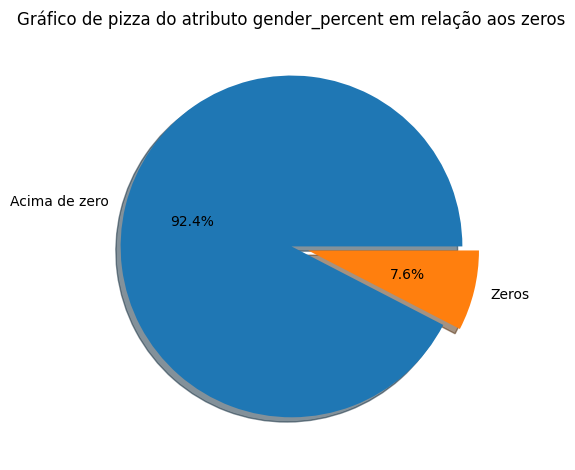

In [ ]:
#gráfico de pizza do atributo gender_percent em relação aos zeros
valor = [100-porcentagem_de_zeros_gender_percent,porcentagem_de_zeros_gender_percent]
label = ['Acima de zero','Zeros']
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Gráfico de pizza do atributo gender_percent em relação aos zeros')
plt.tight_layout()
plt.show()

***Vamos agora investigar os valores nulos***

In [ ]:
# verificando nulls no dataset
df_movies.isnull().sum()

title                 0
year                  0
genre                 0
_id                   0
director            267
all_actors          321
gender_percent      401
adjusted_budget    9924
producer            930
dtype: int64

In [ ]:
#cálculo da porcentagem de nulos
# nulos dos atributos director, all_actors, gender_percent, adjusted_budget e producer
null_director = df_movies.director.isnull().sum()
null_all_actors = df_movies.all_actors.isnull().sum()
null_gender_percent = df_movies.gender_percent.isnull().sum()
null_adjusted_budget = df_movies.adjusted_budget.isnull().sum()
null_producer = df_movies.producer.isnull().sum()

#porcentagem
porc_null_director = (null_director/len(df_movies['director'])).round(4)*100
porc_null_all_actors = (null_all_actors/len(df_movies['all_actors'])).round(4)*100
porc_null_gender_percent = (null_gender_percent/len(df_movies['gender_percent'])).round(4)*100
porc_null_adjusted_budget = (null_adjusted_budget/len(df_movies['adjusted_budget'])).round(4)*100
porc_null_producer = (null_producer/len(df_movies['producer'])).round(4)*100

print('O atributo director tem {}% de seu valor total como nulos'.format(porc_null_director))
print('O atributo all_actors tem {}% de seu valor total como nulos'.format(porc_null_all_actors))
print('O atributo gender_percent tem {}% de seu valor total como nulos'.format(porc_null_gender_percent))
print('O atributo adjusted_budget tem {}% de seu valor total como nulos'.format(porc_null_adjusted_budget))
print('O atributo producer tem {}% de seu valor total como nulos'.format(porc_null_producer))

O atributo director tem 1.73% de seu valor total como nulos
O atributo all_actors tem 2.08% de seu valor total como nulos
O atributo gender_percent tem 2.6% de seu valor total como nulos
O atributo adjusted_budget tem 64.34% de seu valor total como nulos
O atributo producer tem 6.03% de seu valor total como nulos


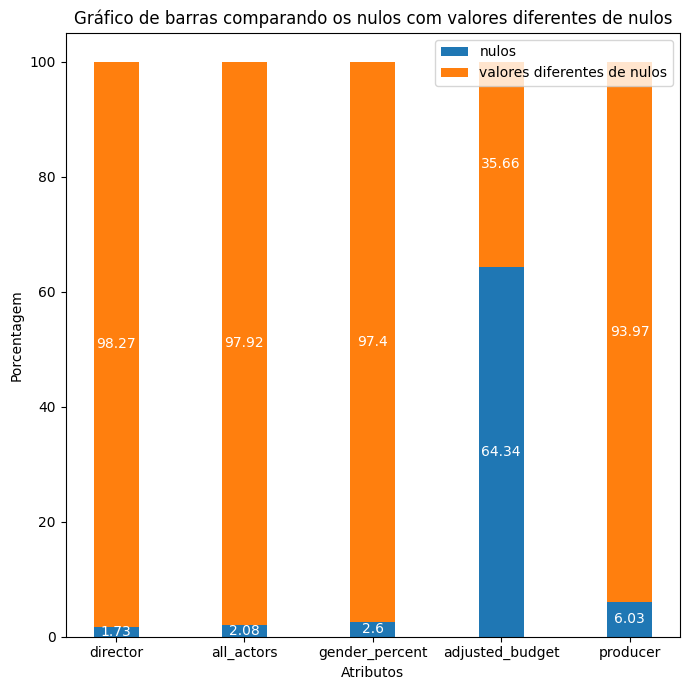

In [ ]:
# x and y data to compare
x = (porc_null_director, porc_null_all_actors, porc_null_gender_percent, porc_null_adjusted_budget, porc_null_producer ) #nulos
y = (100 - porc_null_director, 100 - porc_null_all_actors, 100 - porc_null_gender_percent, 100 - porc_null_adjusted_budget, 100 - porc_null_producer ) # não nulos

n = len(x)
x_location = np.arange(n)
bar_width = 0.35

fig, ax = plt.subplots(figsize = (7,7))


#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Nulos')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Nulos')
# add the legend
ax.legend(('nulos', 'valores diferentes de nulos'), loc = 'upper right')
# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Atributos')
# add the x axis labels
ax.set_xticks(x_location)
ax.set_xticklabels(('director', 'all_actors', 'gender_percent', 'adjusted_budget', 'producer' ))
# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'white')
ax.bar_label(y_bar, label_type= 'center', color = 'white')
# title
plt.title('Gráfico de barras comparando os nulos com valores diferentes de nulos')

plt.tight_layout()
plt.show()

**O atributo adjusted_budget é um dado importante, já que apresenta o orçamento dos filmes avaliados. Porém, devido a porcentagem alta de nulos,provavelmente não será utilizado na consolidação dos dados ejá que encontramos a informação de budget(orçamento) em outro dataset(df_tmdb_movies - budget).**

**Avaliaremos então se este atributo, budget, do dataset df_tmdb_movies está em melhores condições de uso.**

## **df_tmdb_movies**

In [ ]:
#verificando as informações da base df_movies
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Aqui percebemos algumas características:

* A base tem 4.803 entradas
* As características dos catálogos estão condizentes com as informações acima: as colunas budget, id, popularity, revenue,runtime, vote_avarage e vote_count são númericas, as restantes são textuais
* as colunas homepage, runtime e tagline, não contém o total de dados, sendo o atributo homepage o que contém maior diferença


***Vamos investigar os valores zeros no dataset dos atributos que estão com dados faltantes e no atributo budget***

In [ ]:
#verificando se existem zeros no dataframe
0 in df_tmdb_movies.values

True

**Como a verificação acima retornou verdadeira, vamos investigar mais a fundo e verificar em quais colunas existem zeros**

In [ ]:
#identificando quais colunas tem zeros
columns_zero_df_tmdb_movies = df_tmdb_movies.eq(0).any()
columns_zero_df_tmdb_movies[columns_zero_df_tmdb_movies]

budget          True
popularity      True
revenue         True
runtime         True
vote_average    True
vote_count      True
dtype: bool

In [ ]:
#verificando se existem zeros no atributo homepage
0 in df_tmdb_movies['homepage'].values

False

In [ ]:
#verificando se existem zeros no atributo runtime
0 in df_tmdb_movies['runtime'].values

True

In [ ]:
#verificando se existem zeros no atributo tagline
0 in df_tmdb_movies['tagline'].values

False

**Aqui, doas atributos com valores faltantes, apenas o atributo *runtime* tem zeros em seus valores. Vamos agora verificar a quantidade e seu percentual em relação ao seu total de valores**

In [ ]:
#quantidades de zeros no atributo runtime
zeros_runtime = (df_tmdb_movies['runtime'] == 0).sum()
print('O atributo runtime contém {} valores zeros'.format(zeros_runtime))

O atributo runtime contém 35 valores zeros


In [ ]:
#cálculo da porcentagem de zeros
porcentagem_de_zeros_runtime = (zeros_runtime/len(df_tmdb_movies['runtime'])).round(4)*100
print('O atributo runtime tem {}% de seu valor total como zeros'.format(porcentagem_de_zeros_runtime))

O atributo runtime tem 0.73% de seu valor total como zeros


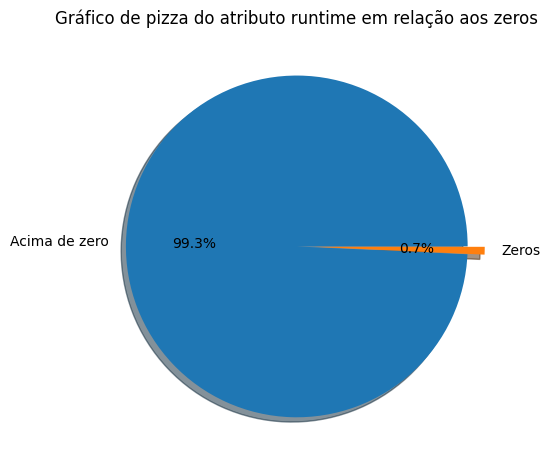

In [ ]:
#gráfico de pizza do atributo runtime  em relação aos zeros
valor = [100 - porcentagem_de_zeros_runtime,porcentagem_de_zeros_runtime]
label = ['Acima de zero','Zeros']
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Gráfico de pizza do atributo runtime em relação aos zeros')
plt.tight_layout()
plt.show()

**Como budget e revenue serão utilizados na consolidação dos dados, é importante investigar também estes atributos**

In [ ]:
#quantidades de zeros no atributo revenue
zeros_revenue_tmdb = (df_tmdb_movies['revenue'] == 0).sum()
print('O atributo revenue contém {} valores zeros'.format(zeros_revenue_tmdb))

O atributo revenue contém 1427 valores zeros


In [ ]:
#cálculo da porcentagem de zeros
porcentagem_de_zeros_revenue_tmdb = (zeros_revenue_tmdb/len(df_tmdb_movies['revenue'])).round(4)*100
print('O atributo revenue tem {}% de seu valor total como zeros'.format(porcentagem_de_zeros_revenue_tmdb))

O atributo revenue tem 29.709999999999997% de seu valor total como zeros


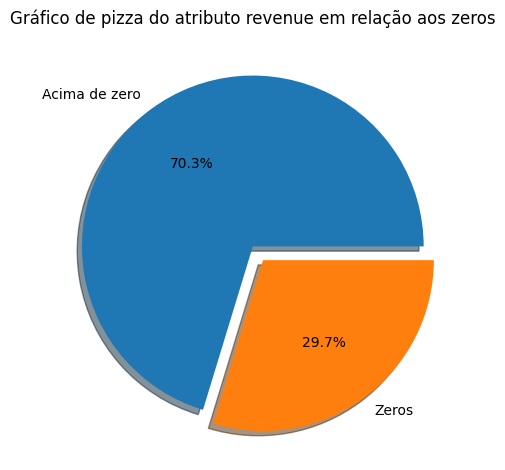

In [ ]:
#gráfico de pizza do atributo revenue em relação aos zeros
valor = [100 - porcentagem_de_zeros_revenue_tmdb,porcentagem_de_zeros_revenue_tmdb]
label = ['Acima de zero','Zeros']
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Gráfico de pizza do atributo revenue em relação aos zeros')
plt.tight_layout()
plt.show()

**Vamos agora avaliar o atributo *budget*.**

In [ ]:
#quantidades de zeros no atributo budget
zeros_budget = (df_tmdb_movies['budget'] == 0).sum()
print('O atributo budget contém {} valores zeros'.format(zeros_budget))

O atributo budget contém 1037 valores zeros


In [ ]:
#cálculo da porcentagem de zeros
porcentagem_de_zeros_budget = (zeros_budget/len(df_tmdb_movies['budget'])).round(4)*100
print('O atributo budget tem {}% de seu valor total como zeros'.format(porcentagem_de_zeros_budget))

O atributo budget tem 21.59% de seu valor total como zeros


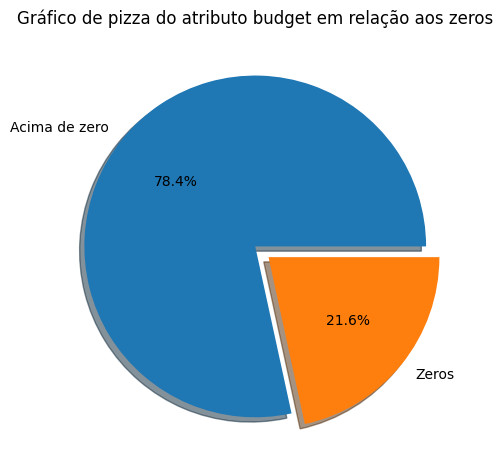

In [ ]:
#gráfico de pizza do atributo budget em relação aos zeros
valor = [100 - porcentagem_de_zeros_budget ,porcentagem_de_zeros_budget]
#valor = [zeros_budget,len(df_tmdb_movies['budget'])]
label = ['Acima de zero','Zeros']
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Gráfico de pizza do atributo budget em relação aos zeros')
plt.tight_layout()
plt.show()

***Vamos agora investigar os valores nulos***

In [ ]:
# verificando nulls no dataset
df_tmdb_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
#cálculo da porcentagem de nulos
# nulos dos atributos homepage, overview, release_date e tagline
null_homepage = df_tmdb_movies.homepage.isnull().sum()
null_overview = df_tmdb_movies.overview.isnull().sum()
null_release_date = df_tmdb_movies.release_date.isnull().sum()
null_tagline = df_tmdb_movies.tagline.isnull().sum()


#porcentagem
porc_null_homepage = (null_homepage/len(df_tmdb_movies['homepage'])).round(4)*100
porc_null_overview = (null_overview/len(df_tmdb_movies['overview'])).round(4)*100
porc_null_release_date = (null_release_date/len(df_tmdb_movies['release_date'])).round(4)*100
porc_null_tagline = (null_tagline/len(df_tmdb_movies['tagline'])).round(4)*100


print('O atributo homepage tem {}% de seu valor total como nulos'.format(porc_null_homepage))
print('O atributo overview tem {}% de seu valor total como nulos'.format(porc_null_overview))
print('O atributo release_date tem {}% de seu valor total como nulos'.format(porc_null_release_date))
print('O atributo tagline tem {}% de seu valor total como nulos'.format(porc_null_tagline))

O atributo homepage tem 64.36% de seu valor total como nulos
O atributo overview tem 0.06% de seu valor total como nulos
O atributo release_date tem 0.02% de seu valor total como nulos
O atributo tagline tem 17.57% de seu valor total como nulos


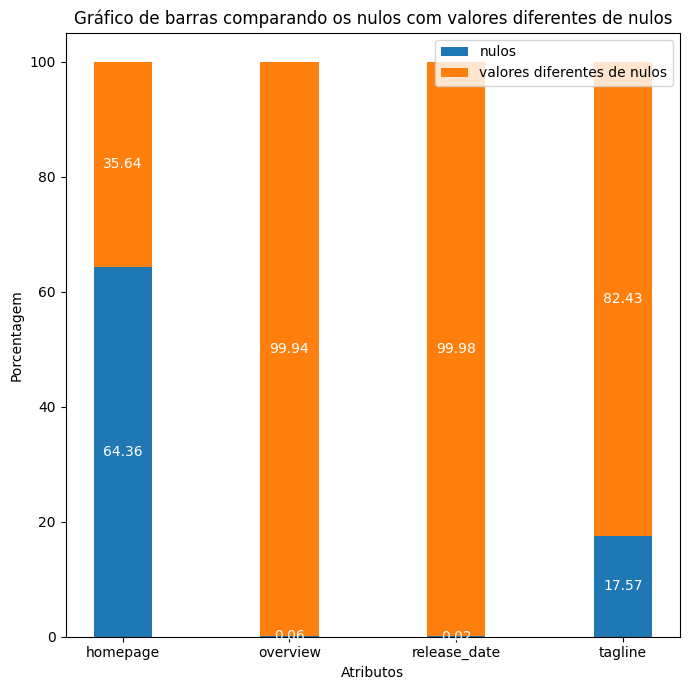

In [ ]:
# x and y data to compare
x = (porc_null_homepage, porc_null_overview, porc_null_release_date, porc_null_tagline ) #nulos
y = (100 - porc_null_homepage, 100 - porc_null_overview, 100 - porc_null_release_date, 100 - porc_null_tagline ) # não nulos

n = len(x)
x_location = np.arange(n)
bar_width = 0.35

fig, ax = plt.subplots(figsize = (7,7))


#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Nulos')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Nulos')
# add the legend
ax.legend(('nulos', 'valores diferentes de nulos'), loc = 'upper right')
# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Atributos')
# add the x axis labels
ax.set_xticks(x_location)
ax.set_xticklabels(('homepage', 'overview', 'release_date', 'tagline'))
# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'white')
ax.bar_label(y_bar, label_type= 'center', color = 'white')
# title
plt.title('Gráfico de barras comparando os nulos com valores diferentes de nulos')
plt.tight_layout()
plt.show()

## **Qual atributo usar : adjusted_budget ou budget?**

O atributo adjusted_budget tem 64.34% de seu valor total como nulos. De contra partida, o atributo budget tem 21.59% de seu valor total como zeros. Tanto os nulos como os zeros influenciarão negativamente na análise do dados, e devem ser tratados.

Porém, como o atributo *budget* tem cerca de menos de 30% de seus valores a serem tratados, este será utilizado na consolidação de dados.

**Por fim, vamos realizar a invetigação no último dataset**

## **df_ratings**

In [ ]:
#verificando as informações da base df_movies
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352361 entries, 0 to 1352360
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1352361 non-null  object 
 1   averageRating  1352361 non-null  float64
 2   numVotes       1352361 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.0+ MB


Aqui percebemos algumas características:

* A base tem 1,352.361 entradas
* As características dos catálogos estão condizentes com as informações acima: a coluna avarageRating e numVotes são númericas e a restantes é textual
* as colunas não tem dados faltantes

***Ainda assim, vamos investigar os valores zeros no dataset***

In [ ]:
#verificando se existem zeros no dataframe
0 in df_ratings.values

False

**Não a zeros neste dataset!
Vamos agora a investigação dos nulos**

In [ ]:
# verificando nulls no dataset
df_ratings.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

**Também não há nulos neste dataset!**

# **Resumo**

**Diante da investigação dos dataset's em relação aos seus dados faltantes, foram avaliados se os mesmos continham zeros ou nulos para que a consolidação dos dados pudesse ser realizada com os melhores dados obtidos.**

**Em resumo, foram encontrados no dataset's:**

**df_movies:**
* O atributo **gender_percent** com 7.6% de seu valor total como ***zeros***
* ***nulos*** dos atributos *director, all_actors, gender_percent, adjusted_budget e producer* onde:
  * O atributo ***director*** tem 1.73% de seu valor total como nulos
  * O atributo ***all_actors*** tem 2.08% de seu valor total como nulos
  * O atributo ***gender_percent*** tem 2.6% de seu valor total como nulos
  * O atributo ***adjusted_budget*** tem 64.34% de seu valor total como nulos
  * O atributo ***producer*** tem 6.03% de seu valor total como nulos


**df_tmdb_movies:**
* O atributo ***runtime*** com 0.73% de seu valor total como ***zeros***
* O atributo ***revenue*** tem 29.709999999999997% de seu valor total como ***zeros***
* O atributo ***budget*** tem 21.59% de seu valor total como ***zeros***
* ***nulos*** dos atributos *homepage, overview, release_date e tagline* onde:
  * O atributo ***homepage*** tem 64.36% de seu valor total como nulos
  * O atributo ***overview*** tem 0.06% de seu valor total como nulos
  * O atributo ***release_date*** tem 0.02% de seu valor total como nulos
  * O atributo ***tagline*** tem 17.57% de seu valor total como nulos

**df_ratings:**
* Não há zeros
* Não há nulos



**Há ainda a decisão por utilizar apenas o atributo budget do dataset df_tmdb_movies na consolidação de dados pois o mesmo apresenta cerca de menos de 30% de seus valores a serem tratados, aumentando a qualidade dos dados, por exemplo.**

**Assim, vamos seguir com a consolidação dos dados na etapa de ETL**

# **ETL - Consolidação dos dados**

**Aqui, vamos começar pela remoção dos valores nulos no dataset df_movies**

In [ ]:
#REMOVE TODOS OS FILMES OS QUAIS NÃO POSSUEM OS ATORES, DIRETORES E PRODUTORES QUE TRABAHARAM NELES.

df_movies = df_movies[df_movies.all_actors.notna()]
df_movies = df_movies[df_movies.director.notna()]
df_movies = df_movies[df_movies.producer.notna()]

In [ ]:
df_movies.head(3)

title  year                     genre        _id  \
9          In_Old_Madrid_(1911)  1911  [Comedy, Romance, Short]  tt0001695   
19  Happiness_Is_No_Fun._(2005)  2005            [Crime, Short]  tt1358429   
20          Stick_Around_(1925)  1925           [Comedy, Short]  tt0005864   

                                             director  \
9   [{'name': 'Thomas H. Ince', 'gender': 'male', ...   
19  [{'name': 'Brandon Harris', 'gender': 'male', ...   
20  [{'name': 'Ward Hayes', 'gender': 'male', 'typ...   

                                           all_actors  gender_percent  \
9   [{'name': 'Owen Moore', 'url': 'nm0601698', 'g...           50.00   
19  [{'name': 'Benton Greene', 'url': 'nm0338676',...           60.00   
20  [{'name': 'Oliver Hardy', 'url': 'nm0001316', ...           25.00   

    adjusted_budget                                           producer  
9               NaN  [{'name': 'Carl Laemmle', 'role': 'producer', ...  
19        17,073.00  [{'name': 'Missy Liu', 'role': 'producer', 'ur...  
20              NaN  [{'name': 'Billy West', 'role': 'producer', 'u...

**Corrigindo os índices**

In [ ]:
#Redefine o índice do DataFrame e usa o padrão.
#inplace = True : Se deve modificar o DataFrame em vez de criar um novo.
#drop = True :This resets the index to the default integer index(reseta o índice para o padrão de índice de inteiros).
df_movies.reset_index(inplace=True, drop=True)

In [ ]:
#verificando a correção
df_movies.head(3)

title  year                     genre        _id  \
0         In_Old_Madrid_(1911)  1911  [Comedy, Romance, Short]  tt0001695   
1  Happiness_Is_No_Fun._(2005)  2005            [Crime, Short]  tt1358429   
2          Stick_Around_(1925)  1925           [Comedy, Short]  tt0005864   

                                            director  \
0  [{'name': 'Thomas H. Ince', 'gender': 'male', ...   
1  [{'name': 'Brandon Harris', 'gender': 'male', ...   
2  [{'name': 'Ward Hayes', 'gender': 'male', 'typ...   

                                          all_actors  gender_percent  \
0  [{'name': 'Owen Moore', 'url': 'nm0601698', 'g...           50.00   
1  [{'name': 'Benton Greene', 'url': 'nm0338676',...           60.00   
2  [{'name': 'Oliver Hardy', 'url': 'nm0001316', ...           25.00   

   adjusted_budget                                           producer  
0              NaN  [{'name': 'Carl Laemmle', 'role': 'producer', ...  
1        17,073.00  [{'name': 'Missy Liu', 'role': 'producer', 'ur...  
2              NaN  [{'name': 'Billy West', 'role': 'producer', 'u...

**Agora vamos criar duas novas colunas: actors_count e actresses_count para ter um contador de quantas atrizes e atores existe em df_movies, que passa a se chamar df_movies_final**

In [ ]:
df_movies_final = pd.DataFrame()
for index, movie in df_movies.iterrows(): #Iterar sobre linhas do DataFrame como pares (índice, série).
    male_count = 0
    female_count = 0
    for actor in movie.all_actors:

        if actor['gender'] == 'male':
            male_count += 1
        else:
            female_count +=1

    movie['actors_count'] = male_count
    movie['actresses_count'] = female_count

    df_movies_final = pd.concat([df_movies_final, pd.DataFrame([movie])], ignore_index=True)

In [ ]:
#confirmando a criação das novas colunas
df_movies_final.columns

Index(['title', 'year', 'genre', '_id', 'director', 'all_actors',
       'gender_percent', 'adjusted_budget', 'producer', 'actors_count',
       'actresses_count'],
      dtype='object')

**Vamos fazer o mesmo para produtores e produtoras, criando duas novas colunas: producer_count_male e producer_count_female. O dataframe também foi renomeado para df_movies_final_1**

In [ ]:
df_movies_final_1 = pd.DataFrame()
for index, movie in df_movies_final.iterrows(): #Iterar sobre linhas do DataFrame como pares (índice, série).
    male_count = 0
    female_count = 0
    for producer in movie.producer:

        if producer['gender'] == 'male':
            male_count += 1
        else:
            female_count +=1

    movie['producer_count_male'] = male_count
    movie['producer_count_female'] = female_count

    df_movies_final_1 = pd.concat([df_movies_final_1, pd.DataFrame([movie])], ignore_index=True)

In [ ]:
#confirmando a criação das novas colunas
df_movies_final_1.columns

Index(['title', 'year', 'genre', '_id', 'director', 'all_actors',
       'gender_percent', 'adjusted_budget', 'producer', 'actors_count',
       'actresses_count', 'producer_count_male', 'producer_count_female'],
      dtype='object')

**Por fim, vamos fazer o mesmo para diretores e diretoras, criando duas novas colunas: director_count e directress_count. O dataframe também foi renomeado para df_movies_final_2**

In [ ]:
df_movies_final_2 = pd.DataFrame()
for index, movie in df_movies_final_1.iterrows(): #Iterar sobre linhas do DataFrame como pares (índice, série).
    male_count = 0
    female_count = 0
    for director in movie.director:

        if director['gender'] == 'male':
            male_count += 1
        else:
            female_count +=1

    movie['director_count'] = male_count
    movie['directress_count'] = female_count

    df_movies_final_2 = pd.concat([df_movies_final_2, pd.DataFrame([movie])], ignore_index=True)

**Retiramos as colunas director, producer e all_actors pois elas já não são mais necessárias**

In [ ]:
df_movies_final_2.drop(['director', 'producer', 'all_actors'], axis= 1 ,inplace= True )

In [ ]:
#confirmando a remoção das colunas
df_movies_final_2.columns

Index(['title', 'year', 'genre', '_id', 'gender_percent', 'adjusted_budget',
       'actors_count', 'actresses_count', 'producer_count_male',
       'producer_count_female', 'director_count', 'directress_count'],
      dtype='object')

**Vamos agora para o dataset df_ratings**

In [ ]:
df_ratings.head()

tconst  averageRating  numVotes
0  tt0000001           5.70      1993
1  tt0000002           5.80       268
2  tt0000003           6.50      1879
3  tt0000004           5.50       177
4  tt0000005           6.20      2662

**Vamos adicionar a coluna avarageRating e numVotes a dataframe df_movies_final_2**

In [ ]:
#renomeando a coluna para ter o mesmo nome da coluna de df_movies_final_2
df_ratings.rename(columns={'tconst': '_id'}, inplace=True)

In [ ]:
#junção dos dados de averageRating e numVotes a df_movies_final_2
df_movies_final_2 = df_movies_final_2.merge(df_ratings, on='_id')

In [ ]:
#confirmando a adição das novas colunas
df_movies_final_2.columns

Index(['title', 'year', 'genre', '_id', 'gender_percent', 'adjusted_budget',
       'actors_count', 'actresses_count', 'producer_count_male',
       'producer_count_female', 'director_count', 'directress_count',
       'averageRating', 'numVotes'],
      dtype='object')

**Vamos para o dataset df_tmdb_movies**

In [ ]:
#relembrando o dataset
df_tmdb_movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...      150.44   
1  Captain Barbossa, long believed to be dead, ha...      139.08   
2  A cryptic message from Bond’s past sends him o...      107.38   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0   162.00  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1   169.00           [{"iso_639_1": "en", "name": "English"}]  Released   
2   148.00  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar          7.20       11800  
1  Pirates of the Caribbean: At World's End          6.90        4500  
2                                   Spectre          6.30        4466

In [ ]:
#FORMATA NOME DOS FILMES PARA PADRONIZAR DA MESMA FORMA QUE OS NOMES DE FILMES PRESENTES NO DATAFRAME df_movies_final_2
df_tmdb_movies['title'] = df_tmdb_movies.title.str.replace(' ', '_')

In [ ]:
#conferindo a mudança
df_tmdb_movies['title']

0                                         Avatar
1       Pirates_of_the_Caribbean:_At_World's_End
2                                        Spectre
3                          The_Dark_Knight_Rises
4                                    John_Carter
                          ...                   
4798                                 El_Mariachi
4799                                   Newlyweds
4800                   Signed,_Sealed,_Delivered
4801                            Shanghai_Calling
4802                           My_Date_with_Drew
Name: title, Length: 4803, dtype: object

In [ ]:
#relembrando as colunas
df_tmdb_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
df_movies_final_2.head(3)

title  year                               genre  \
0      In_Old_Madrid_(1911)  1911            [Comedy, Romance, Short]   
1       Stick_Around_(1925)  1925                     [Comedy, Short]   
2  Calling_Dr._Porky_(1940)  1940  [Animation, Comedy, Family, Short]   

         _id  gender_percent  adjusted_budget  actors_count  actresses_count  \
0  tt0001695           50.00              NaN             1                1   
1  tt0005864           25.00              NaN             3                1   
2  tt0032298           50.00              NaN             1                1   

   producer_count_male  producer_count_female  director_count  \
0                    1                      0               1   
1                    1                      0               1   
2                    1                      0               1   

   directress_count  averageRating  numVotes  
0                 0           4.80        62  
1                 0           5.50       211  
2                 0           6.30       178

**title de df_movies_final_2 e df_tmdb_movies são imcompatíveis! Vamos corrigir isso.**

In [ ]:
#REMOVE O ANO DO FINAL DO TITULO DOS FILMES PARA QUE SEJA POSSÍVEL JUNTAR OS DADOS DE AMBOS OS DATAFRAMES PELO TÍTULO POIS O FORMATO DE ID É INCOMPATÍVEL
df_movies_final_2['title'] = df_movies_final_2.title.str.replace("_[\(\[].*?[\)\]]", "",regex=True)

In [ ]:
#conferindo
df_movies_final_2['title']

0              In_Old_Madrid
1               Stick_Around
2          Calling_Dr._Porky
3          The_Chewin'_Bruin
4            A_House_Divided
                ...         
13921       Psycho_Sleepover
13922           Halloween_II
13923    The_Next_Three_Days
13924               Close-Up
13925       3_Men_and_a_Baby
Name: title, Length: 13926, dtype: object

In [ ]:
#GARANTE QUE NÃO TERÁ PROBLEMA COM CASE SENSITIVE
df_movies_final_2['title'] = df_movies_final_2.title.str.lower()
df_tmdb_movies['title'] = df_tmdb_movies.title.str.lower()

In [ ]:
df_tmdb_movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...      150.44   
1  Captain Barbossa, long believed to be dead, ha...      139.08   
2  A cryptic message from Bond’s past sends him o...      107.38   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0   162.00  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1   169.00           [{"iso_639_1": "en", "name": "English"}]  Released   
2   148.00  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    avatar          7.20       11800  
1  pirates_of_the_caribbean:_at_world's_end          6.90        4500  
2                                   spectre          6.30        4466

**Também precisamos do ano do dataset df_tmdb_movies! CAPTURANDO ANO EM RELEASE DATE**

In [ ]:
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies.release_date)

In [ ]:
#conferindo modificação
df_tmdb_movies.release_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
4802 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 37.6 KB


**Como esse atributo tem nulos, vamos retirar**

In [ ]:
df_tmdb_movies = df_tmdb_movies[df_tmdb_movies.release_date.notna()]

In [ ]:

df_tmdb_movies['year'] = df_tmdb_movies.release_date.dt.year

In [ ]:
df_tmdb_movies['year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4802 entries, 0 to 4802
Series name: year
Non-Null Count  Dtype
--------------  -----
4802 non-null   int64
dtypes: int64(1)
memory usage: 75.0 KB


In [ ]:
df_tmdb_movies['year'].head(3)

0    2009
1    2007
2    2015
Name: year, dtype: int64

**O tipo do atributo year já é inteiro(int32), então não é preciso converter**

**Vamos agora a junção final dos atibutos, criando uma nova base: df_movies_consolidated**

In [ ]:
df_movies_consolidated = df_movies_final_2.merge(df_tmdb_movies[['title', 'year', 'budget', 'revenue']], on=['title', 'year'])

In [ ]:
#conferindo a modificação
df_movies_consolidated.columns

Index(['title', 'year', 'genre', '_id', 'gender_percent', 'adjusted_budget',
       'actors_count', 'actresses_count', 'producer_count_male',
       'producer_count_female', 'director_count', 'directress_count',
       'averageRating', 'numVotes', 'budget', 'revenue'],
      dtype='object')

In [ ]:
df_movies_consolidated.shape

(2482, 16)

**Aqui, para os atributos budget e revenue não faz sentido existirem valores zeros de receita e orçamento. Por isso, vamos filtrar os valores de ambos acima de zero e adicionar ao dataframe.**

In [ ]:
df_movies_consolidated = df_movies_consolidated[(df_movies_consolidated.budget > 0) & (df_movies_consolidated.revenue > 0)]


**Aqui criaremos mais colunas para análise em relação a porcentagem para os gêneros sociais**

In [ ]:
#CRIA VARIÁVEIS DE PORCENTAGEM COM RECORTE EM GÊNERO SOCIAL PARA ATORES, DIRETORES E PRODUTORES

#atrizes
df_movies_consolidated['actress_percent'] = df_movies_consolidated.actresses_count/(df_movies_consolidated.actors_count + df_movies_consolidated.actresses_count) * 100
df_movies_consolidated['actress_percent'] = df_movies_consolidated['actress_percent'].apply(lambda x: round(x, 0))
#atores
df_movies_consolidated['actors_percent'] = df_movies_consolidated.actors_count/(df_movies_consolidated.actors_count + df_movies_consolidated.actresses_count) * 100
df_movies_consolidated['actors_percent'] = df_movies_consolidated['actors_percent'].apply(lambda x: round(x, 0))
#diretoras
df_movies_consolidated['women_directing_percent'] = df_movies_consolidated.directress_count/(df_movies_consolidated.director_count + df_movies_consolidated.directress_count) * 100
df_movies_consolidated['women_directing_percent'] = df_movies_consolidated['women_directing_percent'].apply(lambda x: round(x, 0))
#diretores
df_movies_consolidated['men_directing_percent'] = df_movies_consolidated.director_count/(df_movies_consolidated.director_count + df_movies_consolidated.directress_count) * 100
df_movies_consolidated['men_directing_percent'] = df_movies_consolidated['men_directing_percent'].apply(lambda x: round(x, 0))
#produtoras
df_movies_consolidated['women_producing_percent'] = df_movies_consolidated.producer_count_female/(df_movies_consolidated.producer_count_male + df_movies_consolidated.producer_count_female) * 100
df_movies_consolidated['women_producing_percent'] = df_movies_consolidated['women_producing_percent'].apply(lambda x: round(x, 0))
#produtores
df_movies_consolidated['men_producing_percent'] = df_movies_consolidated.producer_count_male/(df_movies_consolidated.producer_count_male + df_movies_consolidated.producer_count_female) * 100
df_movies_consolidated['men_producing_percent'] = df_movies_consolidated['men_producing_percent'].apply(lambda x: round(x, 0))


**Aqui vamos comparar o atributo gender_percent com o atributo criado actress_percent(calculado diante dos dados de df_movies) que representam a mesma informação: porcentagem de atrizes no filme para determinar qual usar.**

In [ ]:
df_movies_consolidated['delta_percent'] = df_movies_consolidated.gender_percent - df_movies_consolidated.actress_percent


In [ ]:
df_movies_consolidated[df_movies_consolidated.delta_percent != 0][['gender_percent','actress_percent', 'delta_percent']]

gender_percent  actress_percent  delta_percent
11             11.00            12.00          -1.00
12             29.00            30.00          -1.00
19             38.00            39.00          -1.00
24             20.00            21.00          -1.00
26             36.00            37.00          -1.00
...              ...              ...            ...
2474           37.00            38.00          -1.00
2476           37.00            38.00          -1.00
2479           26.00            27.00          -1.00
2480           28.00            29.00          -1.00
2481           35.00            36.00          -1.00

[964 rows x 3 columns]

In [ ]:
df_movies_consolidated[df_movies_consolidated.delta_percent== -2][['gender_percent','actress_percent', 'delta_percent']]

gender_percent  actress_percent  delta_percent
64             38.00            40.00          -2.00
66             40.00            42.00          -2.00
136            33.00            35.00          -2.00
227            42.00            44.00          -2.00
363            36.00            38.00          -2.00
444            27.00            29.00          -2.00
457            36.00            38.00          -2.00
470            38.00            40.00          -2.00
492            31.00            33.00          -2.00
496            30.00            32.00          -2.00
511            24.00            26.00          -2.00
530            28.00            30.00          -2.00
564            46.00            48.00          -2.00
603            46.00            48.00          -2.00
608             9.00            11.00          -2.00
657            18.00            20.00          -2.00
659            27.00            29.00          -2.00
724            25.00            27.00          -2.00
748            35.00            37.00          -2.00
855            33.00            35.00          -2.00
868            27.00            29.00          -2.00
871            21.00            23.00          -2.00
898            25.00            27.00          -2.00
935            18.00            20.00          -2.00
970            31.00            33.00          -2.00
1043           18.00            20.00          -2.00
1073           31.00            33.00          -2.00
1076           48.00            50.00          -2.00
1143           58.00            60.00          -2.00
1180           40.00            42.00          -2.00
1238           20.00            22.00          -2.00
1277           40.00            42.00          -2.00
1300           33.00            35.00          -2.00
1399           31.00            33.00          -2.00
1453           44.00            46.00          -2.00
1476           31.00            33.00          -2.00
1629           57.00            59.00          -2.00
1674           21.00            23.00          -2.00
1724           44.00            46.00          -2.00
1792           43.00            45.00          -2.00
1871            8.00            10.00          -2.00
1905           25.00            27.00          -2.00
1911           22.00            24.00          -2.00
2045           45.00            47.00          -2.00
2058           51.00            53.00          -2.00
2119           51.00            53.00          -2.00
2126           21.00            23.00          -2.00
2137           20.00            22.00          -2.00
2183           31.00            33.00          -2.00
2317           29.00            31.00          -2.00
2326           47.00            49.00          -2.00
2345           41.00            43.00          -2.00
2387           23.00            25.00          -2.00
2418           46.00            48.00          -2.00

In [ ]:
df_movies_consolidated[df_movies_consolidated.delta_percent== -25][['gender_percent','actress_percent', 'delta_percent']]

gender_percent  actress_percent  delta_percent
1113            8.00            33.00         -25.00

**Percebemos aqui a diferença de intervalo de 25 entre gender_percent e actress_percent!**

In [ ]:
#porcentagem de dados diferentes
porcentagem_dados_diferentes = len(df_movies_consolidated[df_movies_consolidated.delta_percent != 0])/len(df_movies_consolidated.delta_percent)*100
dados_diferentes = len(df_movies_consolidated[df_movies_consolidated.delta_percent != 0])

print('A quantidade de dados diferentes encontrada foi de {}'.format(dados_diferentes))
print('A porcentagem de dados diferentes encontrada foi de {}%'.format(round(porcentagem_dados_diferentes)))

A quantidade de dados diferentes encontrada foi de 964
A porcentagem de dados diferentes encontrada foi de 50%


**Comparando os dados de gender_percent e actress_percent e por não saber como foi realizado o cálculo de gender_percent, o uso do atributo actress_percent seria mais apropriado para garantir maior confiabilidade dos dados.**

**Vamos agora retirara as colunas que não são mais necessárias: id, adjusted_budget, delta_percent, gender_percent**

In [ ]:
df_movies_consolidated.columns

Index(['title', 'year', 'genre', '_id', 'gender_percent', 'adjusted_budget',
       'actors_count', 'actresses_count', 'producer_count_male',
       'producer_count_female', 'director_count', 'directress_count',
       'averageRating', 'numVotes', 'budget', 'revenue', 'actress_percent',
       'actors_percent', 'women_directing_percent', 'men_directing_percent',
       'women_producing_percent', 'men_producing_percent', 'delta_percent'],
      dtype='object')

In [ ]:
df_movies_consolidated.drop(['_id', 'adjusted_budget', 'delta_percent', 'gender_percent'], axis= 1 ,inplace= True )

In [ ]:
#verificando as colunas existentes
df_movies_consolidated.columns

Index(['title', 'year', 'genre', 'actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count', 'averageRating', 'numVotes', 'budget', 'revenue',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent'],
      dtype='object')

**Vamos agora criar atributos para os gêneros dos filmes**

In [ ]:
df_movies_consolidated['genre']

0          [Animation, Family, Fantasy, Musical, Romance]
1                     [Animation, Family, Fantasy, Music]
2       [Adventure, Animation, Drama, Family, Fantasy,...
9                                [Crime, Drama, Thriller]
10                                          [Documentary]
                              ...                        
2477                              [Drama, Romance, Sport]
2478                                             [Comedy]
2479                           [Action, Comedy, Thriller]
2480                                             [Horror]
2481                    [Crime, Drama, Romance, Thriller]
Name: genre, Length: 1942, dtype: object

In [ ]:
#CRIA VARIAVEIS DUMMIES PARA GÊNEROS DE FILMES
df = df_movies_consolidated.explode('genre', ignore_index=True)

In [ ]:
df['genre']

0       Animation
1          Family
2         Fantasy
3         Musical
4         Romance
          ...    
5799       Horror
5800        Crime
5801        Drama
5802      Romance
5803     Thriller
Name: genre, Length: 5804, dtype: object

In [ ]:
generos = df.genre.unique()

In [ ]:
generos

array(['Animation', 'Family', 'Fantasy', 'Musical', 'Romance', 'Music',
       'Adventure', 'Drama', 'Crime', 'Thriller', 'Documentary', 'Horror',
       'Action', 'Western', 'Comedy', 'War', 'Sci-Fi', 'Sport', 'History',
       'Biography', 'Mystery', 'Film-Noir', 'Adult'], dtype=object)

In [ ]:
#identificação dos generos. 1 se pertence ao gênero e 0 caso contrário.
df_final = pd.DataFrame()
for index, row in df_movies_consolidated.iterrows():
    for genero in generos:
        row[genero] = 1 if genero in row.genre else 0
    df_final = pd.concat([df_final, pd.DataFrame([row])])

In [ ]:
df_final.drop('genre', axis=1, inplace=True)

In [ ]:
df_final.head(3)

title  year  actors_count  actresses_count  \
0  snow_white_and_the_seven_dwarfs  1937            11                3   
1                         fantasia  1940             6                1   
2                        pinocchio  1940             9                3   

   producer_count_male  producer_count_female  director_count  \
0                    1                      0               6   
1                    2                      0              11   
2                    1                      0               7   

   directress_count  averageRating  numVotes  ...  Western  Comedy  War  \
0                 0           7.60    209885  ...        0       0    0   
1                 0           7.70    101215  ...        0       0    0   
2                 0           7.50    155271  ...        0       0    0   

   Sci-Fi  Sport  History  Biography  Mystery  Film-Noir  Adult  
0       0      0        0          0        0          0      0  
1       0      0        0          0        0          0      0  
2       0      0        0          0        0          0      0  

[3 rows x 41 columns]

In [ ]:
df_final.columns

Index(['title', 'year', 'actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count', 'averageRating', 'numVotes', 'budget', 'revenue',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent', 'Animation', 'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult'],
      dtype='object')

**Salvando o dataframe final para análise**

In [ ]:
df_final.to_csv('df_.csv', index=False)

## **Ánalise dos dados e Qualidades dos dados pós consolidação dos dados - df_**

**Vamos aqui importar do github o dataset consolidado**

In [ ]:
# Informa a URL de importação do dataset
url_df_ = 'https://raw.githubusercontent.com/anakrol72/analise_de_dados_e_boas_praticas/main/df_.csv'

#importando
df_ = pd.read_csv(url_df_)

# **Atributos do Datase - Catálogo de dados**


## **Descrição dos atributos - df_**

Contém as seguintes informações sobre 2.482 filmes:
* **title** - título do filme.
* **year** - Ano de lançamento do filme.
* **actors_count** - Contagem de atores do filme.
* **actresses_count** - Contagem de atrizes do filme.
* **producer_count_male** - Contagem de produtores no filme.
* **producer_count_female** - Contagem de produtoras no filme.
* **director_count** - Contagem de diretores no filme.
* **directress_count** - Contagem de diretoras no filme.
* **averageRating** - média ponderada de todas as avaliações individuais dos usuários.
* **numVotes** - número de votos que o título recebeu.
* **budget** - Orçamento do filme.
* **revenue** - Receita do filme.
* **actress_percent** - Porcentagem de atrizes no filme.
* **actors_percent** - Porcentagem de atores no filme.
* **women_directing_percent** - Porcentagem de diretoras no filme.
* **men_directing_percent** - Porcentagem de diretores no filme.
* **women_producing_percent** - Porcentagem de produtoras no filme.
* **men_producing_percent** - Porcentagem de produtores no filme.
* **Animation** - gênero do filme é animação(1 para pertencente e 0 para ausente).
* **Family** - gênero do filme é Família(1 para pertencente e 0 para ausente).
* **Musical** - gênero do filme é Musical(1 para pertencente e 0 para ausente).
* **Romance** - gênero do filme é Romance(1 para pertencente e 0 para ausente).
* **Music** - gênero do filme é Música(1 para pertencente e 0 para ausente).
* **Adventure** - gênero do filme é Aventura(1 para pertencente e 0 para ausente).
* **Drama** - gênero do filme é Drama(1 para pertencente e 0 para ausente).
* **Comedy** - gênero do filme é Comédia(1 para pertencente e 0 para ausente).
* **Horror** - gênero do filme é Horror(1 para pertencente e 0 para ausente).
* **Mystery** -gênero do filme é Mistério(1 para pertencente e 0 para ausente).
* **Sci-Fi** - gênero do filme é Sci-Fi(1 para pertencente e 0 para ausente).
* **Sport** - gênero do filme é Sport(1 para pertencente e 0 para ausente).
* **History** - gênero do filme é História(1 para pertencente e 0 para ausente).
* **Biography** - gênero do filme é Biografia(1 para pertencente e 0 para ausente).
* **Film-Noir** - gênero do filme é Film-Noir(1 para pertencente e 0 para ausente).
* **Adult** - gênero do filme é Adulto(1 para pertencente e 0 para ausente).

**Vamos avaliar os tipos de dados dos atributos**

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    1942 non-null   object 
 1   year                     1942 non-null   int64  
 2   actors_count             1942 non-null   int64  
 3   actresses_count          1942 non-null   int64  
 4   producer_count_male      1942 non-null   int64  
 5   producer_count_female    1942 non-null   int64  
 6   director_count           1942 non-null   int64  
 7   directress_count         1942 non-null   int64  
 8   averageRating            1942 non-null   float64
 9   numVotes                 1942 non-null   int64  
 10  budget                   1942 non-null   int64  
 11  revenue                  1942 non-null   int64  
 12  actress_percent          1942 non-null   float64
 13  actors_percent           1942 non-null   float64
 14  women_directing_percent 

**Temos apenas o atributo tittle como objeto, fornecendo o nome do título do filme, sendo os atributos restantes numéricos. Percebemos também que não há dados faltantes no dataset.**

**Apenas para visualizar melhor os dados, vamos mudar o tipo de budget e revenue**

In [ ]:
df_['budget'] = df_['budget'].astype(float)
df_['revenue'] = df_['revenue'].astype(float)

**Vamos avaliar agora as primiras 5 linhas do dataset**

In [ ]:
df_.iloc[0:5, 0:18]

title  year  actors_count  actresses_count  \
0  snow_white_and_the_seven_dwarfs  1937            11                3   
1                         fantasia  1940             6                1   
2                        pinocchio  1940             9                3   
3                   alone_with_her  2006             5                7   
4            an_inconvenient_truth  2006             4                0   

   producer_count_male  producer_count_female  director_count  \
0                    1                      0               6   
1                    2                      0              11   
2                    1                      0               7   
3                    2                      0               1   
4                    7                      4               1   

   directress_count  averageRating  numVotes       budget        revenue  \
0                 0           7.60    209885 1,488,423.00 184,925,486.00   
1                 0           7.70    101215 2,280,000.00  83,320,000.00   
2                 0           7.50    155271 2,600,000.00  84,300,000.00   
3                 0           6.00      4164 1,000,000.00      10,018.00   
4                 0           7.40     84631 1,000,000.00  46,243,000.00   

   actress_percent  actors_percent  women_directing_percent  \
0            21.00           79.00                     0.00   
1            14.00           86.00                     0.00   
2            25.00           75.00                     0.00   
3            58.00           42.00                     0.00   
4             0.00          100.00                     0.00   

   men_directing_percent  women_producing_percent  men_producing_percent  
0                 100.00                     0.00                 100.00  
1                 100.00                     0.00                 100.00  
2                 100.00                     0.00                 100.00  
3                 100.00                     0.00                 100.00  
4                 100.00                    36.00                  64.00

## **Sobre os atributos acima, percebe-se:**

* **Aqui podemos observar que ano de alguns filmes é bem antigo, como em 1937.**

* **Em relação a atrizes e atores, percebe-se que a diferença de contagem pode ser grande onde há um maior número de atores**

* **Em relação a produtores e produtoras, percebe-se também a diferença na contagem, onde aparentemente a contagem dos produtores é maior do que das produtoras.**

* **O mesmo ocorre entre diretores e diretoras, onde o número de diretores parece ser maior.**

* **A média de avaliação baixa dos filmes ou um número de votos baixos dos filmes pode acarretar numa receita baixa também.**

* **Alguns valores parecem ser divergentes com o esperado, já que para todo filme há um gasto então sempre haverá uma receita. O filme pode ou não gerar lucro , então valores como zeros podem ser valores válidos para a receita.**

* **Os valores percentuais de atrizes e atores, diretores e diretoras, produtores e produtoras, também segue o mesmo perfil de contagem das categorias: o valor do gênero masculino parece ser maior que o do feminino.**


**Vamos avaliar alguns dados estatísticos.**

In [ ]:
df_.iloc[:, 0:10].describe()

year  actors_count  actresses_count  producer_count_male  \
count 1,942.00      1,942.00         1,942.00             1,942.00   
mean  1,998.06         43.12            19.02                 5.54   
std      13.39         26.90            14.39                 3.18   
min   1,925.00          0.00             0.00                 0.00   
25%   1,995.00         25.00            10.00                 3.00   
50%   2,002.00         37.00            16.00                 5.00   
75%   2,006.00         54.00            24.00                 7.00   
max   2,011.00        295.00           135.00                25.00   

       producer_count_female  director_count  directress_count  averageRating  \
count               1,942.00        1,942.00          1,942.00       1,942.00   
mean                    1.46            1.06              0.05           6.54   
std                     1.50            0.53              0.22           1.04   
min                     0.00            0.00              0.00           1.90   
25%                     0.00            1.00              0.00           5.90   
50%                     1.00            1.00              0.00           6.60   
75%                     2.00            1.00              0.00           7.20   
max                    16.00           11.00              2.00           9.30   

          numVotes  
count     1,942.00  
mean    188,841.07  
std     274,793.22  
min         377.00  
25%      41,639.25  
50%      98,648.00  
75%     222,467.75  
max   2,800,305.00

**Aqui percebemos que os atributos year, actors_count, actresses_count e numVotes tem o desvio padrão alto, logo os dados do conjunto estão menos regulares.**

**Em relação a contagem de atores e atrizes, o intervalo entre média e desvio padrão dos atores é maior o que indica que os dados estão mais afastados da média e mais dispersos se comparado aos dados das atrizes. O mesmo ocorre para produtores/produtoras e diretores/diretoras : os dados das parcelas femininas estão mais regulares.**

In [ ]:
df_.iloc[:, 10:18].describe()

budget          revenue  actress_percent  actors_percent  \
count       1,942.00         1,942.00         1,942.00        1,942.00   
mean   41,635,111.65   124,404,663.71            30.32           69.68   
std    41,184,969.59   178,159,282.69            12.65           12.65   
min             1.00            13.00             0.00            0.00   
25%    12,700,000.00    20,849,930.25            21.00           61.00   
50%    30,000,000.00    61,860,456.50            29.50           70.50   
75%    60,000,000.00   156,309,324.00            39.00           79.00   
max   300,000,000.00 2,787,965,087.00           100.00          100.00   

       women_directing_percent  men_directing_percent  \
count                 1,942.00               1,942.00   
mean                      4.35                  95.65   
std                      19.94                  19.94   
min                       0.00                   0.00   
25%                       0.00                 100.00   
50%                       0.00                 100.00   
75%                       0.00                 100.00   
max                     100.00                 100.00   

       women_producing_percent  men_producing_percent  
count                 1,942.00               1,942.00  
mean                     20.02                  79.98  
std                      18.53                  18.53  
min                       0.00                   0.00  
25%                       0.00                  67.00  
50%                      17.00                  83.00  
75%                      33.00                 100.00  
max                     100.00                 100.00

**Os atributos budget e revenue tem uma variação significativa entre média e desvio padrão, endicando também que os dados destes estão menos regulares.**

**Nos percentuais, porém, os dados se comportam diferentes das contagens.**

**Para atrizes e atores ainda temos que a parcela masculina tem maior dispersão de dados se comparado a parcela feminina.**

**Porém, para diretores e diretoras e produtores o intervalo entre média e desvio padrão é muito mais alto, indicando assim que os dados estão muito mais dispersos para estes atributos. Temos apenas o atributo women_producing_percent(produtoras) como excessão neste padrão, com uma diferença baixa entre média e desvio padrão indicando portanto que os dados para estes atributos estão mais regulares.**

**Vamos avaliar agora quanto aos maiores valores de orçamento e receita o que acontece aparentemente com os valores dos outros atributos.**

In [ ]:
df_.iloc[:, 0:18].sort_values(['budget','revenue'], ascending=False)

title  year  actors_count  \
1132  pirates_of_the_caribbean:_at_world's_end  2007           130   
1625                          superman_returns  2006            65   
186                                    tangled  2010            25   
1106                              spider-man_3  2007            78   
1799                                    avatar  2009            65   
...                                        ...   ...           ...   
181                                     primer  2004            15   
42                                   tarnation  2003             9   
839                             angela's_ashes  1999            78   
412                         a_farewell_to_arms  1932            12   
454                               modern_times  1936            34   

      actresses_count  producer_count_male  producer_count_female  \
1132               12                    8                      1   
1625               30                    9                      0   
186                13                    3                      1   
1106               65                    5                      1   
1799               23                    5                      3   
...               ...                  ...                    ...   
181                 4                    1                      0   
42                  2                    6                      2   
839                24                    8                      2   
412                 8                    2                      0   
454                 5                    1                      0   

      director_count  directress_count  averageRating  numVotes  \
1132               1                 0           7.10    676461   
1625               1                 0           6.10    288956   
186                2                 0           7.70    478127   
1106               1                 0           6.30    619618   
1799               1                 0           7.90   1360988   
...              ...               ...            ...       ...   
181                1                 0           6.70    111561   
42                 1                 0           7.10      6664   
839                1                 0           7.30     22716   
412                1                 0           6.40      6553   
454                1                 0           8.50    252532   

             budget          revenue  actress_percent  actors_percent  \
1132 300,000,000.00   961,000,000.00             8.00           92.00   
1625 270,000,000.00   391,081,192.00            32.00           68.00   
186  260,000,000.00   591,794,936.00            34.00           66.00   
1106 258,000,000.00   890,871,626.00            45.00           55.00   
1799 237,000,000.00 2,787,965,087.00            26.00           74.00   
...             ...              ...              ...             ...   
181        7,000.00       424,760.00            21.00           79.00   
42           218.00     1,162,014.00            18.00           82.00   
839           25.00            13.00            24.00           76.00   
412            4.00            25.00            40.00           60.00   
454            1.00     8,500,000.00            13.00           87.00   

      women_directing_percent  men_directing_percent  women_producing_percent  \
1132                     0.00                 100.00                    11.00   
1625                     0.00                 100.00                     0.00   
186                      0.00                 100.00                    25.00   
1106                     0.00                 100.00                    17.00   
1799                     0.00                 100.00                    38.00   
...                       ...                    ...                      ...   
181                      0.00                 100.00                     0.00   
42                       0.00            

**Podemos perceber que diante dos maiores valores de orçamento e receita, aparentemente há mais homens presentes nas categorias de atores, produtores e diretores.**

**Diante das observações acima, surgem algumas hipóteses a serem verificadas:**

* **Há mais atores, diretores e produtores nos filmes do que atrizes, diretoras e produtoras.**

**Vamos analisar agora os valores únicos dos atributos.**

## **Avaliação de valores únicos dos atributos**

In [ ]:
df_.nunique()

title                      1942
year                         82
actors_count                144
actresses_count              86
producer_count_male          23
producer_count_female        13
director_count                9
directress_count              3
averageRating                69
numVotes                   1934
budget                      266
revenue                    1901
actress_percent              73
actors_percent               73
women_directing_percent       5
men_directing_percent         5
women_producing_percent      51
men_producing_percent        51
Animation                     2
Family                        2
Fantasy                       2
Musical                       2
Romance                       2
Music                         2
Adventure                     2
Drama                         2
Crime                         2
Thriller                      2
Documentary                   2
Horror                        2
Action                        2
Western 

In [ ]:
df_.nunique().iloc[0:18].sort_values(ascending=False)

title                      1942
numVotes                   1934
revenue                    1901
budget                      266
actors_count                144
actresses_count              86
year                         82
actress_percent              73
actors_percent               73
averageRating                69
women_producing_percent      51
men_producing_percent        51
producer_count_male          23
producer_count_female        13
director_count                9
women_directing_percent       5
men_directing_percent         5
directress_count              3
dtype: int64

In [ ]:
df_.nunique().iloc[18:].sort_values(ascending=False)

Animation      2
Action         2
Film-Noir      2
Mystery        2
Biography      2
History        2
Sport          2
Sci-Fi         2
War            2
Comedy         2
Western        2
Horror         2
Family         2
Documentary    2
Thriller       2
Crime          2
Drama          2
Adventure      2
Music          2
Romance        2
Musical        2
Fantasy        2
Adult          2
dtype: int64

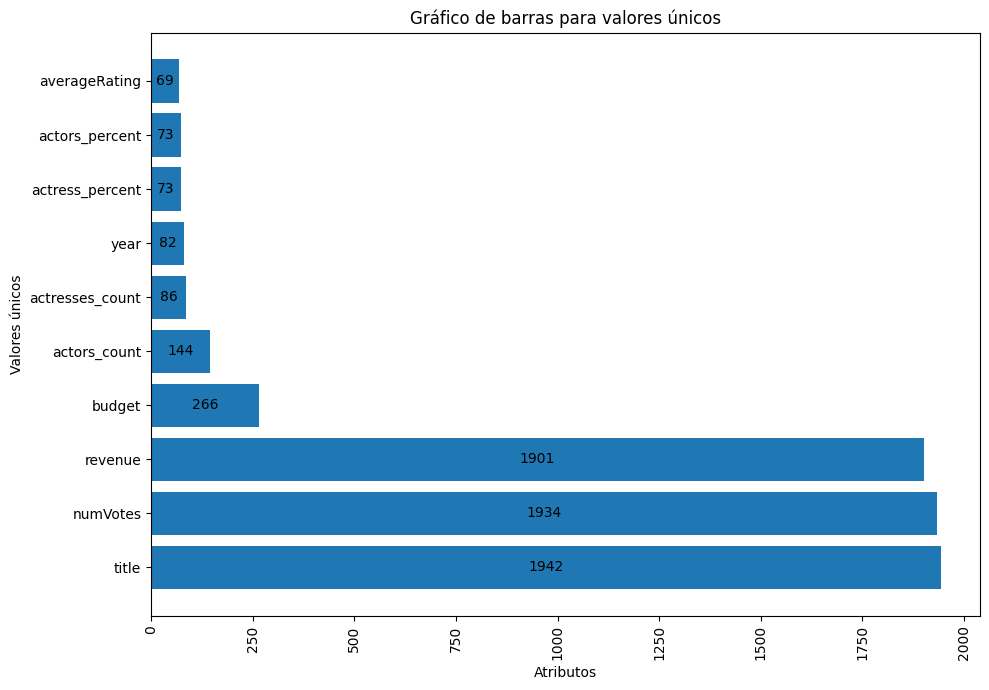

In [ ]:
# x and y data to compare
x =  df_.nunique().sort_values(ascending=False).iloc[0:10].index #atributos
y = df_.nunique().sort_values(ascending=False).iloc[0:10].values  # valores


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.barh(x, y)
# add the x and y label
ax.set_ylabel('Valores únicos')
ax.set_xlabel('Atributos')
# melhorando a visualização
ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'Black')

# title
plt.title('Gráfico de barras para valores únicos')
plt.tight_layout()
plt.show()

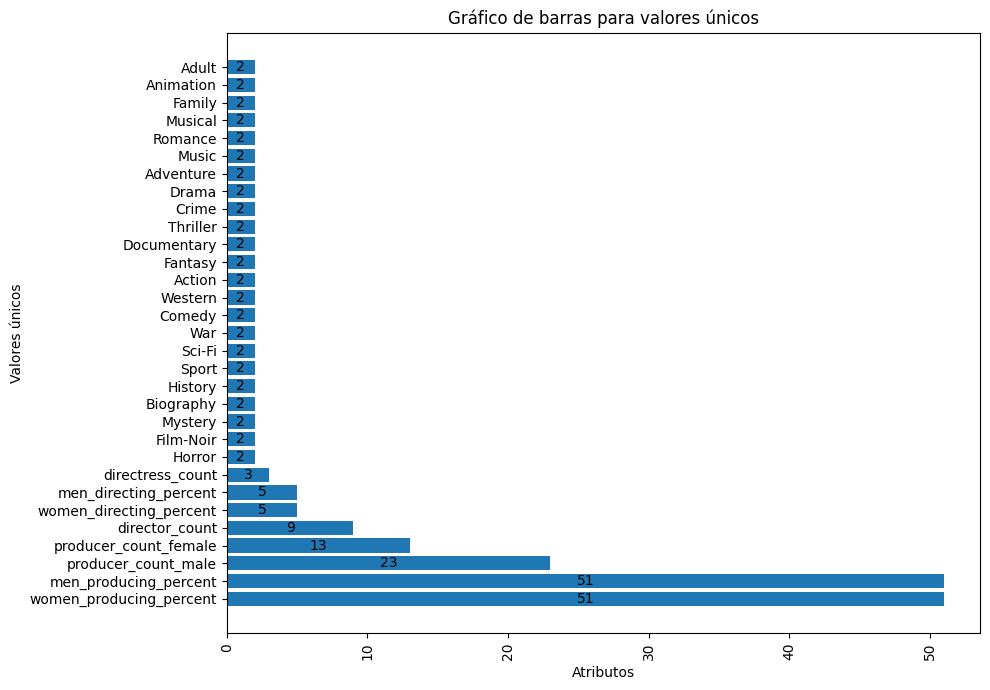

In [ ]:
# x and y data to compare
x1 =  df_.nunique().sort_values(ascending=False).iloc[10:].index #atributos
y1 = df_.nunique().sort_values(ascending=False).iloc[10:].values  # valores


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.barh(x1, y1)
# add the x and y label
ax.set_ylabel('Valores únicos')
ax.set_xlabel('Atributos')
# melhorando a visualização
ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'Black')

# title
plt.title('Gráfico de barras para valores únicos')
plt.tight_layout()
plt.show()

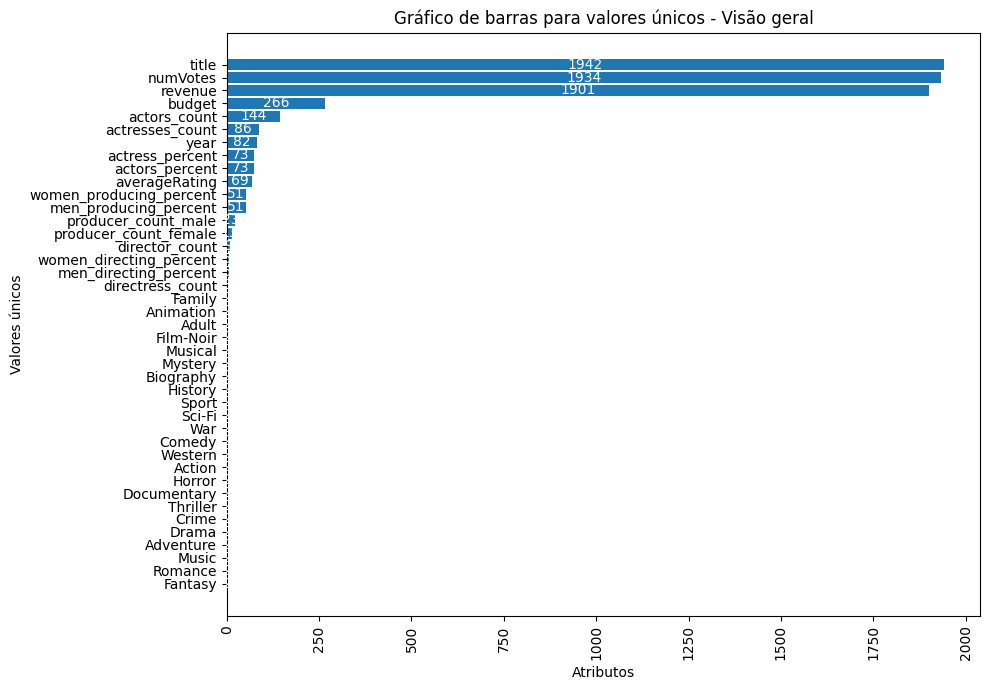

In [ ]:
# x and y data to compare
x2 =  df_.nunique().sort_values().index #atributos
y2 = df_.nunique().sort_values().values  # valores


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.barh(x2, y2)
# add the x and y label
ax.set_ylabel('Valores únicos')
ax.set_xlabel('Atributos')
# melhorando a visualização
ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'white')

# title
plt.title('Gráfico de barras para valores únicos - Visão geral')
plt.tight_layout()
plt.show()

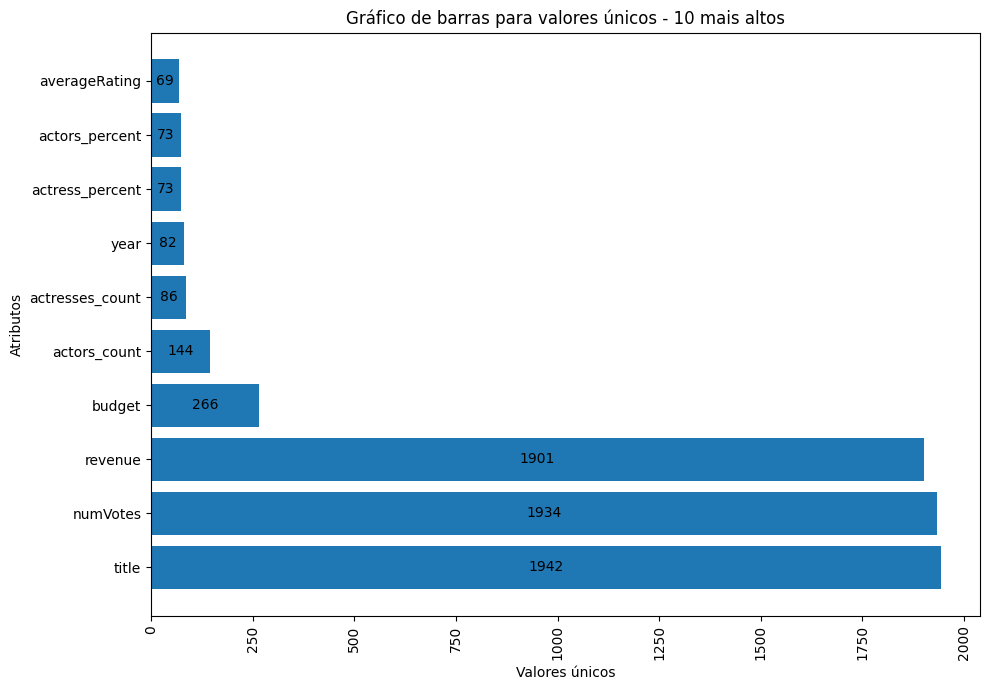

In [ ]:
# x and y data to compare
x2 =  df_.nunique().sort_values(ascending=False).iloc[0:10].index #atributos
y2 = df_.nunique().sort_values(ascending=False).iloc[0:10].values  # valores


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.barh(x2, y2)
# add the x and y label
ax.set_xlabel('Valores únicos')
ax.set_ylabel('Atributos')
# melhorando a visualização
ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'black')

# title
plt.title('Gráfico de barras para valores únicos - 10 mais altos')
plt.tight_layout()
plt.show()

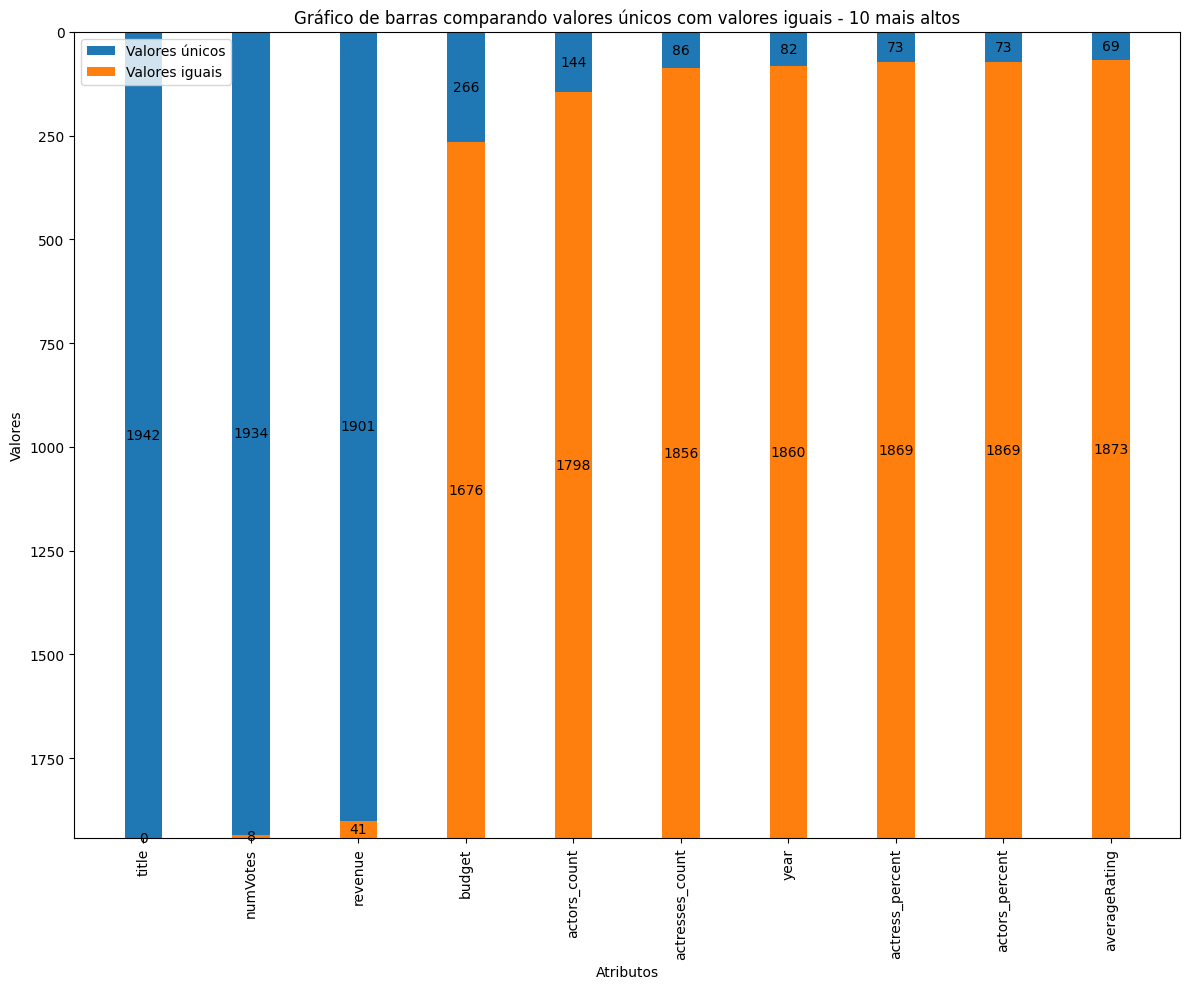

In [ ]:


valores_iguais = list()
valor_total = df_.shape[0]
for valor in df_.nunique().sort_values(ascending=False).values:
    valor_igual = valor_total - valor
    valores_iguais.append(valor_igual)
    #print(valores_iguais)

#valores_iguais = pd.DataFrame(valores_iguais)

# x and y data to compare
x = df_.nunique().sort_values(ascending=False).iloc[0:10].values #valores únicos
y = valores_iguais[:10] #valores iguais - tem que ser do tipo list

atributos = df_.nunique().sort_values(ascending=False).iloc[0:10].index

n = len(x)
x_location = np.arange(n)
bar_width = 0.35

fig, ax = plt.subplots(figsize = (12,10))

#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'valores únicos')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'valores iguais')
#x_bar = ax.bar(x_location,y, bar_width, bottom= x, label = 'valores iguais')
#y_bar = ax.bar(x_location, x, bar_width, label = 'valores únicos')

# add the legend
ax.legend(('Valores únicos', 'Valores iguais'), loc = 'best')
# add the x and y label
ax.set_ylabel('Valores')
ax.set_xlabel('Atributos')


# add the x axis labels
ax.set_xticks(x_location)
ax.set_xticklabels(atributos)
# melhorando a visualização
ax.tick_params(axis='x', labelrotation = 90)
# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'black')
ax.bar_label(y_bar, label_type= 'center', color = 'black')

plt.gca().invert_yaxis()
# title
plt.title('Gráfico de barras comparando valores únicos com valores iguais - 10 mais altos')
plt.tight_layout()
plt.show()

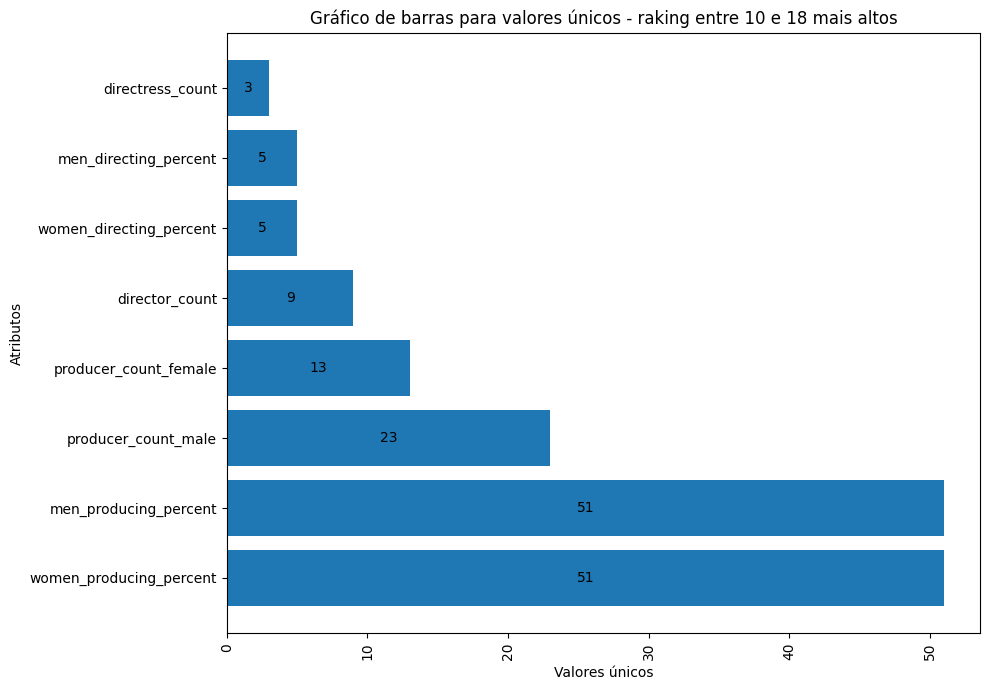

In [ ]:
# x and y data to compare
x2 =  df_.nunique().sort_values(ascending=False).iloc[10:18].index #atributos
y2 = df_.nunique().sort_values(ascending=False).iloc[10:18].values  # valores


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.barh(x2, y2)
# add the x and y label
ax.set_xlabel('Valores únicos')
ax.set_ylabel('Atributos')
# melhorando a visualização
ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'black')

# title
plt.title('Gráfico de barras para valores únicos - raking entre 10 e 18 mais altos')
plt.tight_layout()
plt.show()

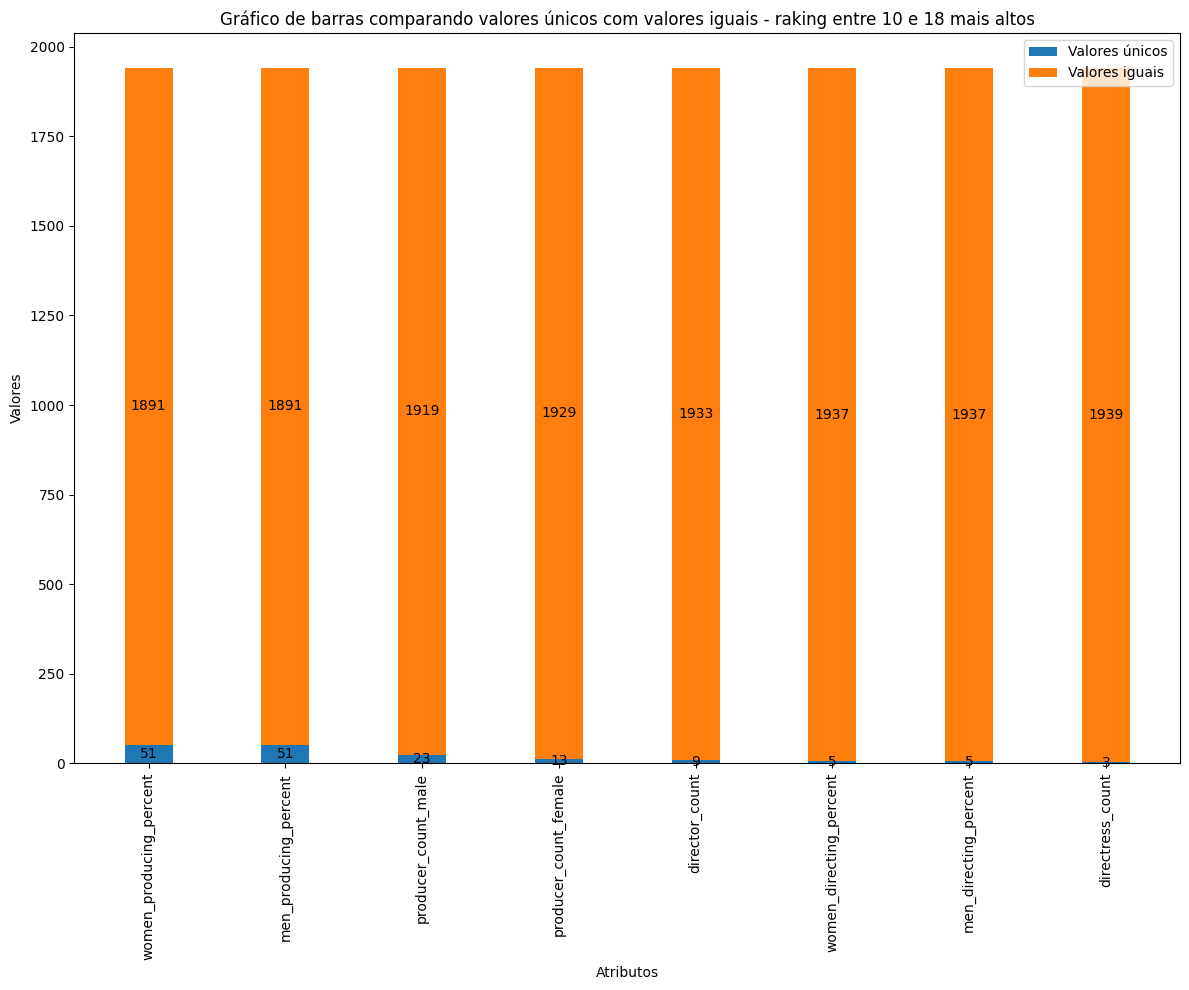

In [ ]:
# x and y data to compare
x = df_.nunique().sort_values(ascending=False).iloc[10:18].values #valores únicos
y = valores_iguais[10:18] #valores iguais - tem que ser do tipo list

atributos = df_.nunique().sort_values(ascending=False).iloc[10:18].index

n = len(x)
x_location = np.arange(n)
bar_width = 0.35

fig, ax = plt.subplots(figsize = (12,10))

#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'valores únicos')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'valores iguais')
#x_bar = ax.bar(x_location,y, bar_width, bottom= x, label = 'valores iguais')
#y_bar = ax.bar(x_location, x, bar_width, label = 'valores únicos')

# add the legend
ax.legend(('Valores únicos', 'Valores iguais'), loc = 'best')
# add the x and y label
ax.set_ylabel('Valores')
ax.set_xlabel('Atributos')


# add the x axis labels
ax.set_xticks(x_location)
ax.set_xticklabels(atributos)
# melhorando a visualização
ax.tick_params(axis='x', labelrotation = 90)
# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'Black')
ax.bar_label(y_bar, label_type= 'center', color = 'black')


# title
plt.title('Gráfico de barras comparando valores únicos com valores iguais - raking entre 10 e 18 mais altos')
plt.tight_layout()
plt.show()

**Podemos observar que a base nos garante que cada registro presente representa somente um único filme, logo não espera-se duplicatas de um filme nessa base. Também é possível notar que a base possui filmes em um intervalo de 82 anos. Como esperado, as demais variáveis ou são categóricas, apresentando valores binários por exemplo ou são contínuas, sendo possível ver a concentração de valores dada pela sua dispersão, ou aproximação numérica realizada no momento da captura dos dados (valores decimais aproximados para inteiros) como a variável budget.**

**Vamos analisar agora o tipo de distribuição os atributos que utilizaremos ao longo da análise pertencem**

## **Avaliação visual - actors_count e actresses_count / actors_percent e actress_percent**

**Vamos avaliar o histograma dos atributos actors_count e actress_count / actors_percent e actress_percent**

**Vamos avaliar então o histograma junto com a distribuição normal**

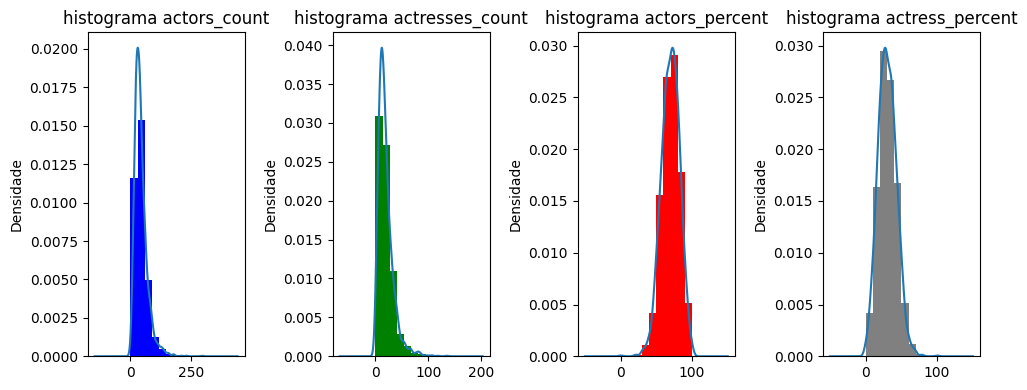

In [ ]:
# criando o figure e o axes no matplotlib

dados_actors_count = df_['actors_count']
dados_actresses_count = df_['actresses_count']
dados_actors_percent = df_['actors_percent']
dados_actress_percent = df_['actress_percent']

fig, ax = plt.subplots(figsize = (10,4),nrows=1, ncols=4)

#actors_count
dados_actors_count.plot(kind='hist', density = True, color= 'blue', ax = ax[0]) # criar o histograma -> barras verticais
dados_actors_count.plot(kind='kde',ax = ax[0]) # criar a linha
ax[0].set_title("histograma actors_count")
ax[0].set_ylabel('Densidade')

#actresses_count
dados_actresses_count.plot(kind='hist', density = True,color= 'g', ax = ax[1]) # criar o histograma -> barras verticais
dados_actresses_count.plot(kind='kde',ax = ax[1]) # criar a linha
ax[1].set_title("histograma actresses_count")
ax[1].set_ylabel('Densidade')

#actors_percent
dados_actors_percent.plot(kind='hist', density = True,color= 'red', ax = ax[2]) # criar o histograma -> barras verticais
dados_actors_percent.plot(kind='kde',ax = ax[2]) # criar a linha
ax[2].set_title("histograma actors_percent")
ax[2].set_ylabel('Densidade')

#actress_percent
dados_actress_percent.plot(kind='hist', density = True,color= 'gray', ax = ax[3]) # criar o histograma -> barras verticais
dados_actress_percent.plot(kind='kde',ax = ax[3]) # criar a linha
ax[3].set_title("histograma actress_percent")
ax[3].set_ylabel('Densidade')



plt.tight_layout()
plt.show()

**Aqui percebemos através do histograma e da curva de distribuição normal que o atributo actors_count, actresses_count, actress_percent e actress_percent visualmente tem grandes chances de ter uma distribuição normal**

**Aqui vamos verificar também qual tipo de ditribuição pelo gráfico Quantile-Quantile plot.**

**Este gráfico também é conhecido como Quantile-Quantile plot. Ele serve para verificar se os dados seguem uma distribuição específica.**

**Se as distribuições são semelhantes, então os pontos deverão cair em cima da linha vermelha (diagonal).**

**Referência:**

[Testes de Normalidade usando Python](https://thalesferraz.medium.com/testes-de-normalidade-usando-python-1abddbc9311f)

[Quantile-Quantile Plot using python statsmodels api](https://stackoverflow.com/questions/48009614/quantile-quantile-plot-using-python-statsmodels-api)

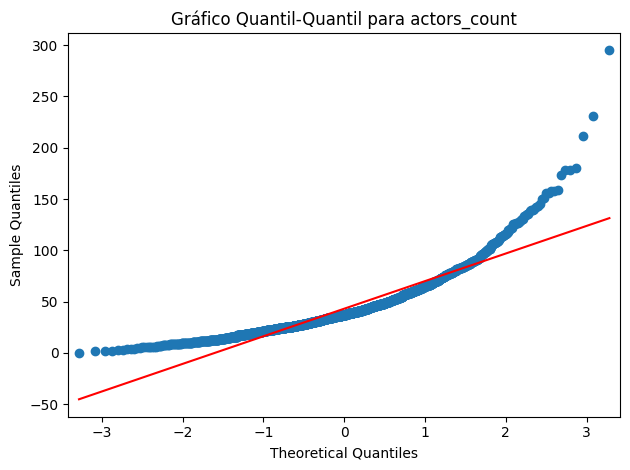

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_actors_percent = df_['actors_count']

sm.qqplot(dados_normais_actors_percent, line='s')
plt.title('Gráfico Quantil-Quantil para actors_count')
plt.tight_layout()
plt.show()

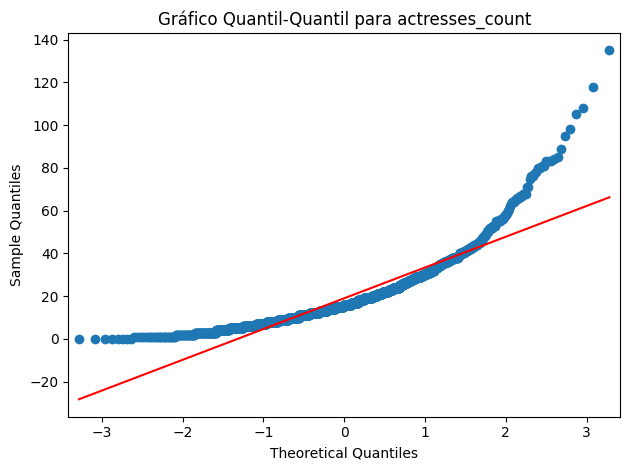

In [ ]:
dados_normais_actors_percent = df_['actresses_count']

sm.qqplot(dados_normais_actors_percent, line='s')
plt.title('Gráfico Quantil-Quantil para actresses_count')
plt.tight_layout()
plt.show()

**Podemos perceber aqui que ambas as curva se aproximam bem da reta ao longo de sua trajetória.  Assim, podemos inferir que visualmente, o atributo actors_percent e actress_percent tem uma distribuição normal.**

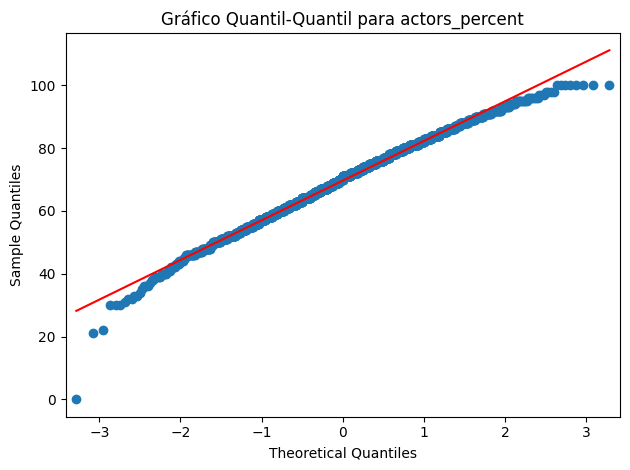

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_actors_percent = df_['actors_percent']

sm.qqplot(dados_normais_actors_percent, line='s')
plt.title('Gráfico Quantil-Quantil para actors_percent')
plt.tight_layout()
plt.show()

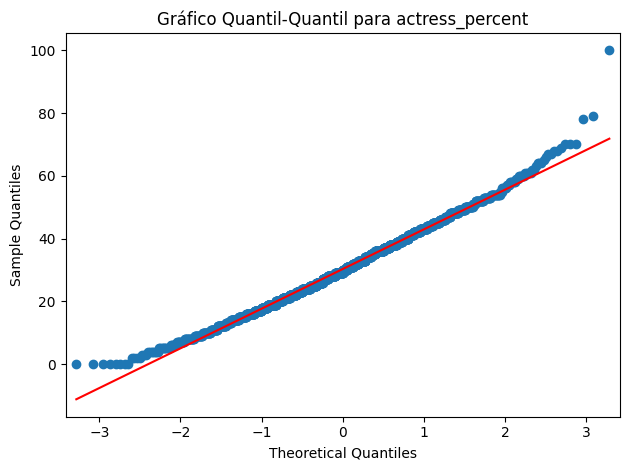

In [ ]:
dados_normais_actress_percent = df_['actress_percent']

sm.qqplot(dados_normais_actress_percent, line='s')
plt.title('Gráfico Quantil-Quantil para actress_percent')
plt.tight_layout()
plt.show()

**Podemos perceber aqui que ambas as curva se aproximam bem da reta ao longo de sua trajetória.  Assim, podemos inferir que visualmente, o atributo actors_percent e actress_percent tem uma distribuição normal até mais aproximada do que os atributos actors_count e actresses_count.**

**Vamos confirmar agora com cálculos estatísticos**

## **Avaliação estatística - actors_count e actresses_count / actors_percent e actress_percent**

In [ ]:
media_actors_count= df_.describe()['actors_count']['mean']
mediana_actors_count = df_.describe()['actors_count']['50%']
df_.describe()['actors_count'][['mean', '50%']]


mean   43.12
50%    37.00
Name: actors_count, dtype: float64

In [ ]:
media_actresses_count= df_.describe()['actresses_count']['mean']
mediana_actresses_count = df_.describe()['actresses_count']['50%']
df_.describe()['actresses_count'][['mean', '50%']]


mean   19.02
50%    16.00
Name: actresses_count, dtype: float64

**A média(mean) e a mediana(50%) do atributo actors_count e actresses_count tem valores muito próximos, o que nos faz acreditar que ela se comporta como uma distribuição normal**

**A média refere-se ao centro da distribuição e o desvio padrão ao espalhamento (ou achatamento) da curva.**

**A distribuição normal é simétrica em torno da média o que implica que a média, a mediana e a moda são todas coincidentes. Ou seja, tais medidas são bem próximas, semelhantes, convergentes.**

**Referência:**

[A distribuição Normal]('http://www.leg.ufpr.br/~silvia/CE008/node44.html#:~:text=A%20m%C3%A9dia%20refere%2Dse%20ao,a%20moda%20s%C3%A3o%20todas%20coincidentes.')

**Assim, vamos verificar a moda de ambos.**

In [ ]:
moda_actors_count = statistics.mode(df_['actors_count'])
moda_actresses_count = statistics.mode(df_['actresses_count'])

print('A moda do atributo actors_count é de : {}'.format(moda_actors_count))
print('A moda do atributo actresses_count é de : {}'.format(moda_actresses_count))

A moda do atributo actors_count é de : 25
A moda do atributo actresses_count é de : 11


**Assim temos que:**

In [ ]:
#Resumo para actors_count
print('A média do atributo actors_count é de : {}'.format(media_actors_count.round(2)))
print('A mediana do atributo actors_count é de : {}'.format(mediana_actors_count))
print('A moda do atributo actors_count é de : {}'.format(moda_actors_count))

A média do atributo actors_count é de : 43.12
A mediana do atributo actors_count é de : 37.0
A moda do atributo actors_count é de : 25


In [ ]:
#Resumo para actresses_count
print('A média do atributo actresses_count é de : {}'.format(media_actresses_count.round(2)))
print('A mediana do atributo actresses_count é de : {}'.format(mediana_actresses_count))
print('A moda do atributo actresses_count é de : {}'.format(moda_actresses_count))

A média do atributo actresses_count é de : 19.02
A mediana do atributo actresses_count é de : 16.0
A moda do atributo actresses_count é de : 11


**Como os valores de média, mediana e moda são bem próximos, constatamos que os atributos actors_count e actresses_count tem uma distribuição normal.**

In [ ]:
media_actors_percent= df_.describe()['actors_percent']['mean']
mediana_actors_percent = df_.describe()['actors_percent']['50%']
moda_actors_percent = statistics.mode(df_['actors_percent'])

#Resumo para actors_percent
print('A média do atributo actors_percent é de : {}'.format(media_actors_percent.round(2)))
print('A mediana do atributo actors_percent é de : {}'.format(mediana_actors_percent))
print('A moda do atributo actors_percent é de : {}'.format(moda_actors_percent))

A média do atributo actors_percent é de : 69.68
A mediana do atributo actors_percent é de : 70.5
A moda do atributo actors_percent é de : 71.0


In [ ]:
media_actress_percent= df_.describe()['actress_percent']['mean']
mediana_actress_percent = df_.describe()['actress_percent']['50%']
moda_actress_percent = statistics.mode(df_['actress_percent'])

#Resumo para actors_percent
print('A média do atributo actress_percent é de : {}'.format(media_actress_percent.round(2)))
print('A mediana do atributo actress_percent é de : {}'.format(mediana_actress_percent))
print('A moda do atributo actress_percent é de : {}'.format(moda_actress_percent))

A média do atributo actress_percent é de : 30.32
A mediana do atributo actress_percent é de : 29.5
A moda do atributo actress_percent é de : 29.0


**Como os valores de média, mediana e moda são bem próximos, constatamos que os atributos actors_percent e actress_percent tem uma distribuição normal.**

## **Boxplot - actors_count e actresses_count / actors_percent e actress_percent**

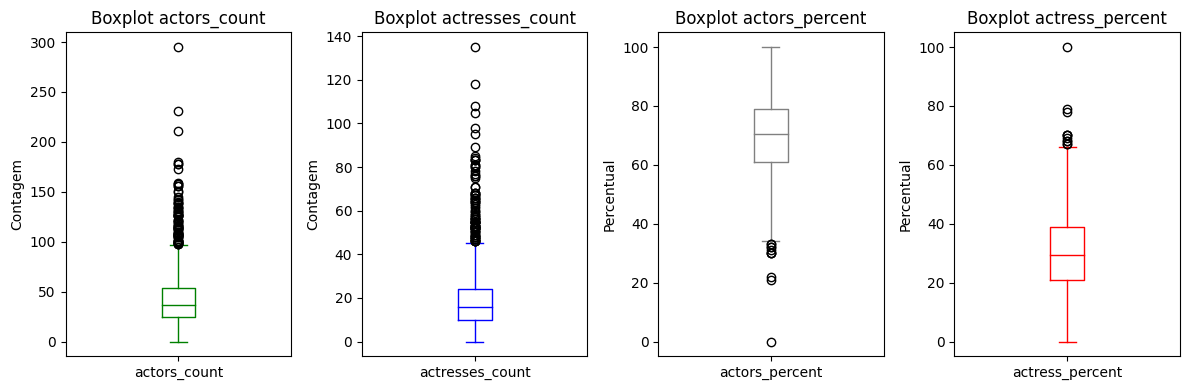

In [ ]:
# Boxplot
# criando o figure e o axes no matplotlib

#dados_actors_count = df_['actors_count']
#dados_actresses_count = df_['actresses_count']
#dados_actors_percent = df_['actors_percent']
#dados_actress_percent = df_['actress_percent']

fig, ax = plt.subplots(figsize = (12,4),nrows=1, ncols=4)

#plot actors_count
dados_actors_count.plot(kind='box',color= 'g',sharex = False, sharey = False, ax = ax[0])
ax[0].set_title("Boxplot actors_count")
ax[0].set_ylabel('Contagem')

#plot actresses_count
dados_actresses_count.plot(kind='box',color= 'blue',sharex = False, sharey = False, ax = ax[1])
ax[1].set_title("Boxplot actresses_count")
ax[1].set_ylabel('Contagem')

#plot actors_percent
dados_actors_percent.plot(kind='box', color= 'gray', sharex = False, sharey = False, ax = ax[2])
ax[2].set_title("Boxplot actors_percent")
ax[2].set_ylabel('Percentual')

#plot actress_percent
dados_actress_percent.plot(kind='box',color= 'red',sharex = False, sharey = False, ax = ax[3])
ax[3].set_title("Boxplot actress_percent")
ax[3].set_ylabel('Percentual')

plt.tight_layout()
plt.show()

In [ ]:
df_[['actors_count', 'actresses_count', 'actors_percent', 'actress_percent']].describe()

actors_count  actresses_count  actors_percent  actress_percent
count      1,942.00         1,942.00        1,942.00         1,942.00
mean          43.12            19.02           69.68            30.32
std           26.90            14.39           12.65            12.65
min            0.00             0.00            0.00             0.00
25%           25.00            10.00           61.00            21.00
50%           37.00            16.00           70.50            29.50
75%           54.00            24.00           79.00            39.00
max          295.00           135.00          100.00           100.00

#### **actors_count**
* o máximo de contagem de atores dentro do padrão é de cerca de 100
* Mais de 75% da contagem é de 54

**Com isso observamos que a maioria da contagem está entre 54 e 100.**
* Metade da contagem é de 37 atores
* Menos de 25% da contagem é menor do que 25

**Com isso observamos que a menor parcela da contagem está entre 25 e 0.**
* O desvio padrão é alto o que indica grande variação dos dados



#### **actresses_count**
* o máximo de contagem de atrizes dentro do padrão é de cerca de 48
* Mais de 75% da contagem é de 24

**Com isso observamos que a maioria da contagem está entre 24 e 48.**
* Metade da contagem é de 16 atores
* Menos de 25% da contagem é menor do que 10

**Com isso observamos que a menor parcela da contagem está entre 10 e 0.**




#### **actors_percent**
* o máximo de porcentagem de atores dentro do padrão é de 100%
* Mais de 75% da porcentagem de atores é de 79%

**Com isso observamos que a maioria da porcentagem está entre 79% e 100%.**
* Metade da porcentagem é de 70.50% de atores
* Menos de 25% da porcentagem é menor do que 61%

**Com isso observamos que a menor parcela da porcentagem está entre 61% e 45% aproximadamente.**




#### **actress_percent**
* o máximo de porcentagem de atrizes dentro do padrão é de cerca de 68%
* Mais de 75% da porcentagem é de 39%

**Com isso observamos que faixa da maioria de porcentagem está entre 39% e 68%.**
* Metade da porcentagem das atrizes é de 29.50%
* Menos de 25% da porcentagem é menor do que 21%

**Com isso observamos que a menor parcela da porcentagem está entre 21% e 0%.**




**Com isso, observamos que temos muitos mais atores do que atrizes sendo que o valor máximo de porcentagem de atrizes é menor do que 75% dos valores da porcentagem de atores, que representa a maioria dos dados.**

## **Avaliação visual - producer_count_male e producer_count_female / women_producing_percent e men_producing_percent**

**Vamos avaliar o histograma dos atributos producer_count_male e producer_count_female**

**Vamos avaliar então o histograma junto com a distribuição normal**

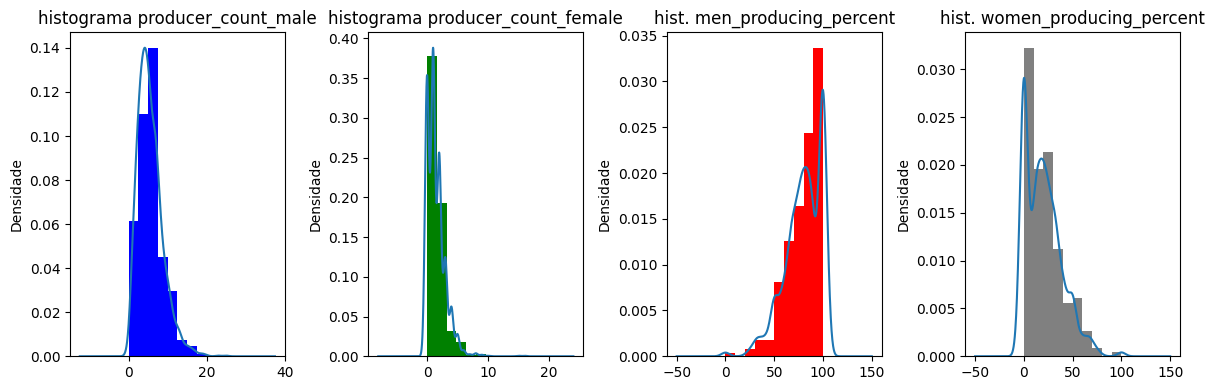

In [ ]:
# criando o figure e o axes no matplotlib

#dados do plot
dados_producer_count_male = df_['producer_count_male']
dados_producer_count_female = df_['producer_count_female']
dados_men_producing_percent = df_['men_producing_percent']
dados_women_producing_percent = df_['women_producing_percent']

fig, ax = plt.subplots(figsize = (12,4),nrows=1, ncols=4)

#plot producer_count_male
dados_producer_count_male.plot(kind='hist', density = True, color= 'blue', ax = ax[0]) # criar o histograma -> barras verticais
dados_producer_count_male.plot(kind='kde',ax = ax[0]) # criar a linha
ax[0].set_title("histograma producer_count_male")
ax[0].set_ylabel('Densidade')

#plot producer_count_female
dados_producer_count_female.plot(kind='hist', density = True,color= 'g', ax = ax[1]) # criar o histograma -> barras verticais
dados_producer_count_female.plot(kind='kde',ax = ax[1]) # criar a linha
ax[1].set_title("histograma producer_count_female")
ax[1].set_ylabel('Densidade')


#plot men_producing_percent
dados_men_producing_percent.plot(kind='hist', density = True, color= 'red', ax = ax[2]) # criar o histograma -> barras verticais
dados_men_producing_percent.plot(kind='kde',ax = ax[2]) # criar a linha
ax[2].set_title("hist. men_producing_percent")
ax[2].set_ylabel('Densidade')

#plot women_producing_percent
dados_women_producing_percent.plot(kind='hist', density = True,color= 'gray', ax = ax[3]) # criar o histograma -> barras verticais
dados_women_producing_percent.plot(kind='kde',ax = ax[3]) # criar a linha
ax[3].set_title("hist. women_producing_percent")
ax[3].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

**Aqui percebemos através do histograma e da curva de distribuição normal que o atributo producer_count_male visualmente tem grandes chances de ter uma distribuição normal. Já o atributo producer_count_female parece ter uma distribuição mutimodal.**

**Aqui percebemos também que através do histograma e da curva de distribuição normal que o atributo men_producing_percent e women_producing_percent visualmente não tem uma distribuição normal, mas sim uma distribuição bimodal.**

**Aqui vamos verificar também qual tipo de ditribuição pelo gráfico Quantile-Quantile plot.**

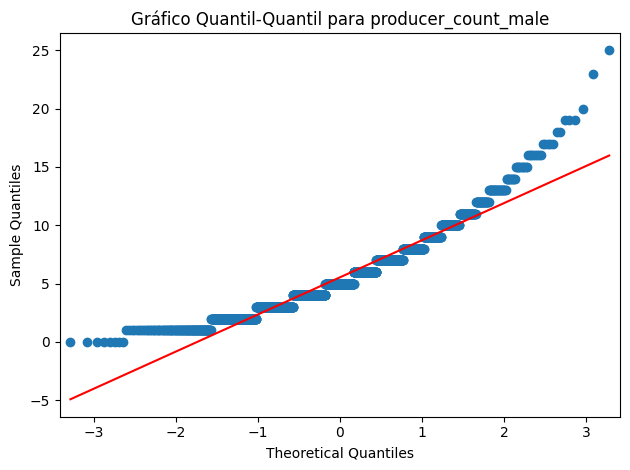

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_actors_percent = df_['producer_count_male']

sm.qqplot(dados_normais_actors_percent, line='s')
plt.title('Gráfico Quantil-Quantil para producer_count_male')
plt.tight_layout()
plt.show()

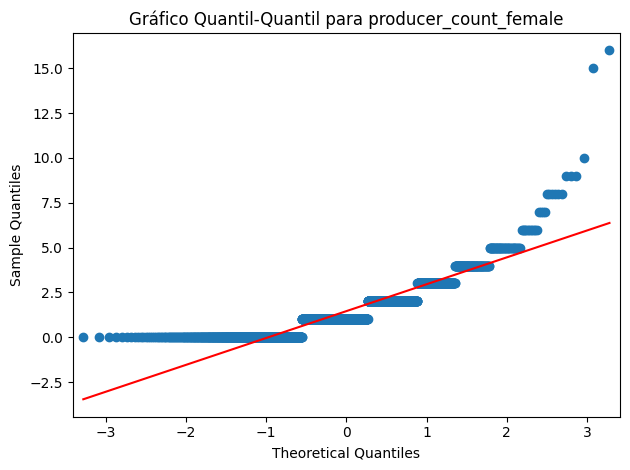

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_actors_percent = df_['producer_count_female']

sm.qqplot(dados_normais_actors_percent, line='s')
plt.title('Gráfico Quantil-Quantil para producer_count_female')
plt.tight_layout()
plt.show()

**Podemos perceber aqui que ambas as curva não se aproximam da reta ao longo de sua trajetória.  Assim, podemos inferir que visualmente, o atributo producer_count_male tem mais chances de ser uma distribuição normal, mas o atributo producer_count_female não segue esta distribuição tão quanto o primeiro atributo.**

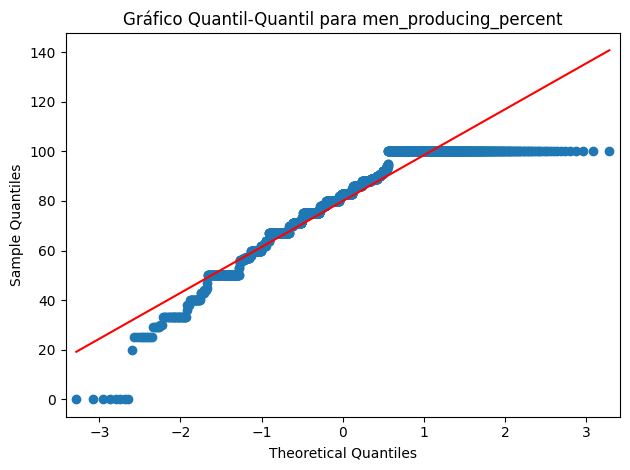

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_men_producing_percent = df_['men_producing_percent']

sm.qqplot(dados_normais_men_producing_percent, line='s')
plt.title('Gráfico Quantil-Quantil para men_producing_percent')
plt.tight_layout()
plt.show()

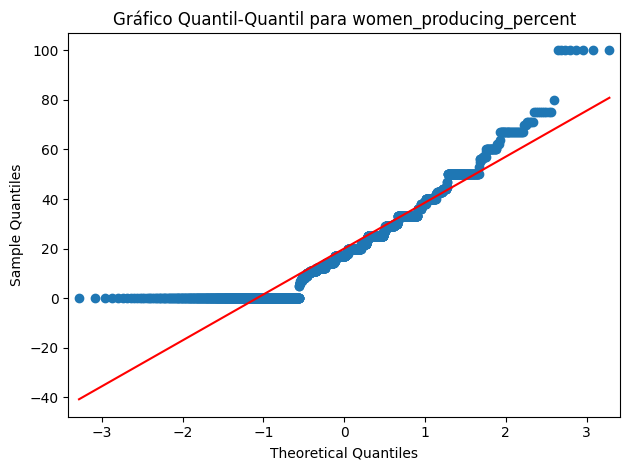

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_women_producing_percent = df_['women_producing_percent']

sm.qqplot(dados_women_producing_percent, line='s')
plt.title('Gráfico Quantil-Quantil para women_producing_percent')
plt.tight_layout()
plt.show()


**Podemos perceber aqui que ambas as curva se aproximam da reta ao longo de sua trajetória em apenas cerca de um terço de sua distribuição.  Assim, podemos inferir que visualmente, o atributo men_producing_percent e women_producing_percent  não tem uma distribuição normal, seguindo provavelmente uma distribuição bimodal.**

**Vamos confirmar agora com cálculos estatísticos**

## **Avaliação estatística - producer_count_male e producer_count_female / women_producing_percent e men_producing_percent**

In [ ]:
media_producer_count_male= df_.describe()['producer_count_male']['mean']
mediana_producer_count_male = df_.describe()['producer_count_male']['50%']
moda_producer_count_male = statistics.mode(df_['producer_count_male'])

#Resumo para producer_count_male
print('A média do atributo producer_count_male é de : {}'.format(media_producer_count_male.round(2)))
print('A mediana do atributo producer_count_male é de : {}'.format(mediana_producer_count_male))
print('A moda do atributo producer_count_male é de : {}'.format(moda_producer_count_male))

A média do atributo producer_count_male é de : 5.54
A mediana do atributo producer_count_male é de : 5.0
A moda do atributo producer_count_male é de : 4


In [ ]:
media_producer_count_female= df_.describe()['producer_count_female']['mean']
mediana_producer_count_female = df_.describe()['producer_count_female']['50%']
moda_producer_count_female = statistics.mode(df_['producer_count_female'])

#Resumo para producer_count_female
print('A média do atributo producer_count_male é de : {}'.format(media_producer_count_female.round(2)))
print('A mediana do atributo producer_count_male é de : {}'.format(mediana_producer_count_female))
print('A moda do atributo producer_count_male é de : {}'.format(moda_producer_count_female))

A média do atributo producer_count_male é de : 1.46
A mediana do atributo producer_count_male é de : 1.0
A moda do atributo producer_count_male é de : 1


**Como os valores de média, mediana e moda são bem próximos, constatamos que os atributos producer_count_male e producer_count_female tem uma distribuição normal.**

In [ ]:
media_men_producing_percent= df_.describe()['men_producing_percent']['mean']
mediana_men_producing_percent = df_.describe()['men_producing_percent']['50%']
moda_men_producing_percent = statistics.mode(df_['men_producing_percent'])

#Resumo para producer_count_male
print('A média do atributo men_producing_percent é de : {}'.format(media_men_producing_percent.round(2)))
print('A mediana do atributo men_producing_percent é de : {}'.format(mediana_men_producing_percent))
print('A moda do atributo men_producing_percent é de : {}'.format(moda_men_producing_percent))

A média do atributo men_producing_percent é de : 79.98
A mediana do atributo men_producing_percent é de : 83.0
A moda do atributo men_producing_percent é de : 100.0


In [ ]:
media_women_producing_percent= df_.describe()['women_producing_percent']['mean']
mediana_women_producing_percent = df_.describe()['women_producing_percent']['50%']
moda_women_producing_percent = statistics.mode(df_['women_producing_percent'])

#Resumo para producer_count_male
print('A média do atributo women_producing_percent é de : {}'.format(media_women_producing_percent.round(2)))
print('A mediana do atributo women_producing_percent é de : {}'.format(mediana_women_producing_percent))
print('A moda do atributo women_producing_percent é de : {}'.format(moda_women_producing_percent))

A média do atributo women_producing_percent é de : 20.02
A mediana do atributo women_producing_percent é de : 17.0
A moda do atributo women_producing_percent é de : 0.0


**Como os valores de média, mediana e moda não são bem próximos, constatamos que os atributos men_producing_percent e women_producing_percent não tem uma distribuição normal, mas sim uma distribuição bimodal.**

**Com isso, vamos avaliar o boxplot destes atributos.**

## **Boxplot - producer_count_male e producer_count_female / women_producing_percent e men_producing_percent**

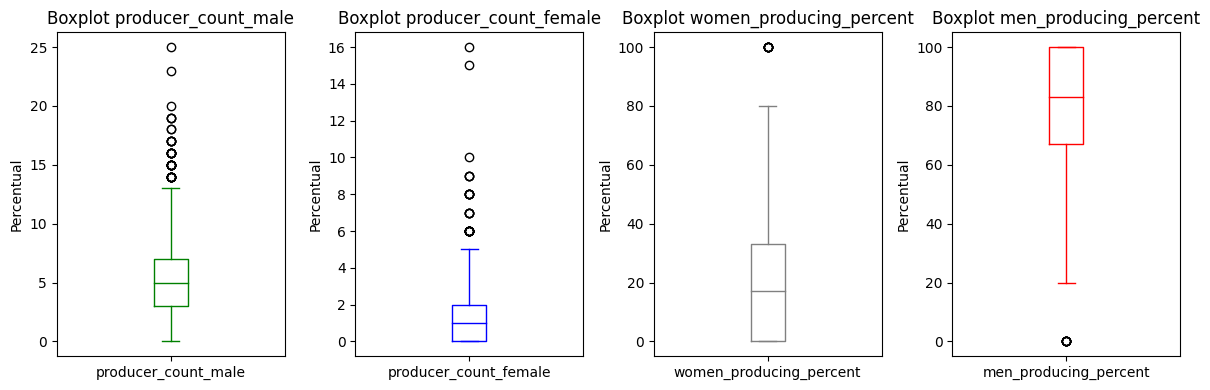

In [ ]:
# Boxplot
# criando o figure e o axes no matplotlib

fig, ax = plt.subplots(figsize = (12,4),nrows=1, ncols=4)

#plot producer_count_male
dados_producer_count_male.plot(kind='box',color= 'g',sharex = False, sharey = False, ax = ax[0])
ax[0].set_title("Boxplot producer_count_male")
ax[0].set_ylabel('Percentual')

#plot producer_count_female
dados_producer_count_female.plot(kind='box',color= 'blue',sharex = False, sharey = False, ax = ax[1])
ax[1].set_title("Boxplot producer_count_female")
ax[1].set_ylabel('Percentual')

#plot women_producing_percent
dados_women_producing_percent.plot(kind='box', color= 'gray', sharex = False, sharey = False, ax = ax[2])
ax[2].set_title("Boxplot women_producing_percent")
ax[2].set_ylabel('Percentual')

#plot men_producing_percent
dados_men_producing_percent.plot(kind='box',color= 'red',sharex = False, sharey = False, ax = ax[3])
ax[3].set_title("Boxplot men_producing_percent")
ax[3].set_ylabel('Percentual')

plt.tight_layout()
plt.show()

**Acima, percebemos que ambos os atributos possuem apenas um outiliers. Percebemos também que os Boxplots estão invertidos. Para o atributo men_producing_percent vale perceber que temos que o máximo tem o mesmo valor de Q3(75% dos valores) no valor de 100%. Para women_producing_percent contudo, o mínimo tem o mesmo valor de Q1(25% dos valores) no valor de 0%. Podemos concluir que existe uma participação maior de mulheres produzindo, o que pode ser olhado com certo otimismo, não pela base de dados que possímos mas sim, pela barreira de entrada de mais mulheres no futuro finaciando projetos cinematográficos, aparentemente, ser menor do que em outras áreas da produção. No entando, ainda é possível ver como a concentração do dinheiro ainda está mais presente na parcela masculina.**

## **Avaliação visual - director_count e directress_count / women_directing_percent e men_directing_percent**

**Vamos avaliar então o histograma junto com a distribuição normal**

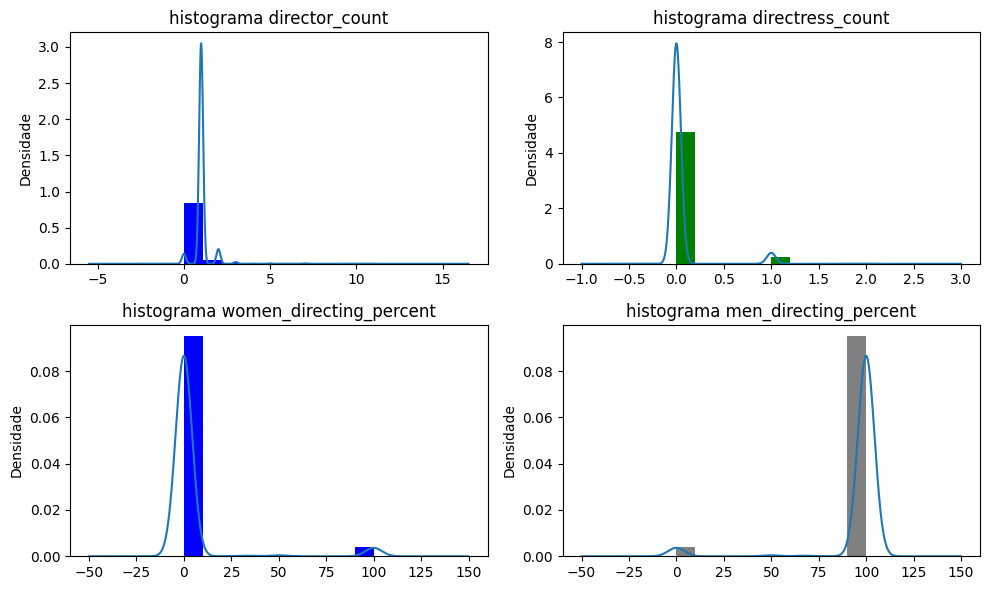

In [ ]:
# criando o figure e o axes no matplotlib

#dados to the plot
dados_director_count = df_['director_count']
dados_directress_count = df_['directress_count']
dados_women_directing_percent = df_['women_directing_percent']
dados_men_directing_percent = df_['men_directing_percent']

fig, ax = plt.subplots(figsize = (10,6),nrows=2, ncols=2)

#plot director_count
dados_director_count.plot(kind='hist', density = True, color= 'blue', ax = ax[0][0]) # criar o histograma -> barras verticais
dados_director_count.plot(kind='kde',ax = ax[0][0]) # criar a linha
ax[0][0].set_title("histograma director_count")
ax[0][0].set_ylabel('Densidade')

#plot directress_count
dados_directress_count.plot(kind='hist', density = True,color= 'g', ax = ax[0][1]) # criar o histograma -> barras verticais
dados_directress_count.plot(kind='kde',ax = ax[0][1]) # criar a linha
ax[0][1].set_title("histograma directress_count")
ax[0][1].set_ylabel('Densidade')

#plot women_directing_percent
dados_women_directing_percent.plot(kind='hist', density = True,color= 'blue', ax = ax[1][0]) # criar o histograma -> barras verticais
dados_women_directing_percent.plot(kind='kde',ax = ax[1][0]) # criar a linha
ax[1][0].set_title("histograma women_directing_percent")
ax[1][0].set_ylabel('Densidade')

#plot men_directing_percent
dados_men_directing_percent.plot(kind='hist', density = True,color= 'gray', ax = ax[1][1]) # criar o histograma -> barras verticais
dados_men_directing_percent.plot(kind='kde',ax = ax[1][1]) # criar a linha
ax[1][1].set_title("histograma men_directing_percent")
ax[1][1].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

**Aqui percebemos através do histograma e da curva de distribuição normal que o atributo director_count e directress_count visualmente não tem uma distribuição normal, mas sim uma distribuição multimodal e bimodal respectivamente.**

**Aqui percebemos através do histograma e da curva de distribuição normal que o atributo women_directing_percent e men_directing_percent visualmente não tem uma distribuição normal, mas sim uma distribuição bimodal.**

**Aqui vamos verificar também qual tipo de ditribuição pelo gráfico Quantile-Quantile plot.**

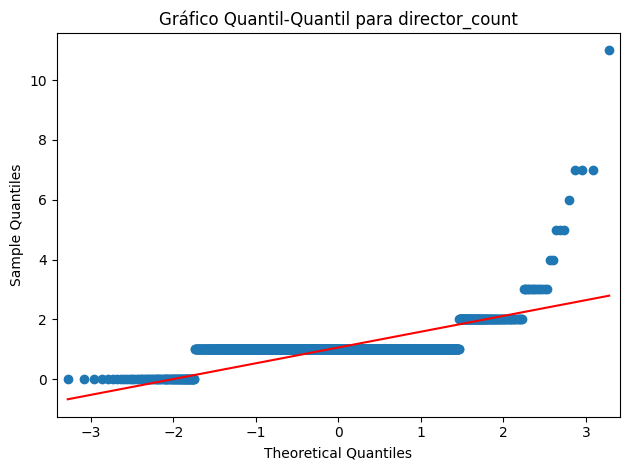

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_director_count = df_['director_count']

sm.qqplot(dados_normais_director_count, line='s')
plt.title('Gráfico Quantil-Quantil para director_count')
plt.tight_layout()
plt.show()

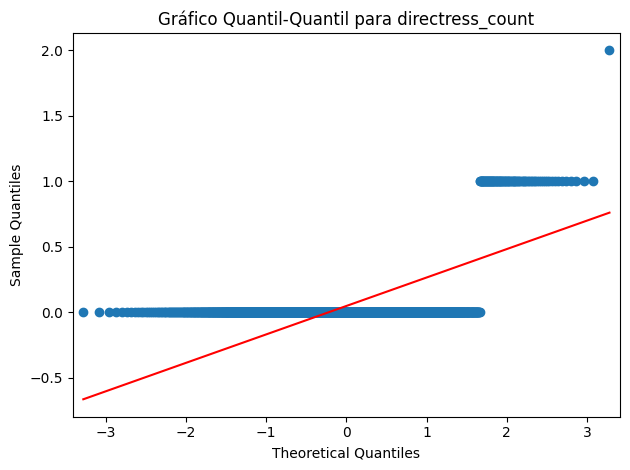

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_directress_count = df_['directress_count']

sm.qqplot(dados_normais_directress_count, line='s')
plt.title('Gráfico Quantil-Quantil para directress_count')
plt.tight_layout()
plt.show()

**Podemos perceber aqui que ambas as curva não se aproximam da reta ao longo de sua trajetória.Assim, podemos inferir que visualmente, o atributo director_count e directress_count tem uma distribuição multimodal e bimodal, respectivamente, e não uma distribuição normal.**

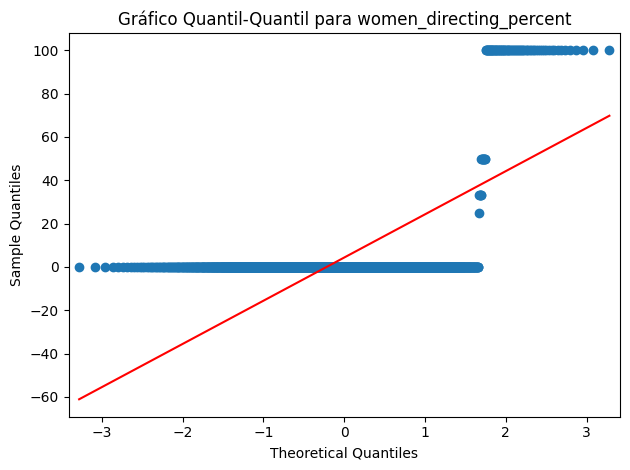

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_women_directing_percent = df_['women_directing_percent']

sm.qqplot(dados_women_directing_percent, line='s')
plt.title('Gráfico Quantil-Quantil para women_directing_percent')
plt.tight_layout()
plt.show()

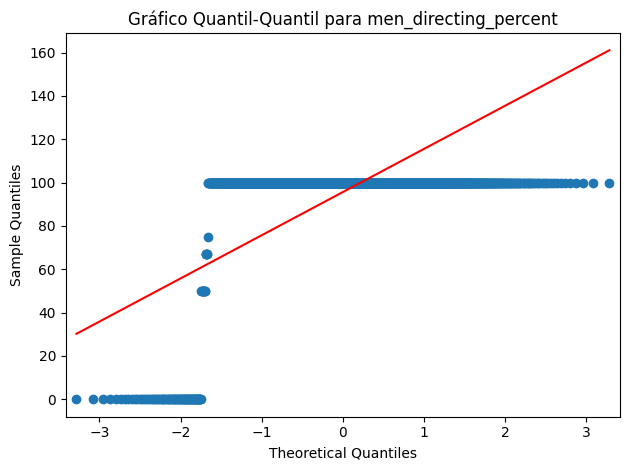

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_men_directing_percent = df_['men_directing_percent']

sm.qqplot(dados_men_directing_percent, line='s')
plt.title('Gráfico Quantil-Quantil para men_directing_percent')
plt.tight_layout()
plt.show()

**Podemos perceber aqui que ambas as curva não se aproximam da reta ao longo de sua trajetória.Assim, podemos inferir que visualmente, o atributo women_directing_percent e men_directing_percent tem uma distribuição bimodal e não uma distribuição normal.**

**Vamos confirmar agora com cálculos estatísticos**

## **Avaliação estatística - director_count e directress_count / women_directing_percent e men_directing_percent**

In [ ]:
media_director_count= df_.describe()['director_count']['mean']
mediana_director_count = df_.describe()['director_count']['50%']
moda_director_count = statistics.mode(df_['director_count'])

#Resumo para director_count
print('A média do atributo director_count é de : {}'.format(media_director_count.round(2)))
print('A mediana do atributo director_count é de : {}'.format(mediana_director_count))
print('A moda do atributo director_count é de : {}'.format(moda_director_count))

A média do atributo director_count é de : 1.06
A mediana do atributo director_count é de : 1.0
A moda do atributo director_count é de : 1


In [ ]:
media_directress_count= df_.describe()['directress_count']['mean']
mediana_directress_count = df_.describe()['directress_count']['50%']
moda_directress_count = statistics.mode(df_['directress_count'])

#Resumo para director_count
print('A média do atributo directress_count é de : {}'.format(media_directress_count.round(2)))
print('A mediana do atributo directress_count é de : {}'.format(mediana_directress_count))
print('A moda do atributo directress_count é de : {}'.format(moda_directress_count))

A média do atributo directress_count é de : 0.05
A mediana do atributo directress_count é de : 0.0
A moda do atributo directress_count é de : 0


**Como os valores de média, mediana e moda são bem próximos, constatamos que os atributos director_count e directress_count, apesar de não ter visualmente o comportamento de uma distribuição multimodal e bimodal,respectivamente, estatísticamente ambos os atributos possuem características de uma distribuição normal.**

In [ ]:
media_women_directing_percent= df_.describe()['women_directing_percent']['mean']
mediana_women_directing_percent = df_.describe()['women_directing_percent']['50%']
moda_women_directing_percent = statistics.mode(df_['women_directing_percent'])

#Resumo para director_count
print('A média do atributo women_directing_percent é de : {}'.format(media_women_directing_percent.round(2)))
print('A mediana do atributo women_directing_percent é de : {}'.format(mediana_women_directing_percent))
print('A moda do atributo women_directing_percent é de : {}'.format(moda_women_directing_percent))

A média do atributo women_directing_percent é de : 4.35
A mediana do atributo women_directing_percent é de : 0.0
A moda do atributo women_directing_percent é de : 0.0


In [ ]:
media_men_directing_percent= df_.describe()['men_directing_percent']['mean']
mediana_men_directing_percent = df_.describe()['men_directing_percent']['50%']
moda_men_directing_percentt = statistics.mode(df_['men_directing_percent'])

#Resumo para director_count
print('A média do atributo men_directing_percent é de : {}'.format(media_men_directing_percent.round(2)))
print('A mediana do atributo men_directing_percent é de : {}'.format(mediana_men_directing_percent))
print('A moda do atributo men_directing_percent é de : {}'.format(moda_men_directing_percentt))

A média do atributo men_directing_percent é de : 95.65
A mediana do atributo men_directing_percent é de : 100.0
A moda do atributo men_directing_percent é de : 100.0


**Como os valores de média, mediana e moda não são bem próximos, constatamos que os atributos women_directing_percent e men_directing_percent, terem visualmente o comportamento de uma distribuição bimodal estatísticamente ambos os atributos possuem características de uma distribuição que não é normal.**

**Com isso, vamos avaliar o boxplot destes atributos.**

## **Boxplot - director_count e directress_count / women_directing_percent e men_directing_percent**

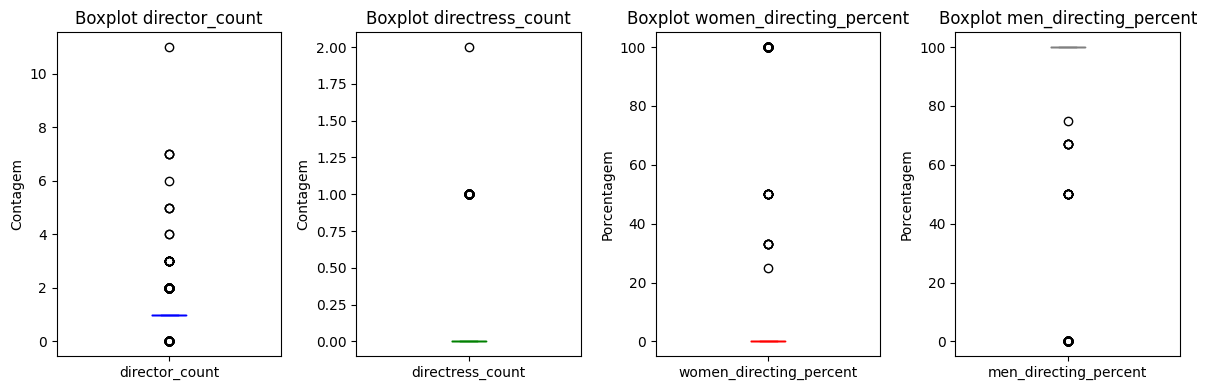

In [ ]:
# Boxplot
# criando o figure e o axes no matplotlib


fig, ax = plt.subplots(figsize = (12,4),nrows=1, ncols=4)

#plot director_count
dados_director_count.plot(kind='box', color= 'blue', sharex = False, sharey = False, ax = ax[0])
ax[0].set_title("Boxplot director_count")
ax[0].set_ylabel('Contagem')

#plot directress_count
dados_directress_count.plot(kind='box',color= 'g',sharex = False, sharey = False, ax = ax[1])
ax[1].set_title("Boxplot directress_count")
ax[1].set_ylabel('Contagem')

#plot women_directing_percent
dados_women_directing_percent.plot(kind='box',color= 'red',sharex = False, sharey = False, ax = ax[2])
ax[2].set_title("Boxplot women_directing_percent")
ax[2].set_ylabel('Porcentagem')

#plot men_directing_percent
dados_men_directing_percent.plot(kind='box',color= 'gray',sharex = False, sharey = False, ax = ax[3])
ax[3].set_title("Boxplot men_directing_percent")
ax[3].set_ylabel('Porcentagem')

plt.tight_layout()
plt.show()

**Acima, percebemos que ambos os atributos possuem outiliers, sendo que director_count é o atributo com mais valores discrepantes. Geralmente uma produção hollywoodiana possui 1 ou 2 diretores, se observarmos o boxplot de mulheres na direção, vemos justamente que quando temos uma ou duas mulheres na direção são justamente os outliers indicados pelo gráfico, o que nos indica como as mulheres são excluídas dessa posição dentro das produções, enquanto que no caso de homens na direção podemos ver a concentração maior em 1 diretor e 2 diretores como esperado, mas temos justamente outliers que comprovam novamente a discrepância gerada pela preferência de homens na posição de direção.**

## **Avaliação visual - budget e revenue / averageRating e numVotes**

**Vamos avaliar o histograma dos atributos budget e revenue.**

**Aqui percebemos que a forma do histograma de budget e revenue não se assemelha a curva de distribuição normal.**

**Vamos avaliar então o histograma de ambos junto com a distribuição normal**

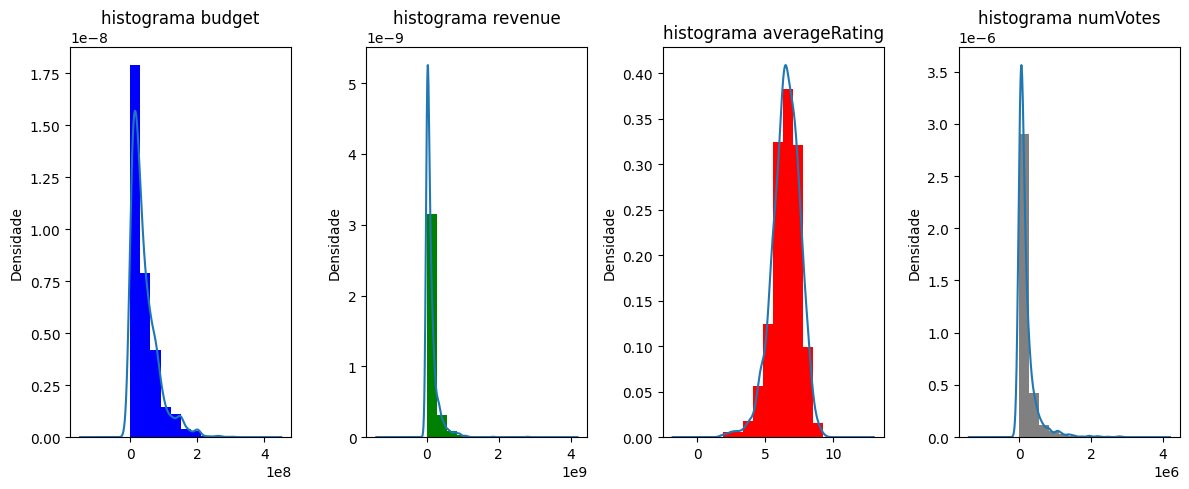

In [ ]:
# criando o figure e o axes no matplotlib

#dados to the plot
dados_budget = df_['budget']
dados_revenue = df_['revenue']
dados_averageRating = df_['averageRating']
dados_numVotes = df_['numVotes']

fig, ax = plt.subplots(figsize = (12,5),nrows=1, ncols=4)

#plot men_producing_percent
dados_budget.plot(kind='hist', density = True, color= 'blue', ax = ax[0]) # criar o histograma -> barras verticais
dados_budget.plot(kind='kde',ax = ax[0]) # criar a linha
ax[0].set_title("histograma budget")
ax[0].set_ylabel('Densidade')

#plot women_producing_percent
dados_revenue.plot(kind='hist', density = True,color= 'g', ax = ax[1]) # criar o histograma -> barras verticais
dados_revenue.plot(kind='kde',ax = ax[1]) # criar a linha
ax[1].set_title("histograma revenue")
ax[1].set_ylabel('Densidade')


#plot averageRating
dados_averageRating.plot(kind='hist', density = True,color= 'red', ax = ax[2]) # criar o histograma -> barras verticais
dados_averageRating.plot(kind='kde',ax = ax[2]) # criar a linha
ax[2].set_title("histograma averageRating")
ax[2].set_ylabel('Densidade')

#plot numVotes
dados_numVotes.plot(kind='hist', density = True,color= 'gray', ax = ax[3]) # criar o histograma -> barras verticais
dados_numVotes.plot(kind='kde',ax = ax[3]) # criar a linha
ax[3].set_title("histograma numVotes")
ax[3].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

**Aqui percebemos através do histograma e da curva de distribuição normal que o atributo budget visualmente não tem uma distribuição normal, mas sim uma distribuição multimodal. Já o atributo revenue se comporta como uma distibuição normal.**

**Aqui percebemos através do histograma e da curva de distribuição normal que o atributo numVotes visualmente não tem uma distribuição normal, mas sim uma distribuição multimodal. Já o atributo averageRating se comporta como uma distibuição normal.**

**Aqui vamos verificar também qual tipo de ditribuição pelo gráfico Quantile-Quantile plot.**

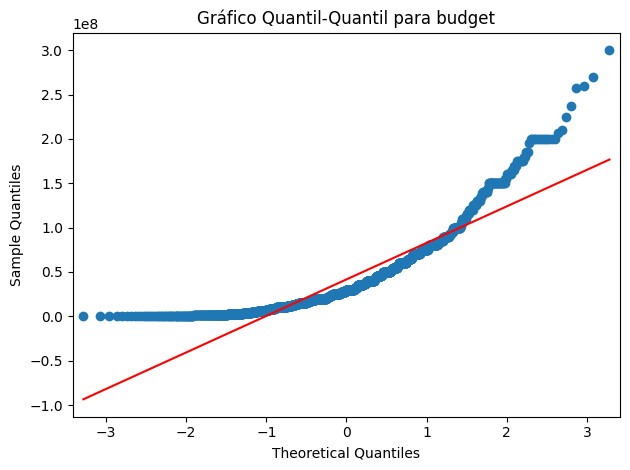

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_budget = df_['budget']

sm.qqplot(dados_normais_budget, line='s')
plt.title('Gráfico Quantil-Quantil para budget')
plt.tight_layout()
plt.show()

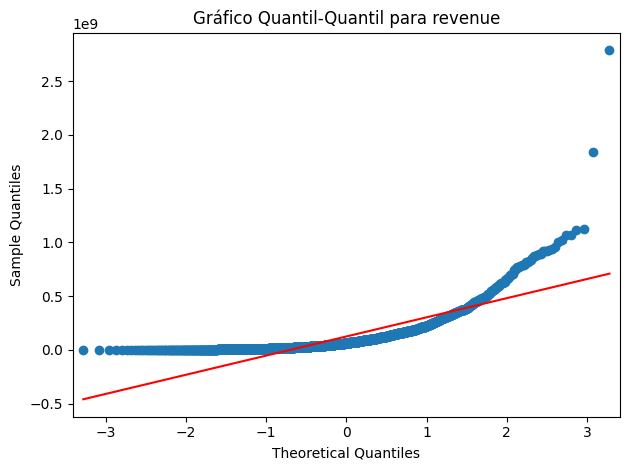

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_normais_revenue = df_['revenue']

sm.qqplot(dados_normais_revenue, line='s')
plt.title('Gráfico Quantil-Quantil para revenue')
plt.tight_layout()
plt.show()

**Podemos perceber aqui que ambas as curva não se aproximam da reta ao longo de sua trajetória. Assim, podemos inferir que visualmente, o atributo budget e revenue tem uma distribuição multimodal e unimodal.**

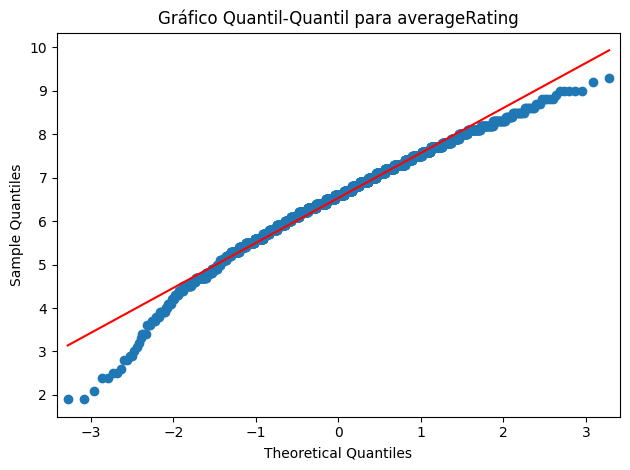

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_averageRating = df_['averageRating']

sm.qqplot(dados_averageRating, line='s')
plt.title('Gráfico Quantil-Quantil para averageRating')
plt.tight_layout()
plt.show()

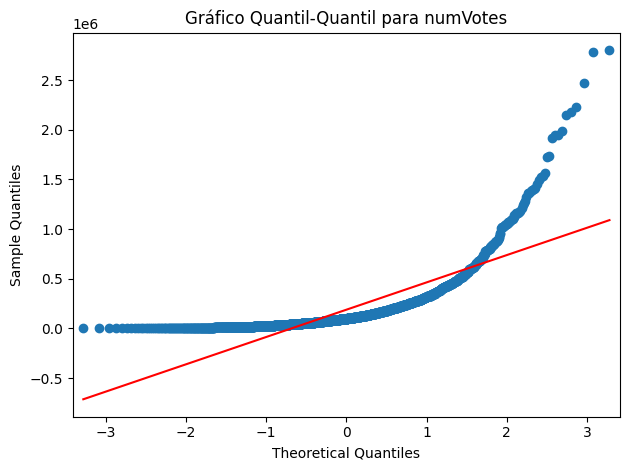

In [ ]:
#Perceba que aqui devemos importar o pacote statsmodels.api. Ele utiliza por padrão a distribuição normal.
dados_numVotes = df_['numVotes']

sm.qqplot(dados_numVotes, line='s')
plt.title('Gráfico Quantil-Quantil para numVotes')
plt.tight_layout()
plt.show()

**Podemos perceber aqui que a curva  do atributo averageRating se aproximam da reta ao longo de sua trajetória. Assim, podemos inferir que visualmente, o atributo averageRating tem uma distribuição normal.Porém para o atributo numVotes o mesmo não ocorre e com isso provavelmente o mesmo tem uma distribuição multimodal.**

**Vamos confirmar agora com cálculos estatísticos**

## **Avaliação estatística - budget e revenue**

In [ ]:
media_budget= df_.describe()['budget']['mean']
mediana_budget = df_.describe()['budget']['50%']
moda_budget = statistics.mode(df_['budget'])

#Resumo para director_count
print('A média do atributo budget é de : {}'.format(media_budget.round(2)))
print('A mediana do atributo budget é de : {}'.format(mediana_budget))
print('A moda do atributo budget é de : {}'.format(moda_budget))

A média do atributo budget é de : 41635111.65
A mediana do atributo budget é de : 30000000.0
A moda do atributo budget é de : 20000000.0


In [ ]:
media_revenue= df_.describe()['revenue']['mean']
mediana_revenue = df_.describe()['revenue']['50%']
moda_revenue = statistics.mode(df_['revenue'])

#Resumo para director_count
print('A média do atributo revenue é de : {}'.format(media_revenue.round(2)))
print('A mediana do atributo revenue é de : {}'.format(mediana_revenue))
print('A moda do atributo revenue é de : {}'.format(moda_revenue))

A média do atributo revenue é de : 124404663.71
A mediana do atributo revenue é de : 61860456.5
A moda do atributo revenue é de : 8000000.0


**Como os valores de média, mediana e moda  não são bem próximos, constatamos que os atributos budget e revenue não possuem uma distribuição normal, mas sim uma distribuição multimodal e unimodal.**

In [ ]:
media_averageRating= df_.describe()['averageRating']['mean']
mediana_averageRating = df_.describe()['averageRating']['50%']
moda_averageRating = statistics.mode(df_['averageRating'])

#Resumo para director_count
print('A média do atributo averageRating é de : {}'.format(media_averageRating.round(2)))
print('A mediana do atributo averageRating é de : {}'.format(mediana_averageRating))
print('A moda do atributo averageRating é de : {}'.format(moda_averageRating))

A média do atributo averageRating é de : 6.54
A mediana do atributo averageRating é de : 6.6
A moda do atributo averageRating é de : 6.4


In [ ]:
media_numVotes = df_.describe()['numVotes']['mean']
mediana_numVotes = df_.describe()['numVotes']['50%']
moda_numVotes = statistics.mode(df_['numVotes'])

#Resumo para director_count
print('A média do atributo numVotes é de : {}'.format(media_numVotes.round(2)))
print('A mediana do atributo numVotes é de : {}'.format(mediana_numVotes))
print('A moda do atributo numVotes é de : {}'.format(moda_numVotes))

A média do atributo numVotes é de : 188841.07
A mediana do atributo numVotes é de : 98648.0
A moda do atributo numVotes é de : 6664


**Como os valores de média, mediana e moda são bem próximos, constatamos que o atributo averageRating possue uma distribuição normal, diferente do atributo numVotes, que possui uma distribuição multimodal.**

**Com isso, vamos avaliar o boxplot destes atributos.**

## **Boxplot - budget e revenue**

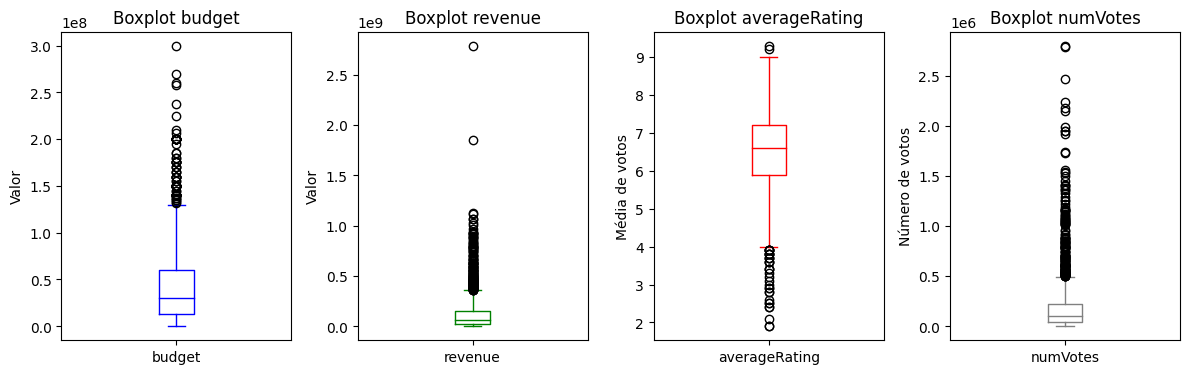

In [ ]:
# Boxplot
# criando o figure e o axes no matplotlib

#dados_revenue = df_[(df_.revenue > 0) & (df_.revenue < 0.5*1e9)]
dados_revenue = df_['revenue']

fig, ax = plt.subplots(figsize = (12,4),nrows=1, ncols=4)

#plot director_count
dados_budget.plot(kind='box', color= 'blue', sharex = False, sharey = False, ax = ax[0])
ax[0].set_title("Boxplot budget")
ax[0].set_ylabel('Valor')

#plot directress_count
dados_revenue.plot(kind='box',color= 'g',sharex = False, sharey = False, ax = ax[1])
ax[1].set_title("Boxplot revenue")
ax[1].set_ylabel('Valor')


#plot averageRating
dados_averageRating.plot(kind='box',color= 'red',sharex = False, sharey = False, ax = ax[2])
ax[2].set_title("Boxplot averageRating")
ax[2].set_ylabel('Média de votos')


#plot numVotes
dados_numVotes.plot(kind='box',color= 'gray',sharex = False, sharey = False, ax = ax[3])
ax[3].set_title("Boxplot numVotes")
ax[3].set_ylabel('Número de votos')

plt.tight_layout()
plt.show()



**Acima, percebemos que todos os atributos avaliados possuem grande número de outliers. Percebemos o aumento do orçamento em relação a receita e uma aproximação da mediana em relação a Q1 quanto a receita indicando que pelo menos a metade desses dados está bem próxima de um valor mais baixo. A média de votos com máxima de 9 e o número de votos de máxima 0,5 milhão o que mostra grande participação do público nos filmes da base avaliada.**

## **Resumo da análise de distribuição**

**Aqui iremos fazer um breve resumo diante das avaliações visuais e estatísticas analisadas por atributo.**

**Temos a seguir a definição da distribuição diante das análises.**

**De acordo com a distribuição, iremos utilizar ao longo da análise:**

* Média : Distribuição normal
* Mediana : Distribuição bimodal ou multimodal

**A escolha do uso da mediana nas distribuições bimodais e multimodais se deve ao fato dessa medida não variar tanto em relação aos outilers.**



## **actors_count e actresses_count / actors_percent e actress_percent**


**Avaliação visual**

* actors_count : distribuição normal
* actresses_count: distribuição normal
* actors_percent: distribuição normal
* actress_percent: distribuição normal

**Avaliação estatística**

* actors_count : distribuição normal
* actresses_count: distribuição normal
* actors_percent: distribuição normal
* actress_percent: distribuição normal

**Diante das duas avaliações, podemos adotar para o trabalho que os atributos actors_count, actresses_count, actors_percent e actress_percent seguem a distribuição normal.**


## **producer_count_male e producer_count_female / women_producing_percent e men_producing_percent**

**Avaliação visual**

* producer_count_male : distribuição normal
* producer_count_female : distribuição Multimodal
* men_producing_percent: distribuição bimodal
* women_producing_percent : distribuição bimodal

**Avaliação estatística**

* producer_count_male : distribuição normal
* producer_count_female : distribuição normal
* men_producing_percent : distribuição bimodal
* women_producing_percent : distribuição bimodal

**Diante das duas avaliações, podemos adotar para o trabalho que os atributos producer_count_male e producer_count_female seguem a distribuição normal.**

**Já os atributos men_producing_percent e women_producing_percent seguem uma distribuição bimodal.**

## **director_count e directress_count / women_directing_percent e men_directing_percent**

**Avaliação visual**

* director_count : distribuição multimodal
* directress_count: distribuição bimodal
* women_directing_percent: distribuição bimodal
* men_directing_percent : distribuição bimodal

**Avaliação estatística**

* director_count : distribuição normal
* directress_count : distribuição normal
* women_directing_percent : distribuição bimodal
* men_directing_percent : distribuição bimodal

**Diante das duas avaliações, podemos adotar para o trabalho que os atributos director_count e directress_count seguem a distribuição normal.**
**Já os atributos men_producing_percent e women_producing_percent seguem uma distribuição bimodal.**

## **budget e revenue / averageRating e numVotes**

**Avaliação visual**

* budget : distribuição multimodal
* revenue : distribuição unimodal diferente da normal
* averageRating : distribuição normal
* numVotes : distribuição multimodal

**Avaliação estatística**

* budget : distribuição multimodal
* revenue : distribuição unimodal diferente da normal
* averageRating : distribuição normal
* numVotes : distribuição multimodal

**Diante das duas avaliações, podemos adotar para o trabalho que os atributos averageRating segue a distribuição normal.**


**Já os atributos budget, numVotes e revenue seguem uma distribuição Multimodal e unimodal.**

**Vamos analisar agora a receita quanto a atrizes e atores**

In [ ]:
#receita em comparação com porcentagem de atrizes e atores
df_.groupby('revenue')[['actress_percent','actors_percent']].mean().sort_values('revenue', ascending=False)

actress_percent  actors_percent
revenue                                          
2,787,965,087.00            26.00           74.00
1,845,034,188.00            24.00           76.00
1,123,746,996.00            16.00           84.00
1,118,888,979.00            33.00           67.00
1,066,969,703.00            38.00           62.00
...                           ...             ...
20,380.00                   54.00           46.00
14,873.00                   10.00           90.00
10,018.00                   58.00           42.00
25.00                       40.00           60.00
13.00                       24.00           76.00

[1901 rows x 2 columns]

In [ ]:
#receita em comparação com a contagem de atrizes e atores
df_.groupby('revenue')[['actresses_count','actors_count']].mean().sort_values('revenue', ascending=False)

actresses_count  actors_count
revenue                                        
2,787,965,087.00            23.00         65.00
1,845,034,188.00            35.00        108.00
1,123,746,996.00            29.00        158.00
1,118,888,979.00             1.00          2.00
1,066,969,703.00            22.00         36.00
...                           ...           ...
20,380.00                   14.00         12.00
14,873.00                    3.00         26.00
10,018.00                    7.00          5.00
25.00                        8.00         12.00
13.00                       24.00         78.00

[1901 rows x 2 columns]

In [ ]:
#receita em comparação com a porcentagem de atrizes
df_.groupby('revenue')['actress_percent'].mean().sort_values(ascending=False)

revenue
50,007,546.00    100.00
374,111,707.00    79.00
27,000,000.00     78.00
36,351,350.00     70.00
3,076,820.00      70.00
                  ...  
11,744,471.00      0.00
212,011,111.00     0.00
46,243,000.00      0.00
1,000,000.00       0.00
1,431,623.00       0.00
Name: actress_percent, Length: 1901, dtype: float64

In [ ]:
#receita em comparação com a contagem de atrizes
df_.groupby('revenue')['actresses_count'].mean().sort_values(ascending=False)

revenue
33,828,318.00    135.00
46,118,097.00    118.00
38,058,335.00    108.00
340,487,652.00   105.00
149,270,999.00    98.00
                  ...  
1,000,000.00       0.00
1,431,623.00       0.00
1,750,211.00       0.00
32,287,044.00      0.00
212,011,111.00     0.00
Name: actresses_count, Length: 1901, dtype: float64

**Novamente vemos uma tendência de favorecimento de valores mais expressivos de receita em relação a porcentagem masculina, evidenciando o viés presente nos dados que indica maior preferência pela presença masculina nas produções.**

# **Avaliação da dispersão**

**Vamos analisar agora quanto a dispersão**

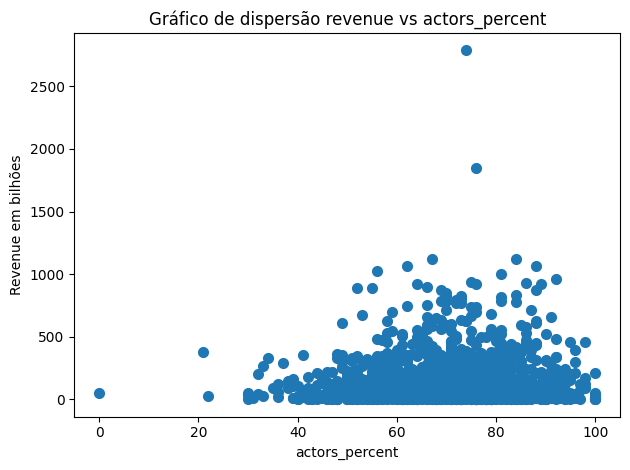

In [ ]:
#Gráfico de dispersão revenue vs actors_percent

# make data
x = df_['actors_percent']
y = df_['revenue']/1e6

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, linewidth=2.0)
plt.title("Gráfico de dispersão revenue vs actors_percent")
plt.xlabel("actors_percent")
plt.ylabel("Revenue em bilhões")
plt.tight_layout()
plt.show()

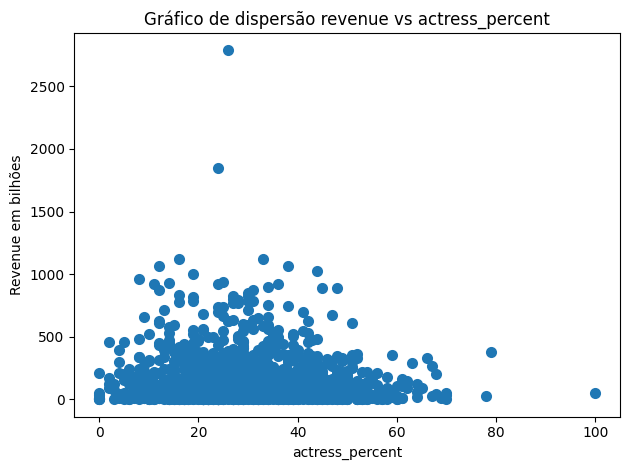

In [ ]:
#Gráfico de dispersão revenue vs actress_percent

# make data
x = df_['actress_percent']
y = df_['revenue']/1e6

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, linewidth=2.0)
plt.title("Gráfico de dispersão revenue vs actress_percent")
plt.xlabel("actress_percent")
plt.ylabel("Revenue em bilhões")
plt.tight_layout()
plt.show()

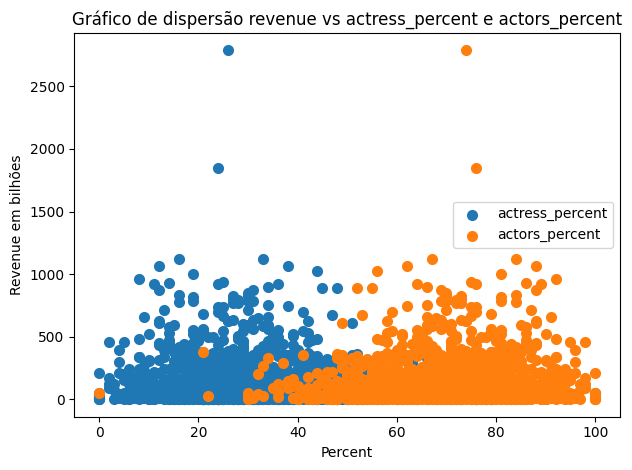

In [ ]:
#Gráfico de dispersão revenue vs actress_percent e actors_percent

# make data
x1 = df_['actress_percent']
x2 = df_['actors_percent']
y = df_['revenue']/1e6

# plot
fig, ax = plt.subplots()

ax.scatter(x1, y, linewidth=2.0)
ax.scatter(x2, y, linewidth=2.0)
ax.legend(('actress_percent', 'actors_percent'))
plt.title("Gráfico de dispersão revenue vs actress_percent e actors_percent")
plt.xlabel("Percent")
plt.ylabel("Revenue em bilhões")
plt.tight_layout()

plt.show()

**Percebemos aqui que o percentual de atrizes e atores em relação a receita, possuem um comportamento espelhado, o que é esperado pois fazem parte de um mesmo conjunto, este sendo o elenco do filme. É necessário cuidado ao analisar comportamentos como o apresentado no gráfico acima pois podem levar a falsas conclusões, como por exemplo inferir que quanto mais homens maior a receita, e mulheres apenas aparecem com receitas maiores pois estão presentes nos mesmos filmes com a maior participação masculina. No entanto, como vimos anteriormente, o fator de participação por gênero social, não possui impacto relevante na receita de um filme, o que reforça o viés sexista presente na indústria de Hollywood.**

# **Avaliação do comportamento da receita**

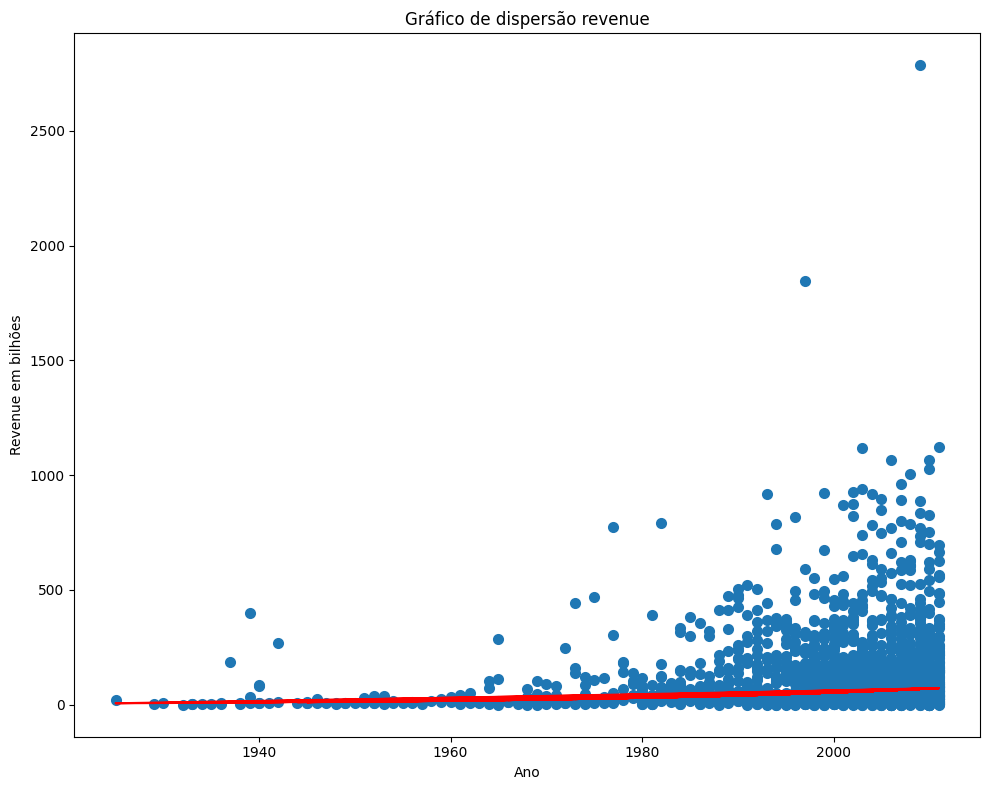

In [ ]:
#Gráfico de dispersão revenue vs actress_percent e actors_percent

# make data for scatter plot
x1 = df_.year
y = df_['revenue']/1e6


# make data for exponential function
x_data = np.array(df_.year)
y_data = np.array(df_['revenue']/1e6)
ylog_data = np.log(y_data)
curve_fit = np.polyfit(x_data, ylog_data, 1)
y1 = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x_data)


# plot
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(x1, y, linewidth=2.0)
#ax.scatter(x_data, y_data)
#ax.scatter(x_data,y1,color="red")
plt.plot(x_data,y1,color="red")
plt.title("Gráfico de dispersão revenue")
plt.xlabel("Ano")
plt.ylabel("Revenue em bilhões")
plt.tight_layout()

plt.show()

**Aqui percebemos que revenue possui um comportamento exponencial em relação ao ano**

**Vamos analisar aqui a avaliação de filmes com maior participação de atrizes:**

In [ ]:
media_avaliacao_maior_atrizes = df_[df_.actress_percent > df_.actors_percent].averageRating.mean()
media_avaliacao_maior_atores = df_[df_.actress_percent < df_.actors_percent].averageRating.mean()
print('Média de avaliação de filmes com maior participação de atrizes: {}'.format(media_avaliacao_maior_atrizes.round(2)))
print('Média de avaliação de filmes com maior participação de atores: {}'.format(media_avaliacao_maior_atores.round(2)))

Média de avaliação de filmes com maior participação de atrizes: 6.42
Média de avaliação de filmes com maior participação de atores: 6.55


**Ambas as médias são bem próximas, indicando que por mais que haja mais homens ou mais mulheres atuando nos filmes isso não produz uma grande diferença em relação a votação do público.**

**Vamos analisar agora a proporção de filmes:**

In [ ]:
participacao_maior_atrizes = df_[df_.actress_percent > df_.actors_percent]
participacao_maior_atores = df_[df_.actress_percent < df_.actors_percent]

taxa_participacao_maior_atrizes = (len(participacao_maior_atrizes)/len(df_))*100
taxa_participacao_maior_atores = len(participacao_maior_atores)/len(df_)*100

print('Proporção de filmes cuja a taxa de mulheres atuando é maior que a de homens: {}'.format(taxa_participacao_maior_atrizes))
print('Proporção de filmes cuja a taxa de homens atuando é maior que a de mulheres: {}'.format(taxa_participacao_maior_atores))

Proporção de filmes cuja a taxa de mulheres atuando é maior que a de homens: 5.458290422245108
Proporção de filmes cuja a taxa de homens atuando é maior que a de mulheres: 93.40885684860967


In [ ]:
igual = - taxa_participacao_maior_atrizes - taxa_participacao_maior_atores + 100

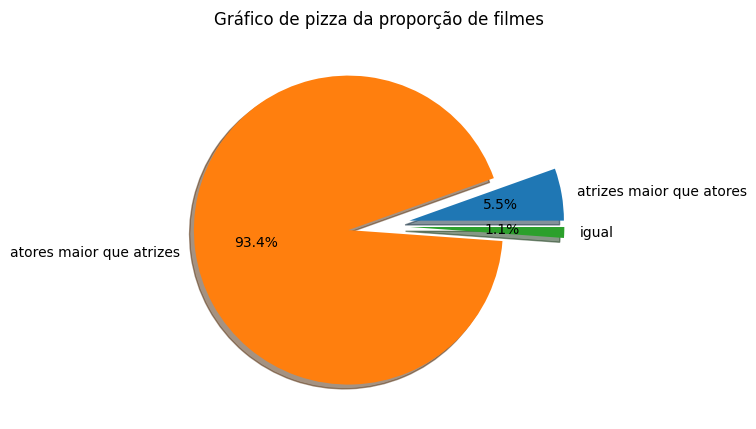

In [ ]:
#gráfico de pizza da proporção de filmes
valor = [ taxa_participacao_maior_atrizes,taxa_participacao_maior_atores, igual]
#valor = [zeros_budget,len(df_tmdb_movies['budget'])]
label = ['atrizes maior que atores','atores maior que atrizes', 'igual']
explode = (0.2, 0.2, 0.2)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Gráfico de pizza da proporção de filmes')
plt.tight_layout()
plt.show()

**Ao comparar a mediana da receita dos filmes em que a taxa de participação de mulheres e de homens atuando em filmes, é favorável para o grupo em que a taxa de homens é maior, pois a amostra é bem maior.**

**Vamos avaliar em relação a receita em relação a participação de atrizes e atores**

In [ ]:
#taxa de atrizes com maior participação do que atores em relação a receita - o quanto elas produzem de receita
taxa_atrizes_maior_media = abs(((participacao_maior_atrizes.revenue.mean() - participacao_maior_atores.revenue.mean())/participacao_maior_atrizes.revenue.mean()) * 100)
taxa_atrizes_maior_mediana = abs(((participacao_maior_atrizes.revenue.median() - participacao_maior_atores.revenue.median())/participacao_maior_atrizes.revenue.median()) * 100)

print('taxa pela média: {}'.format(taxa_atrizes_maior_media))
print('taxa pela mediana: {}'.format(taxa_atrizes_maior_mediana))


taxa pela média: 44.06788922511268
taxa pela mediana: 51.9154289383731


**Como revenue não possui distribuição normal usaremos a taxa pela mediana**

In [ ]:
#taxa de atores com maior participação do que atrizes em relação a receita
taxa_atores_maior_mediana = abs(((participacao_maior_atores.revenue.median() - participacao_maior_atrizes.revenue.median())/participacao_maior_atores.revenue.median()) * 100)
taxa_igual = -taxa_atrizes_maior_mediana - taxa_atores_maior_mediana + 100

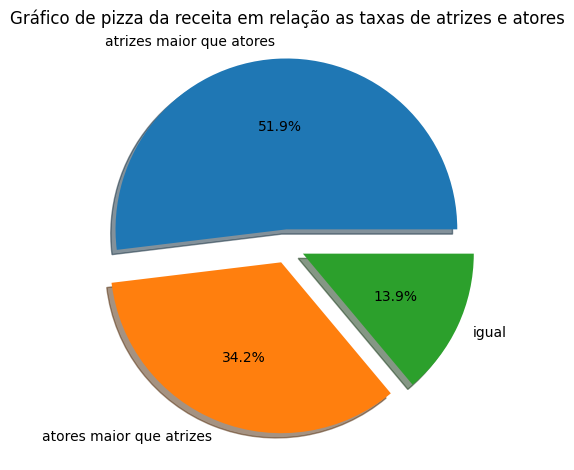

In [ ]:
#gráfico de pizza da proporção de filmes
valor = [ taxa_atrizes_maior_mediana,taxa_atores_maior_mediana, taxa_igual]
#valor = [zeros_budget,len(df_tmdb_movies['budget'])]
label = ['atrizes maior que atores','atores maior que atrizes', 'igual']
explode = (0.1, 0.1, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Gráfico de pizza da receita em relação as taxas de atrizes e atores')
plt.tight_layout()
plt.show()



 **No entando é curioso o quão expressiva é a receita para um grupo consideravelmente menor, cerca de 5% das amostras onde as atrizes estão em maior quantidade, capaz de fazer um valor de receita referente maior do que o valor de receita onde os atores estão em maior quantidade.**

 **O que nos dá um indício do que a hipótese de que isso está somente relacionado com questões sociais do que de fato a qualidade e poder de retorno financeiro dos filmes com maior porcentagem de mulheres.**

**Vamos analisar agora o quanto as mulheres fazem de receita em relação ao o quanto os homens fazem de receita**

In [ ]:
receita_produzida_atrizes = (participacao_maior_atrizes.revenue.median()/participacao_maior_atores.revenue.median())*100

In [ ]:
receita_produzida_atores = (participacao_maior_atores.revenue.median()/participacao_maior_atrizes.revenue.median())*100

In [ ]:
receita_produzida_atores

151.9154289383731

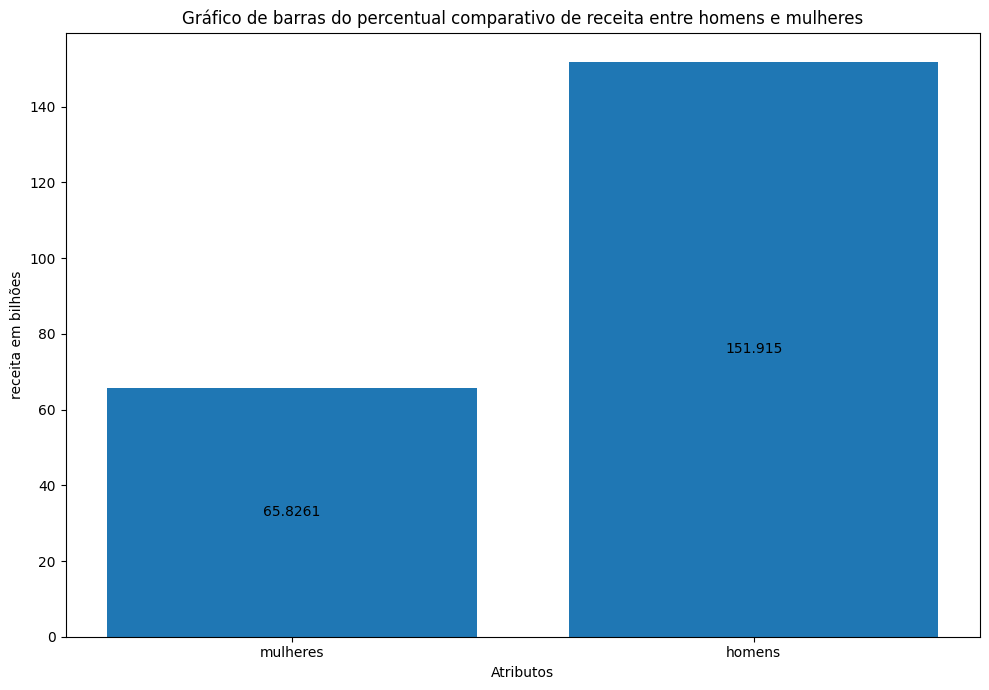

In [ ]:
# x and y data to compare
y =  (receita_produzida_atrizes, receita_produzida_atores)
x = ('mulheres', 'homens')


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.bar(x, y)
# add the x and y label
ax.set_xlabel('Atributos')
ax.set_ylabel('receita em bilhões')
# melhorando a visualização
#ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'black')
# title
plt.title('Gráfico de barras do percentual comparativo de receita entre homens e mulheres')
plt.tight_layout()
plt.show()

**Podemos notar que mesmo em quantidade consideravelmente menor que a parcela de homens, as mulheres, quando comparadas com o quanto os homens produzem, consegue gerar em valores proporcionais de receita, a mais da metade do que a parcela masculina produz.**

**Vamos investigar em relação aos produtores e produtoras**

In [ ]:
proporcao_produtoras_maior = df_[df_.women_producing_percent > df_.men_producing_percent]
proporcao_produtores_maior = df_[df_.women_producing_percent < df_.men_producing_percent]

**Como os atributos possuem uma distribuição bimodal, utilizamos a mediana como operação.**

In [ ]:
#porcentagem de atrizes atuando dado que a porcentagem de produtoras é maior
porcentagem_mulheres_atuando_dado_produtora =  proporcao_produtoras_maior.actress_percent.median()
##porcentagem de aotres atuando dado que a porcentagem de produtoras é maior
porcentagem_homens_atuando_dado_produtora =  proporcao_produtoras_maior.actors_percent.median()


#porcentagem de atrizes atuando dado que a porcentagem de produtores é maior
porcentagem_mulheres_atuando_dado_produtor =  proporcao_produtores_maior.actress_percent.mean()
#porcentagem de atores atuando dado que a porcentagem de produtores é maior
porcentagem_homens_atuando_dado_produtor =  proporcao_produtores_maior.actors_percent.mean()

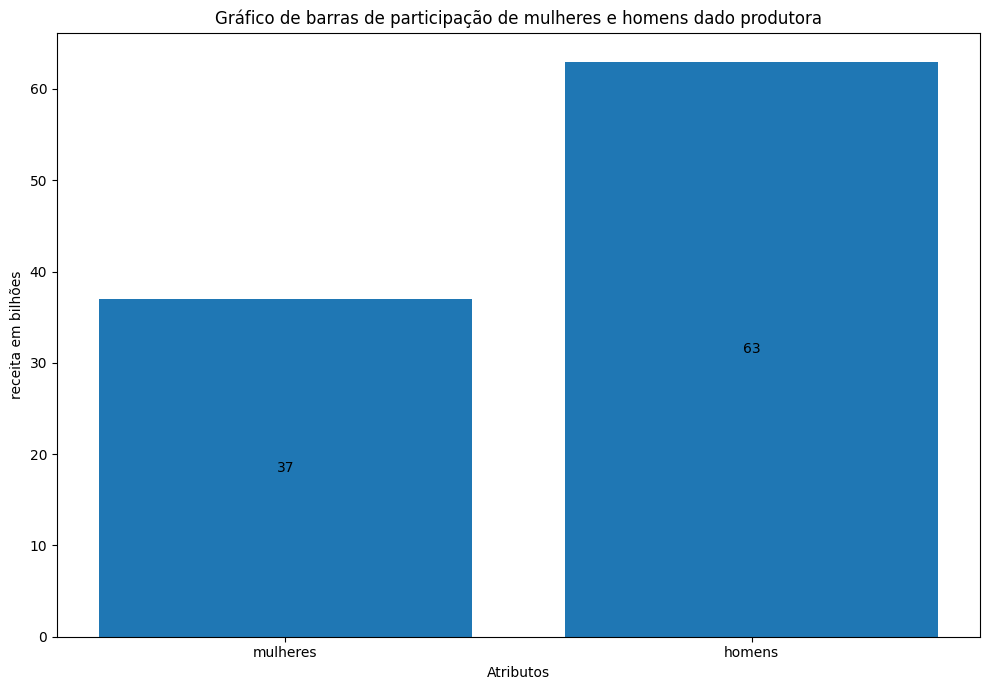

In [ ]:
# x and y data to compare
y =  (porcentagem_mulheres_atuando_dado_produtora, porcentagem_homens_atuando_dado_produtora)
x = ('mulheres', 'homens')


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.bar(x, y)
# add the x and y label
ax.set_xlabel('Atributos')
ax.set_ylabel('receita em bilhões')
# melhorando a visualização
#ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'black')
# title
plt.title('Gráfico de barras de participação de mulheres e homens dado produtora')
plt.tight_layout()
plt.show()

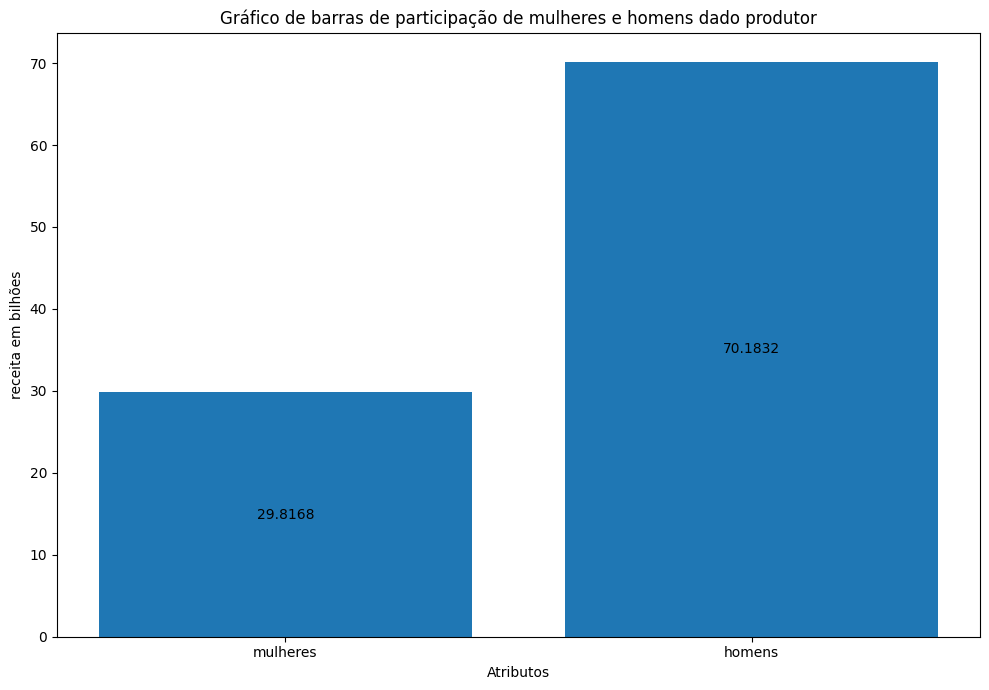

In [ ]:
# x and y data to compare
y =  (porcentagem_mulheres_atuando_dado_produtor, porcentagem_homens_atuando_dado_produtor)
x = ('mulheres', 'homens')


fig, ax = plt.subplots(figsize = (10,7))

#plot the bar graph
x_bar = ax.bar(x, y)
# add the x and y label
ax.set_xlabel('Atributos')
ax.set_ylabel('receita em bilhões')
# melhorando a visualização
#ax.tick_params(axis='x', labelrotation = 90)

# insert data labels to the columns
ax.bar_label(x_bar, label_type= 'center', color = 'black')
# title
plt.title('Gráfico de barras de participação de mulheres e homens dado produtor')
plt.tight_layout()
plt.show()

**Apesar de ainda ser possível notar o viés de dar preferência a maior participação masculina no elenco do filme, podemos perceber que quando temos mulheres na produção, existe uma tendência de maior participação de mulheres quando comparamos no caso de ter homens na produção.**

# **Pré-processamento de dados**

**Após analisar as variáveis, é possível notar que somente olhando para a receita, não necessariamente responde a nossa hipótese, quanto a viabilidade de investir em maior participação de mulheres nas produções holywoodianas, uma vez que não é possível a priori, avaliar pela receita, se um filme é rentável ou não. Portanto, é interessante conseguir separar as produções presentes no dataset entre aquelas que são rentáveis e as não rentáveis, e avaliar se a premissa de que existem produções rentáveis com participação maior de mulheres é verdadeira.**

**Não existe um consenso quanto uma definição de uma regra para classificar se um filme foi ao menos capaz de gerar lucro. Muitos fatores podem ser levados em consideração para se projetar o sucesso de arrecadação de uma produção. Alguns estúdios consideram o fim de semana de abertura definitivo para que um filme se mostre capaz de ao menos pagar os custos de produção e divulgação. No entanto os estúdios também precisam dividir suas arrecadações com as salas de cinema, que negociam acordos distintos a depender do estúdio ou filme sendo exibido na sala. https://gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305**

**Tendo em vista em vista essa característica que envolve diversos fatores, foi decidido deixar essa responsabilidade em separar as produções do dataset em rentáveis e não rentáveis para um algoritmo de clusterização, o Kmeans, utilizando a receita como variável para realizar essa clusterização.**

**No entando, avaliar as produções sem levar em consideração a relação entre a receita dificulta uma análise mais clara e precisa, pois sem essa informação será mais desafiador entender de fato o quanto o filme rendeu a mais comparado com o que foi investido.**

**Assim, criaremos uma variável que representa a relação receita/orçamento.**

In [ ]:
df_['revenue_budget'] = df_['revenue'] / df_['budget']

In [ ]:
columns_to_use = ['revenue_budget']
x = df_[columns_to_use].values

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x)
x = transformer.transform(x)


kmeans = KMeans(n_clusters=2,
                    random_state=42,
                    algorithm='elkan')
kmeans.fit(x)
df_['class'] = kmeans.labels_

#Garantindo apenas por vias didáticas que o valor 1 represena a a classe rentável e o valor 0 a classe não rentável
classe_rentavel = df_[df_['class'] == 1].revenue.max()
classe_nao_rentavel = df_[df_['class'] == 0].revenue.max()

if classe_rentavel < classe_nao_rentavel:
    df_['class'] = np.where(df_['class'] == 1, 0, 1)


**Avaliando a separação das classes**

<Axes: title={'center': 'revenue'}, xlabel='[class]'>

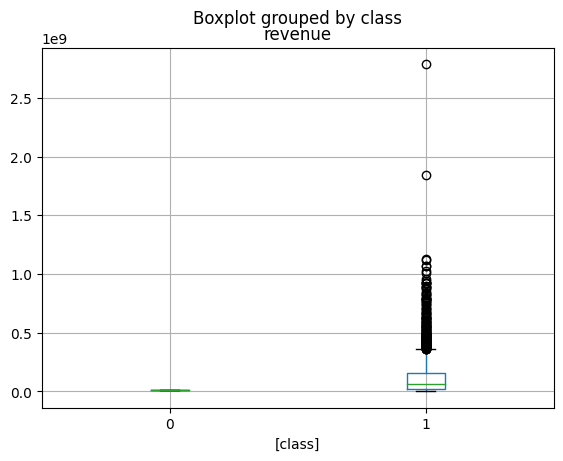

In [ ]:
df_[['class', 'revenue']].boxplot(by='class')

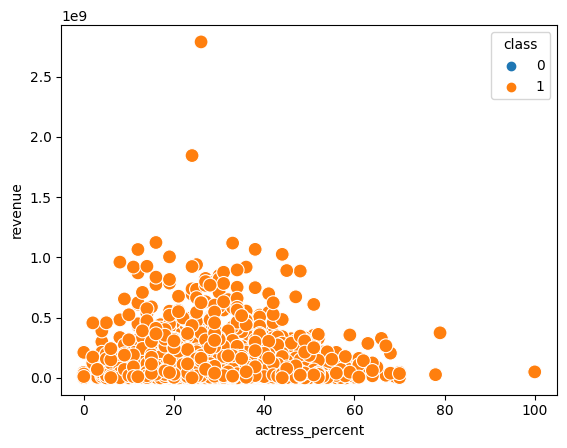

In [ ]:
sns.scatterplot(x="actress_percent", y="revenue",s=100,hue='class', data=df_)
plt.show()

**Podemos observar que o k-means provavelmente não conseguiu separar de forma satisfatória os filmes presentes na base de dados. Apesar de ser possível observar pelo boxplot de revenue a separação desde valores mais altos, estão todos presentes na classe 1 e os valores mais baixos estão concentrados na classe 0. Essa suspeita pode ser levantada uma vez que podem existir filmes não rentáveis na base e não é possível perceber a presença desse grupo no gráfico de dispersão.**

**A seguir desejamos verificar a proporção das classes no dataset.**

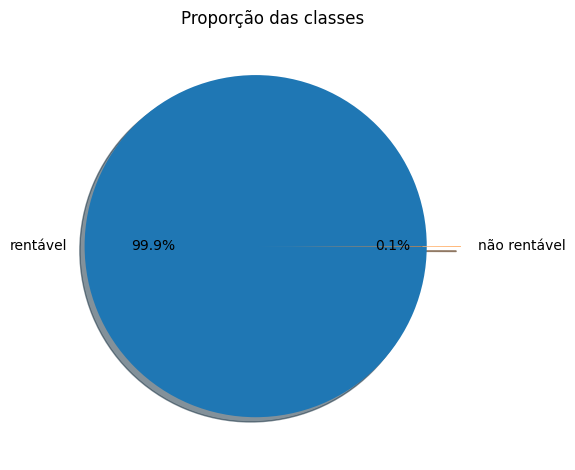

In [ ]:
#gráfico de pizza da proporção de classes
classe_rentavel = len(df_[df_['class'] == 1])/len(df_)*100
classe_nao_rentavel = len(df_[df_['class'] == 0])/len(df_)*100
valor = [classe_rentavel, classe_nao_rentavel]
label = ['rentável','não rentável']
explode = (0.1, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Proporção das classes')
plt.tight_layout()
plt.show()

**Ao analisar o gráfico acima, percebemos a premissa esperada se confirma. No entanto, existe a possibilidade de filmes não rentáveis estarem sendo classificados como rentáveis, uma vez que menos de 1% dos filmes foram classificados como não rentáveis.**

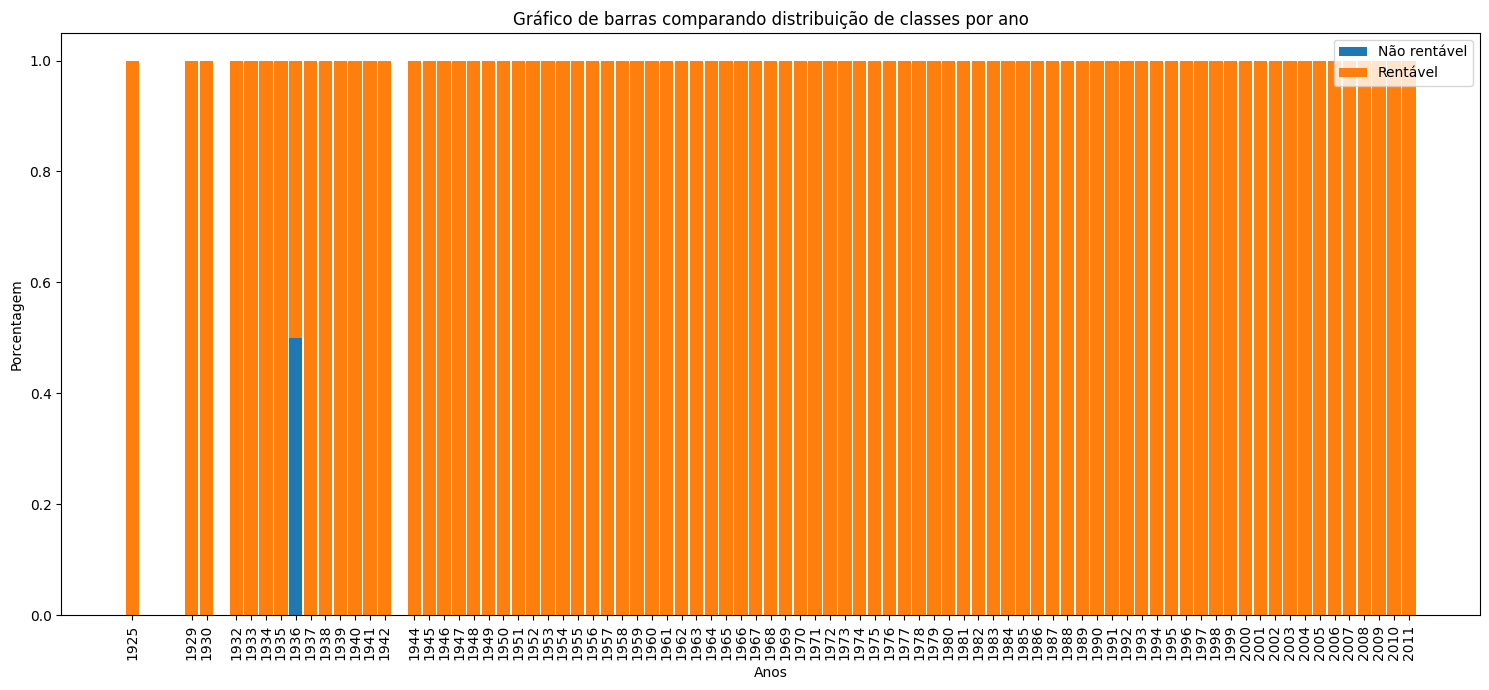

In [ ]:
x = ()
y = ()
tags = ()
anos = df_.year.sort_values().unique()
for year in anos:
    df_ano = df_[df_.year == year]
    x = x + (len(df_ano[df_ano['class'] == 0]) / len(df_ano),)
    y = y + (len(df_ano[df_ano['class'] == 1]) / len(df_ano),)
    tags += (year,)

n = len(x)
x_location = anos
bar_width = 0.9

fig, ax = plt.subplots(figsize = (15,7))


#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Não rentável')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Rentável')
# add the legend
ax.legend(('Não rentável', 'Rentável'), loc = 'upper right')
# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Anos')
# add the x axis labels
ax.set_xticks(x_location, labels = tags, rotation=90)
ax.set_xticklabels(tags)
# insert data labels to the columns
# ax.bar_label(x_bar, label_type= 'center', color = 'white')
# ax.bar_label(y_bar, label_type= 'center', color = 'white')
# title
plt.title('Gráfico de barras comparando distribuição de classes por ano')
plt.tight_layout()
plt.show()

**Analisando anualmente a distribuição das classes, percebemos que os 0.1% não rentáveis se encontram no ano de 1936, vamos verificar os dados presentes nesse ano.**

In [ ]:
df_[(df_.year == 1936)][['title', 'year', 'budget', 'revenue', 'revenue_budget', 'class']].sort_values(by='revenue', ascending=False)

title  year       budget      revenue  \
454                     modern_times  1936         1.00 8,500,000.00   
453  the_charge_of_the_light_brigade  1936 1,200,000.00 2,736,000.00   

     revenue_budget  class  
454    8,500,000.00      0  
453            2.28      1

**É possível notar uma discrepância nesse ano, indicando um orçamento que não faz muito sentido, pois um filme feito com apenas 1 dólar pode ser considerado um erro na base que não foi identificado anteriormente. Segundo o site https://www.the-numbers.com/movie/Modern-Times#tab=summary, o filme Modern Times possui um orçamento de $ 1.5 milhões de dólares. partindo desta informação, podemos realizar a correção e realizar uma nova análise.**

In [ ]:
columns_to_use = ['revenue_budget']
df_.loc[(df_['title'] == 'modern_times') & (df_.year == 1936), 'budget'] = 1500000
df_['revenue_budget'] = df_['revenue'] / df_['budget']
x = df_[columns_to_use].values

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x)
x = transformer.transform(x)


kmeans = KMeans(n_clusters=2,
                    random_state=42,
                    algorithm='elkan')
kmeans.fit(x)
df_['class'] = kmeans.labels_

#Garantindo apenas por vias didáticas que o valor 1 represena a a classe rentável e o valor 0 a classe não rentável

classe_rentavel = df_[df_['class'] == 1].revenue.max()
classe_nao_rentavel = df_[df_['class'] == 0].revenue.max()

if classe_rentavel < classe_nao_rentavel:
    df_['class'] = np.where(df_['class'] == 1, 0, 1)


<Axes: title={'center': 'revenue'}, xlabel='[class]'>

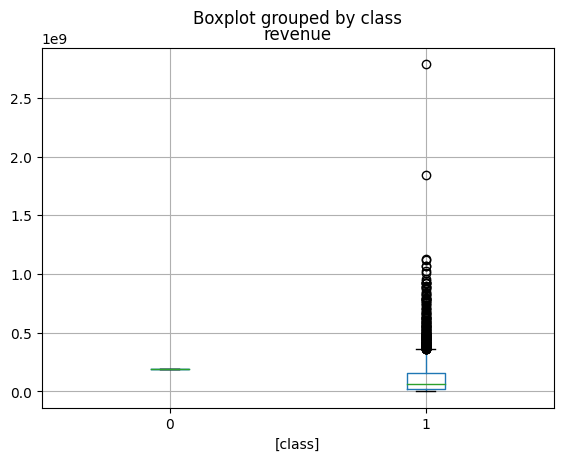

In [ ]:
df_[['class', 'revenue']].boxplot(by='class')

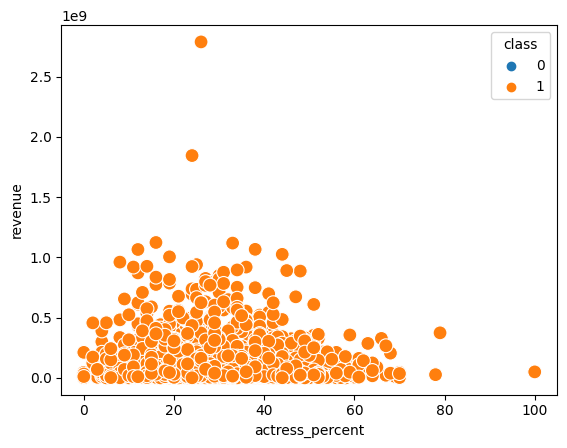

In [ ]:
sns.scatterplot(x="actress_percent", y="revenue",s=100,hue='class', data=df_)
plt.show()

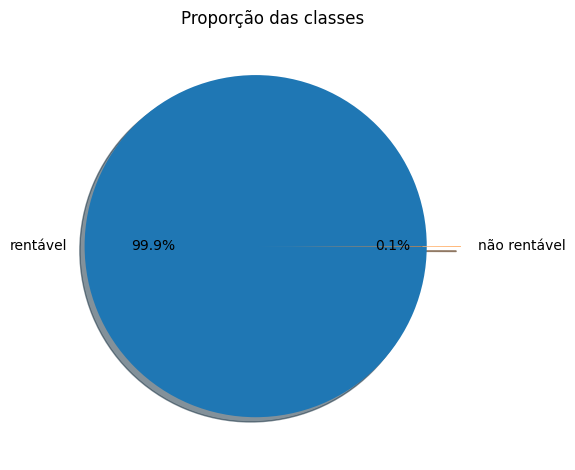

In [ ]:
#gráfico de pizza da proporção de classes
classe_rentavel = len(df_[df_['class'] == 1])/len(df_)*100
classe_nao_rentavel = len(df_[df_['class'] == 0])/len(df_)*100
valor = [classe_rentavel, classe_nao_rentavel]
label = ['rentável','não rentável']
explode = (0.1, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Proporção das classes')
plt.tight_layout()
plt.show()

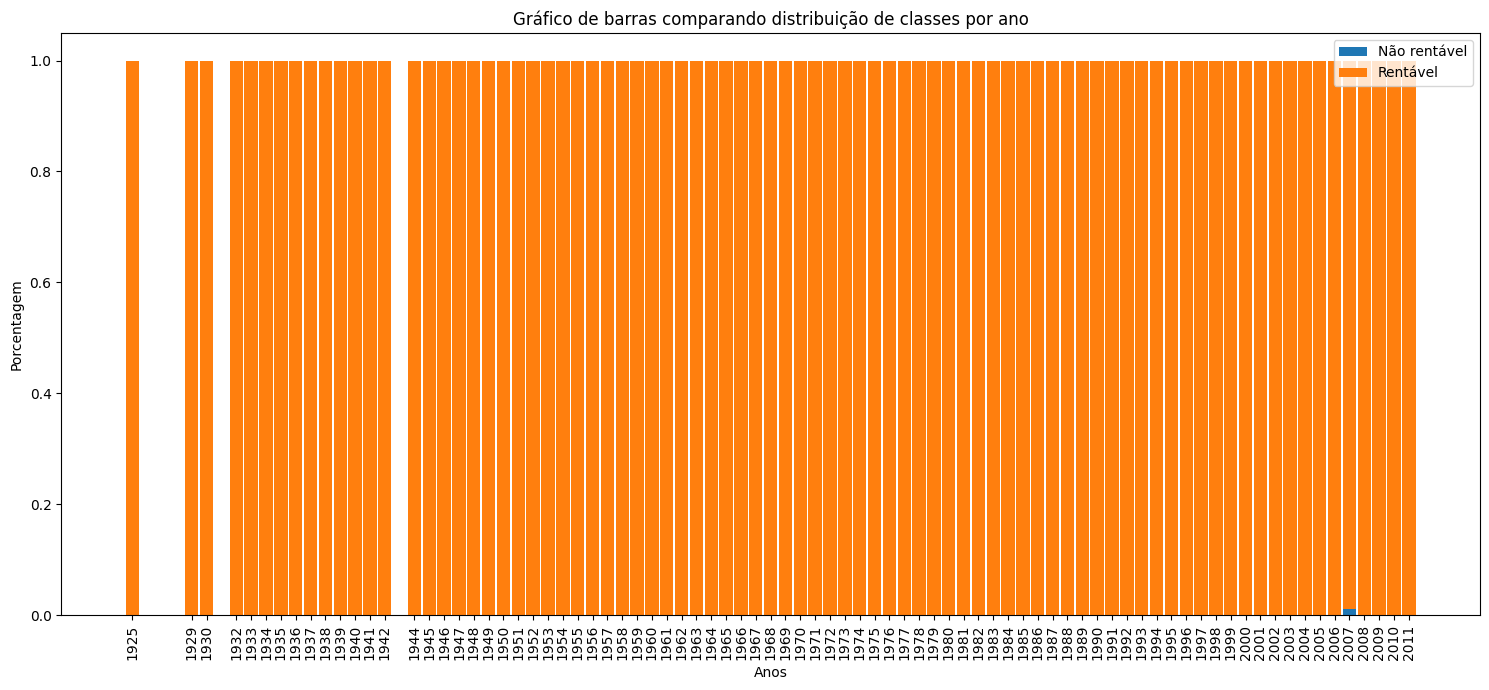

In [ ]:
x = ()
y = ()
tags = ()
anos = df_.year.sort_values().unique()
for year in anos:
    df_ano = df_[df_.year == year]
    x = x + (len(df_ano[df_ano['class'] == 0]) / len(df_ano),)
    y = y + (len(df_ano[df_ano['class'] == 1]) / len(df_ano),)
    tags += (year,)

n = len(x)
x_location = anos
bar_width = 0.9

fig, ax = plt.subplots(figsize = (15,7))


#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Não rentável')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Rentável')
# add the legend
ax.legend(('Não rentável', 'Rentável'), loc = 'upper right')
# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Anos')
# add the x axis labels
ax.set_xticks(x_location, labels = tags, rotation=90)
ax.set_xticklabels(tags)
# insert data labels to the columns
# ax.bar_label(x_bar, label_type= 'center', color = 'white')
# ax.bar_label(y_bar, label_type= 'center', color = 'white')
# title
plt.title('Gráfico de barras comparando distribuição de classes por ano')
plt.tight_layout()
plt.show()

In [ ]:
df_[(df_.year == 1936)][['title', 'year', 'budget', 'revenue', 'revenue_budget', 'class']].sort_values(by='revenue', ascending=False)

title  year       budget      revenue  \
454                     modern_times  1936 1,500,000.00 8,500,000.00   
453  the_charge_of_the_light_brigade  1936 1,200,000.00 2,736,000.00   

     revenue_budget  class  
454            5.67      1  
453            2.28      1

**Podemos ver que corrigindo o valor do filme Modern Times o algoritmo conseguiu se ajustar, gerando uma nova configuração de clusters, vamos avaliar os anos de 1999, 2003 e 2007.**

In [ ]:
df_[((df_.year == 1999) | (df_.year == 2003) | (df_.year == 2007)) & (df_['class'] == 0)][['title', 'year', 'budget', 'revenue', 'revenue_budget', 'class']].sort_values(by='revenue', ascending=False).head(10)

title  year    budget        revenue  revenue_budget  class
44  paranormal_activity  2007 15,000.00 193,355,800.00       12,890.39      0

**Os filmes listados acima foram agrupados no grupo que definimos como não rentáveis, no entanto, podemos perceber que a receita desses filmes representa mais do que o dobro do orçamento. Portanto, podemos estar tendo influência de outliers presentes na variável revenue_budget.**

**Analisemos a distribuição de revenue_budget.**

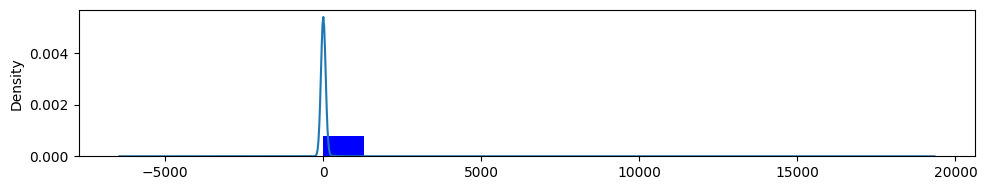

In [ ]:
# criando o figure e o axes no matplotlib

#dados to the plot
dados_revenue_budget = df_['revenue_budget']
dados_revenue = df_['revenue']

fig, ax = plt.subplots(figsize = (10,2))

#plot men_producing_percent
dados_revenue_budget.plot(kind='hist', density = True, color= 'blue') # criar o histograma -> barras verticais
dados_revenue_budget.plot(kind='kde') # criar a linha


plt.tight_layout()
plt.show()

In [ ]:
df_['revenue_budget'].describe()

count    1,942.00
mean        17.73
std        330.99
min          0.00
25%          1.16
50%          2.34
75%          4.42
max     12,890.39
Name: revenue_budget, dtype: float64

<Axes: >

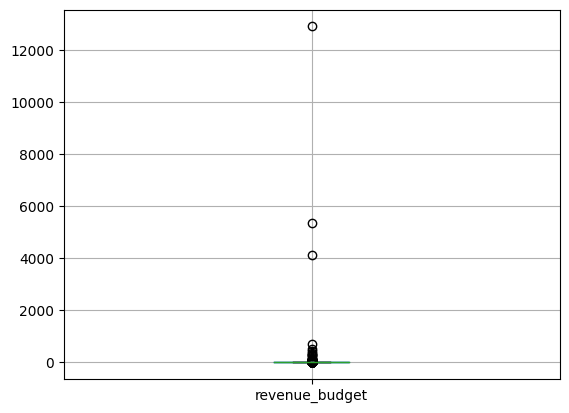

In [ ]:
df_[['revenue_budget']].boxplot()

**Podemos perceber que revenue_budget possui muitos outliers que estão interferindo no resultado que o k-means pode gerar. A fim de mitigar esse problema podemos inputar no algoritmo um filtro removendo os valores acima do terceiro quartil e alocar posteriormente de forma manual esses valores no grupo dos rentáveis.**

In [ ]:
columns_to_use = ['revenue_budget']
df_input = df_[df_['revenue_budget'] <= df_[columns_to_use].quantile(q=0.75).values[0]]
x = df_input[columns_to_use].values

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x)
x = transformer.transform(x)


kmeans = KMeans(n_clusters=2,
                    random_state=42,
                    algorithm='elkan')
kmeans.fit(x)
df_input['class'] = kmeans.labels_

#Garantindo apenas por vias didáticas que o valor 1 represena a a classe rentável e o valor 0 a classe não rentável

classe_rentavel = df_input[df_input['class'] == 1].revenue.max()
classe_nao_rentavel = df_input[df_input['class'] == 0].revenue.max()

if classe_rentavel < classe_nao_rentavel:
    df_input['class'] = np.where(df_input['class'] == 1, 0, 1)

<Axes: title={'center': 'revenue'}, xlabel='[class]'>

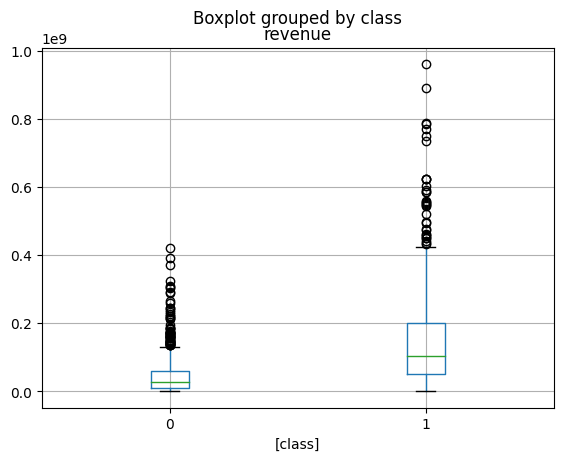

In [ ]:
df_input[['class', 'revenue']].boxplot(by='class')

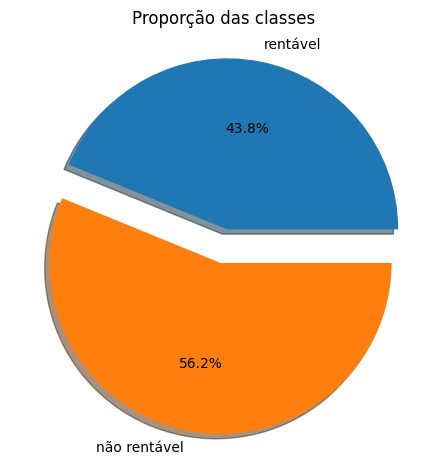

In [ ]:
#gráfico de pizza da proporção de classes
classe_rentavel = len(df_input[df_input['class'] == 1])/len(df_)*100
classe_nao_rentavel = len(df_input[df_input['class'] == 0])/len(df_)*100
valor = [classe_rentavel, classe_nao_rentavel]
label = ['rentável','não rentável']
explode = (0.1, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Proporção das classes')
plt.tight_layout()
plt.show()

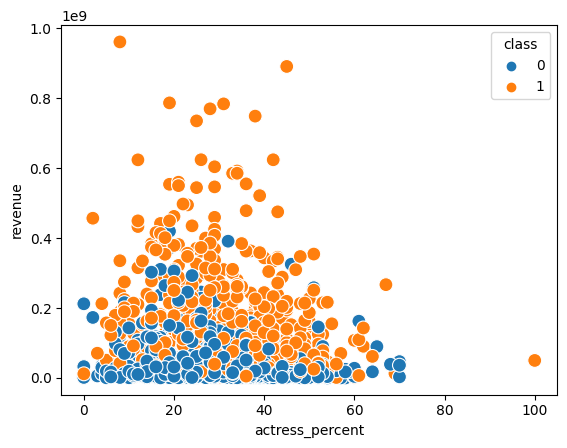

In [ ]:
sns.scatterplot(x="actress_percent", y="revenue",s=100,hue='class', data=df_input)
plt.show()

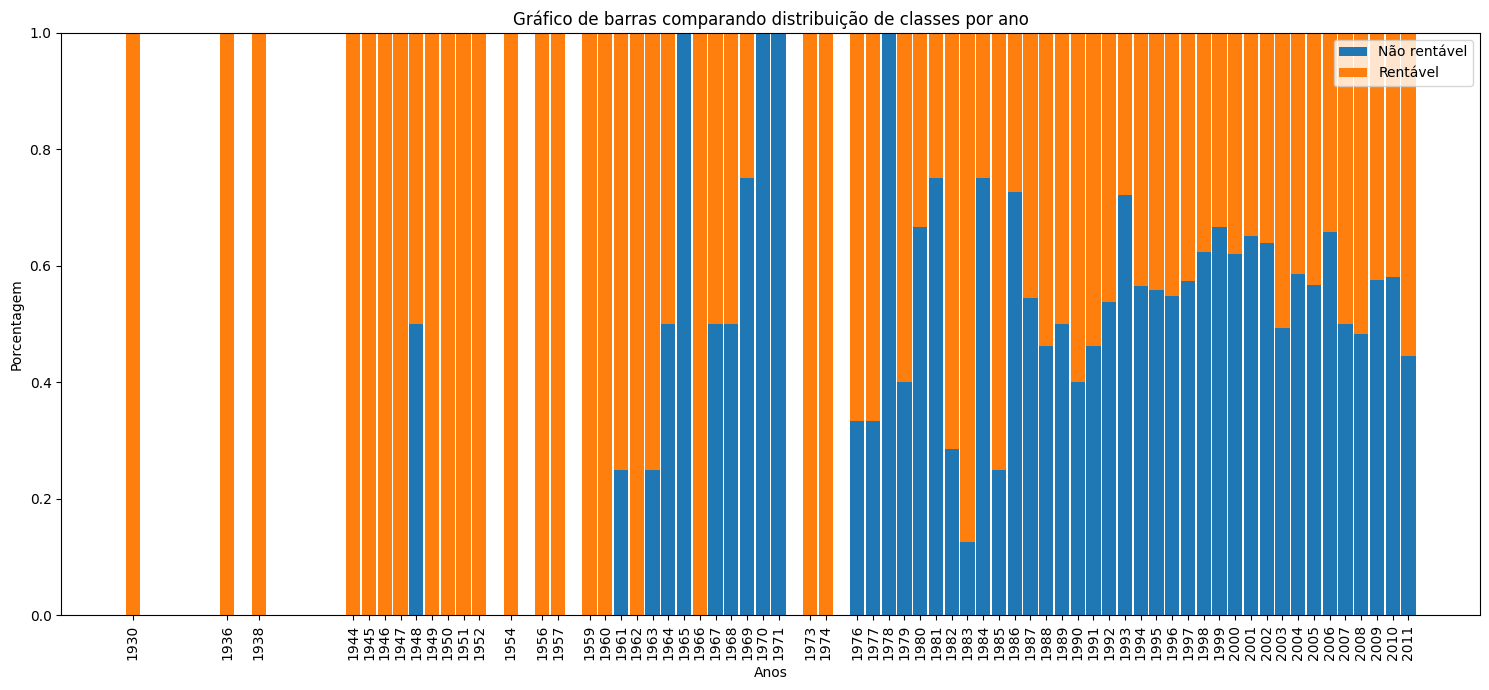

In [ ]:
x = ()
y = ()
tags = ()
anos = df_input.year.sort_values().unique()
for year in anos:
    df_ano = df_input[df_input.year == year]
    x = x + (len(df_ano[df_ano['class'] == 0]) / len(df_ano),)
    y = y + (len(df_ano[df_ano['class'] == 1]) / len(df_ano),)
    tags += (year,)

n = len(x)
x_location = anos
bar_width = 0.9

fig, ax = plt.subplots(figsize = (15,7))


#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Não rentável')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Rentável')
# add the legend
ax.legend(('Não rentável', 'Rentável'), loc = 'upper right')
# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Anos')
# add the x axis labels
ax.set_xticks(x_location, labels = tags, rotation=90)
ax.set_xticklabels(tags)
# insert data labels to the columns
# ax.bar_label(x_bar, label_type= 'center', color = 'white')
# ax.bar_label(y_bar, label_type= 'center', color = 'white')
# title
plt.title('Gráfico de barras comparando distribuição de classes por ano')
plt.tight_layout()
plt.show()

In [ ]:
df_input[(df_input.year == 1971)][['title', 'year', 'budget', 'revenue', 'revenue_budget', 'class']].sort_values(by='revenue', ascending=False)

title  year       budget       revenue  \
510                 the_andromeda_strain  1971 6,500,000.00 12,376,563.00   
515  willy_wonka_&_the_chocolate_factory  1971 3,000,000.00  4,000,000.00   

     revenue_budget  class  
510            1.90      0  
515            1.33      0

In [ ]:
df_input[(df_input.year == 2011)][['title', 'year', 'budget', 'revenue', 'revenue_budget', 'class']].sort_values(by='revenue', ascending=False).head(20)

title  year         budget        revenue  \
1346                              cars_2  2011 200,000,000.00 559,852,396.00   
200                        puss_in_boots  2011 130,000,000.00 554,987,477.00   
1251                                thor  2011 150,000,000.00 449,326,618.00   
258             the_adventures_of_tintin  2011 130,000,000.00 371,940,071.00   
1148  captain_america:_the_first_avenger  2011 140,000,000.00 370,569,774.00   
1872                  x-men:_first_class  2011 160,000,000.00 353,624,124.00   
1383  sherlock_holmes:_a_game_of_shadows  2011 125,000,000.00 334,615,000.00   
1123                          real_steel  2011 110,000,000.00 299,268,508.00   
1372                the_hangover_part_ii  2011  80,000,000.00 254,455,986.00   
440                                rango  2011 135,000,000.00 245,724,603.00   
1553     the_girl_with_the_dragon_tattoo  2011  90,000,000.00 232,617,430.00   
1292                    the_green_hornet  2011 120,000,000.00 227,817,248.00   
335                            immortals  2011  75,000,000.00 226,904,017.00   
1329                       green_lantern  2011 200,000,000.00 219,851,172.00   
1385                     just_go_with_it  2011  80,000,000.00 214,918,407.00   
1369               mr._popper's_penguins  2011  55,000,000.00 187,361,754.00   
1283                                hugo  2011 170,000,000.00 185,770,160.00   
1373                                 hop  2011  63,000,000.00 183,953,723.00   
1347                           zookeeper  2011  80,000,000.00 169,852,759.00   
1866                         the_muppets  2011  45,000,000.00 165,184,237.00   

      revenue_budget  class  
1346            2.80      1  
200             4.27      1  
1251            3.00      1  
258             2.86      1  
1148            2.65      1  
1872            2.21      1  
1383            2.68      1  
1123            2.72      1  
1372            3.18      1  
440             1.82      0  
1553            2.58      1  
1292            1.90      0  
335             3.03      1  
1329            1.10      0  
1385            2.69      1  
1369            3.41      1  
1283            1.09      0  
1373            2.92      1  
1347            2.12      1  
1866            3.67      1

**É possível observar que agora o k-means consegue gerar resultados muito mais coerentes, separando filmes em que a receita não consegue ser nem o dobro do orçamento, o que significa que o filme não foi capaz de cobrir os custos de produção. O próximo passo é filtrar os filmes que foram filtrados anteriormente para definir como rentáveis e uni-los novamente com os demais.**

In [ ]:
df_rentaveis_filtrados = df_[df_['revenue_budget'] > df_[columns_to_use].quantile(q=0.75).values[0]]

In [ ]:
df_rentaveis_filtrados['class'] = 1

In [ ]:
df_ = pd.concat([df_input, df_rentaveis_filtrados])

<Axes: title={'center': 'revenue'}, xlabel='[class]'>

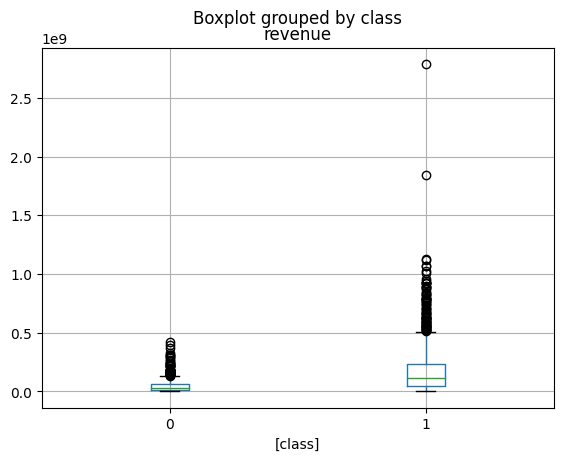

In [ ]:
df_[['class', 'revenue']].boxplot(by='class')

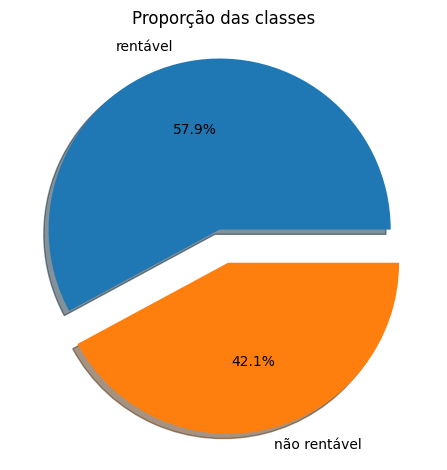

In [ ]:
#gráfico de pizza da proporção de classes
classe_rentavel = len(df_[df_['class'] == 1])/len(df_)*100
classe_nao_rentavel = len(df_[df_['class'] == 0])/len(df_)*100
valor = [classe_rentavel, classe_nao_rentavel]
label = ['rentável','não rentável']
explode = (0.1, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Proporção das classes')
plt.tight_layout()
plt.show()

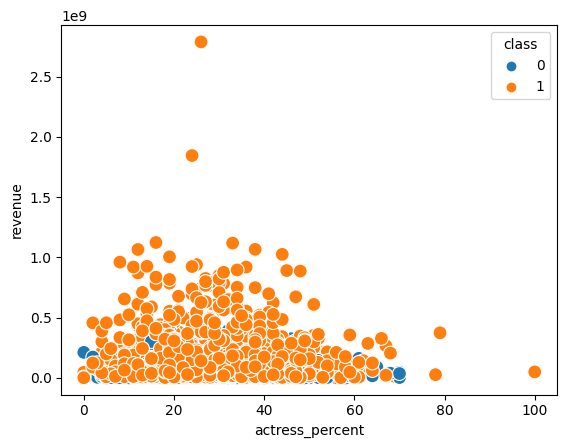

In [ ]:
sns.scatterplot(x="actress_percent", y="revenue",s=100,hue='class', data=df_)
plt.show()

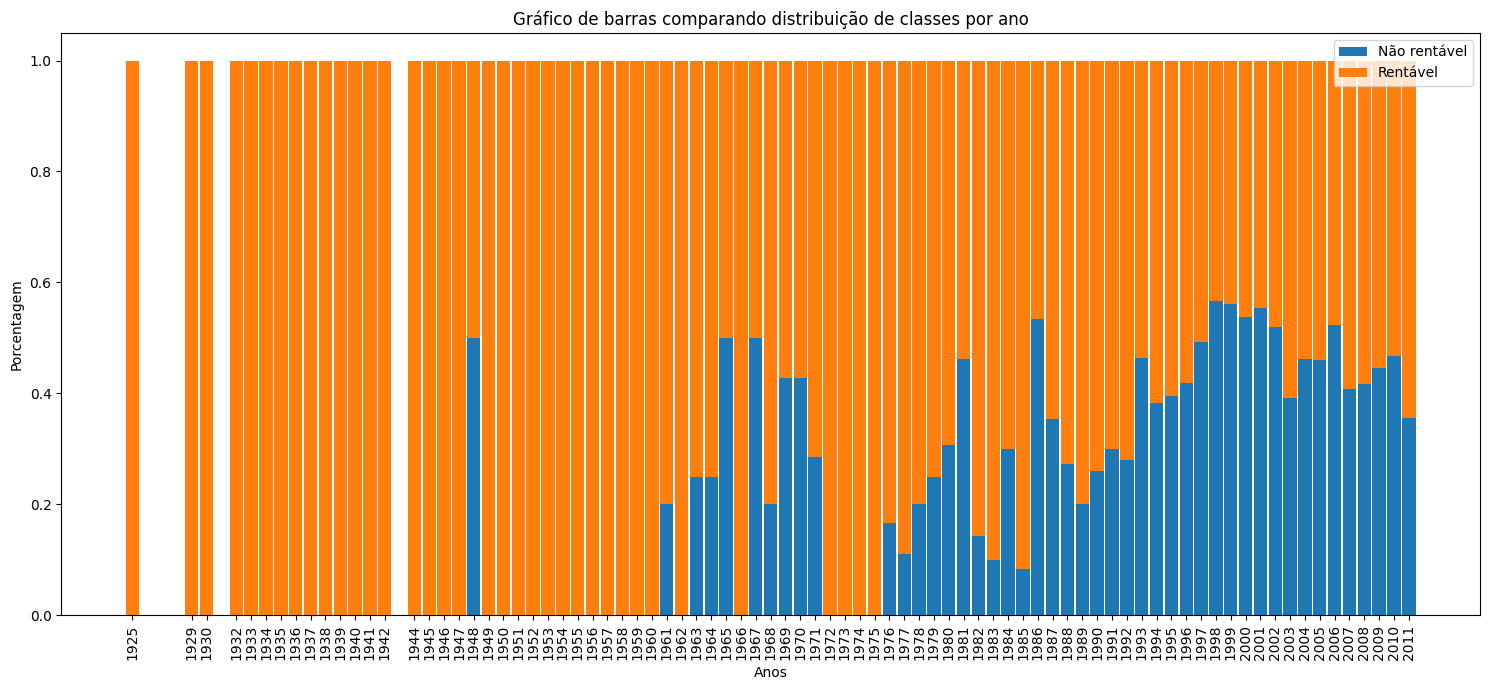

In [ ]:
x = ()
y = ()
tags = ()
anos = df_.year.sort_values().unique()
for year in anos:
    df_ano = df_[df_.year == year]
    x = x + (len(df_ano[df_ano['class'] == 0]) / len(df_ano),)
    y = y + (len(df_ano[df_ano['class'] == 1]) / len(df_ano),)
    tags += (year,)

n = len(x)
x_location = anos
bar_width = 0.9

fig, ax = plt.subplots(figsize = (15,7))


#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Não rentável')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Rentável')
# add the legend
ax.legend(('Não rentável', 'Rentável'), loc = 'upper right')
# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Anos')
# add the x axis labels
ax.set_xticks(x_location, labels = tags, rotation=90)
ax.set_xticklabels(tags)
# insert data labels to the columns
# ax.bar_label(x_bar, label_type= 'center', color = 'white')
# ax.bar_label(y_bar, label_type= 'center', color = 'white')
# title
plt.title('Gráfico de barras comparando distribuição de classes por ano')
plt.tight_layout()
plt.show()

**Podemos observar que apesar de haver uma sobreposição entre os grupos, isso não significa que a separação dos dados não está adequada, podemos observar coerência quanto ao contexto dos dados. Filmes que mal se pagaram foram separados de filmes que foram muito bem nas bilheterias. A separação foi realizada por um algoritmo não supervisionado e os resultados interpretados levando em consideração o contexto real, e tratamentos adequados foram realizados. Vale ressaltar que esta etapa serviu como uma forma de tratar a base de modo que auxilie a analisarmos como de fato a participação feminina está presente entre as duas parcelas de filmes geradas após essa etapa. Tal tratamento de dados nos permite também possibilitar a tratar a base de dados como um problema de aprendizado supervisionado de classificação, apliando as possibilidades de atender à hipótese inicial.**

# **Análise de gênero social nos dois grupos de filmes**

**Desejamos nesse ponto, avaliar como os gêneros socias se dispõe dentro dos grupos e validar se a premissa de que não interferem significativamente se mantém verdadeira.**

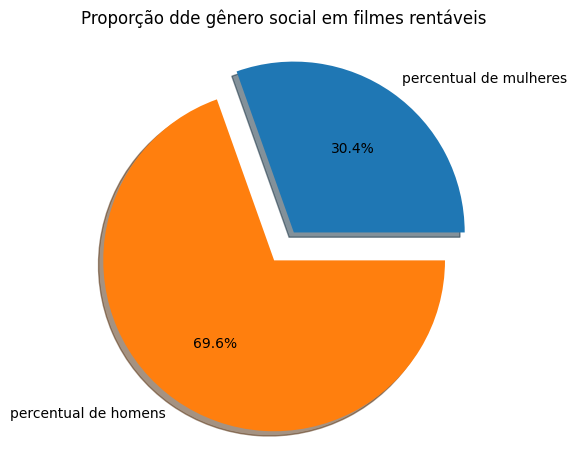

In [ ]:
#gráfico de pizza da proporção de classes
df_rentável = df_[df_['class'] == 1]
mulheres = df_rentável['actress_percent'].mean()
homens = df_rentável['actors_percent'].mean()
valor = [mulheres, homens]
label = ['percentual de mulheres','percentual de homens']
explode = (0.1, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Proporção dde gênero social em filmes rentáveis')
plt.tight_layout()
plt.show()

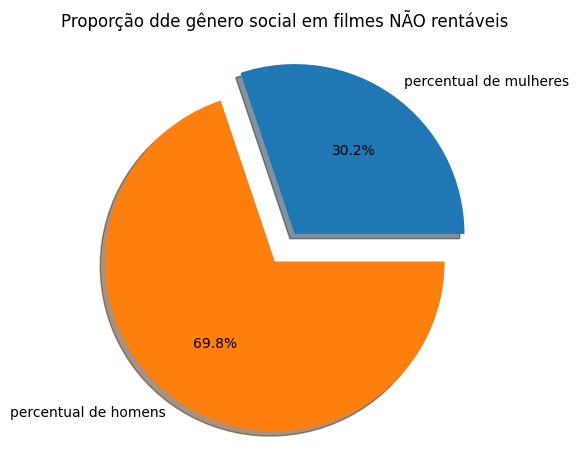

In [ ]:
#gráfico de pizza da proporção de classes
df_não_rentável = df_[df_['class'] == 0]
mulheres = df_não_rentável['actress_percent'].mean()
homens = df_não_rentável['actors_percent'].mean()
valor = [mulheres, homens]
label = ['percentual de mulheres','percentual de homens']
explode = (0.1, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('Proporção dde gênero social em filmes NÃO rentáveis')
plt.tight_layout()
plt.show()

**Como podemos observar, a premissa de que o gênero social não interfere financeiramente no potencial rentável de uma produção cinematográfica continua se mantendo verdadeira. A participação de homens é maior apenas pelo viés da indústria de Hollywood em favorecer mais homens do que mulheres em suas produções, pois a proporção de mulheres se mantem praticamente igual em ambos os grupos de filmes.**

**Vamos analisar a participação média anual de homens e mulheres levando em consideração os dois grupos de filmes.**

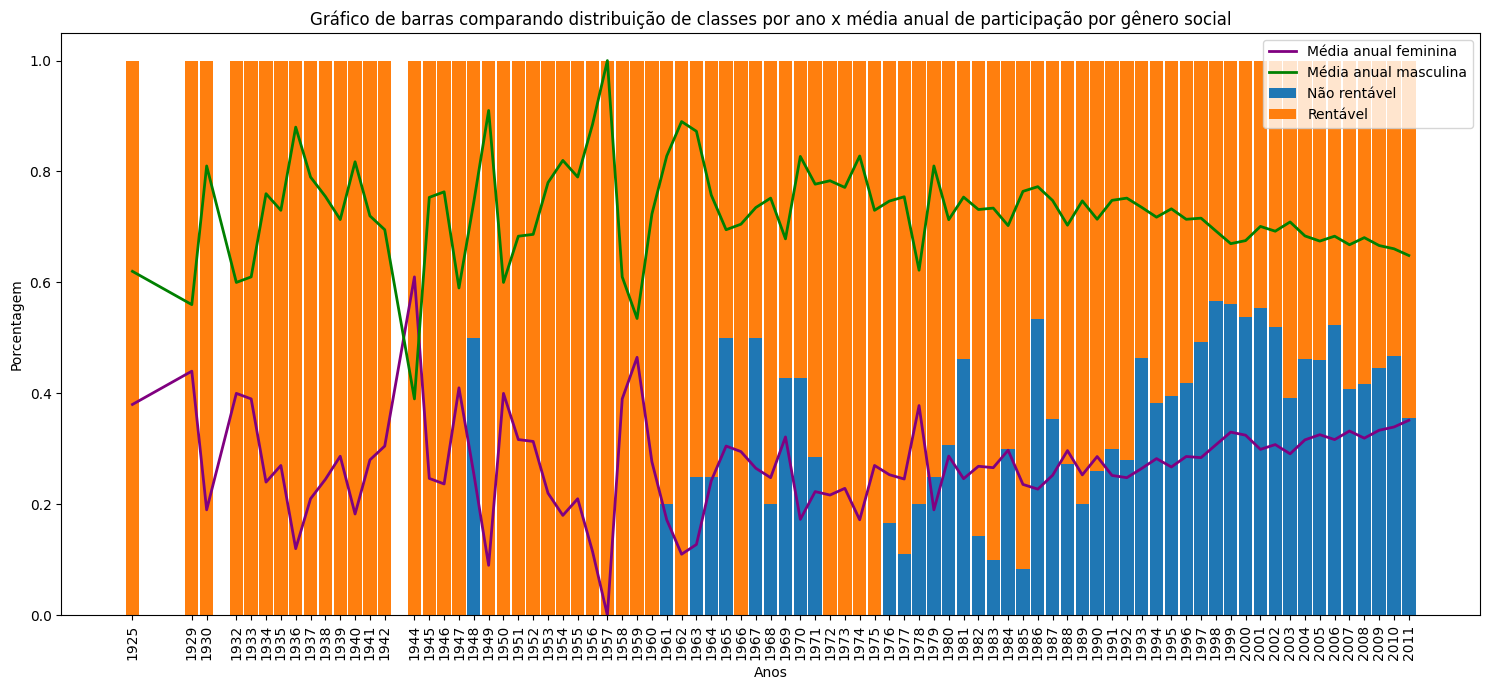

In [ ]:
x = ()
y = ()
z = ()
w = ()
tags = ()
anos = df_.year.sort_values().unique()
for year in anos:
    df_ano = df_[df_.year == year]

    x = x + (len(df_ano[df_ano['class'] == 0]) / len(df_ano),)
    y = y + (len(df_ano[df_ano['class'] == 1]) / len(df_ano),)
    z = z + (df_ano['actress_percent'].mean()/100,)
    w = w + (df_ano['actors_percent'].mean()/100,)
    tags += (year,)

n = len(x)
x_location = anos
bar_width = 0.9

fig, ax = plt.subplots(figsize = (15,7))
# ax2 = ax.twinx()
# ax3 = ax.twinx()

#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Não rentável')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Rentável')
# add the legend
# ax2.legend(('Média anual feminina'), loc = 'upper right')
# ax3.legend(('Média anual masculina'), loc = 'upper right')

# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Anos')
# add the x axis labels
ax.set_xticks(x_location, labels = tags, rotation=90)
ax.set_xticklabels(tags)

#gráfico de linha de média anual de participação feminina
z_line = ax.plot(x_location, z, label='média anual de participação feminina', color='purple', linewidth=2)
# ax2.set_ylim([0.0, 1.0])
#gráfico de linha de média anual de participação masculina
w_line = ax.plot(x_location, w, label='média anual de participação masculina', color='green', linewidth=2)

ax.legend(('Média anual feminina', 'Média anual masculina', 'Não rentável', 'Rentável'), loc = 'upper right')

# ax2.set_ylim([0.0, 1.0])
# insert data labels to the columns
# ax.bar_label(x_bar, label_type= 'center', color = 'white')
# ax.bar_label(y_bar, label_type= 'center', color = 'white')

# title
plt.title('Gráfico de barras comparando distribuição de classes por ano x média anual de participação por gênero social')
plt.tight_layout()
plt.show()

**Podemos observar uma variação estranha para ambos so gêneros sociais ao longo dos anos. Uma possibilidade disso estar acontecendo pode ser a quantidade menor de filmes em alguns anos presentes na base de dados.**

In [ ]:
df_['moviesByYear'] = df_.groupby('year').title.transform('nunique')


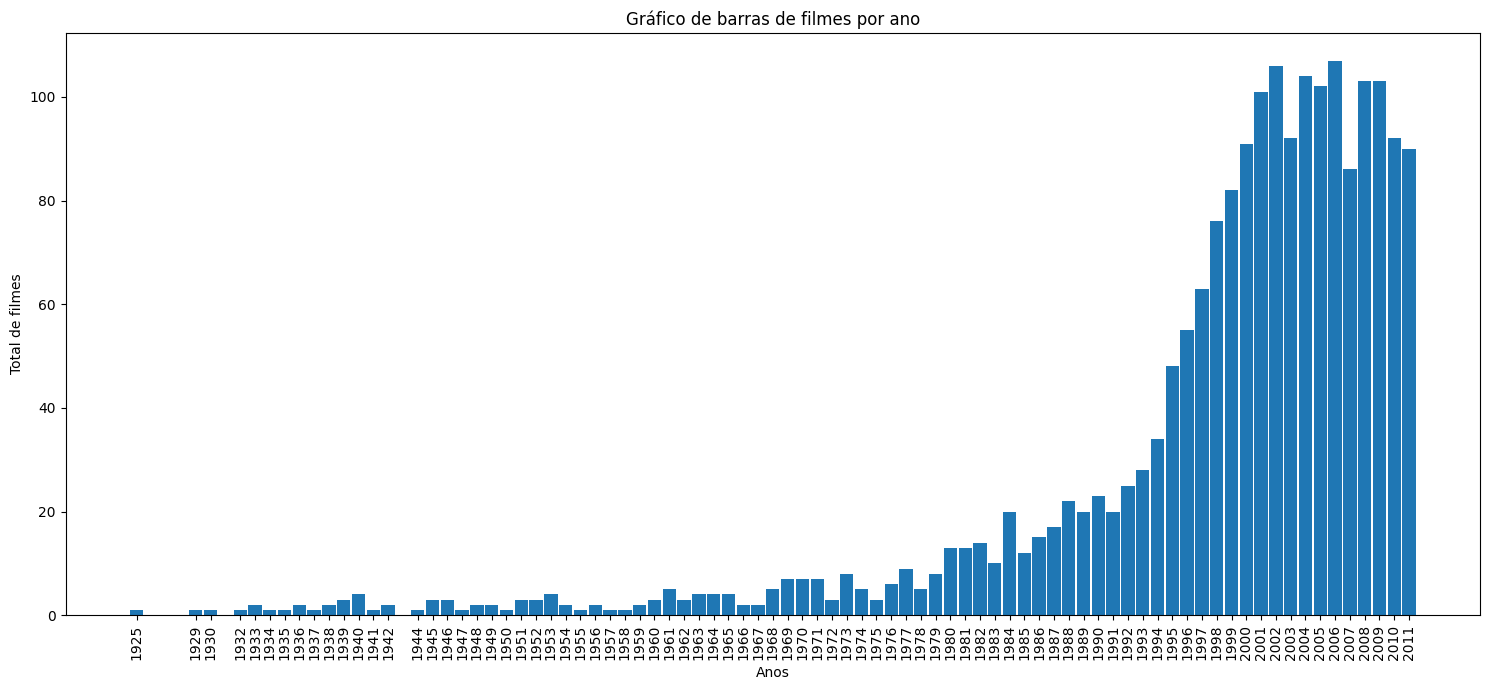

In [ ]:
x = ()
y = ()
z = ()
w = ()
tags = ()
anos = df_.year.sort_values().unique()
for year in anos:
    df_ano = df_[df_.year == year]

    x = x + (df_ano.moviesByYear.unique()[0],)
    tags += (year,)

n = len(x)
x_location = anos
bar_width = 0.9

fig, ax = plt.subplots(figsize = (15,7))

#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'filmes por ano')


# add the x and y label
ax.set_ylabel('Total de filmes')
ax.set_xlabel('Anos')
# add the x axis labels
ax.set_xticks(x_location, labels = tags, rotation=90)
ax.set_xticklabels(tags)


# title
plt.title('Gráfico de barras de filmes por ano')
plt.tight_layout()
plt.show()

**Para analisar anualmente a participação tanto masculina quanto feminina de modo mais claro sem que o número de filmes no ano afete a interpretação, iremos desconsiderar filmes com menos do que o primeiro quartil de filmes por ano.**

In [ ]:
df_['moviesByYear'].describe()

count   1,942.00
mean       74.46
std        35.08
min         1.00
25%        48.00
50%        91.00
75%       103.00
max       107.00
Name: moviesByYear, dtype: float64

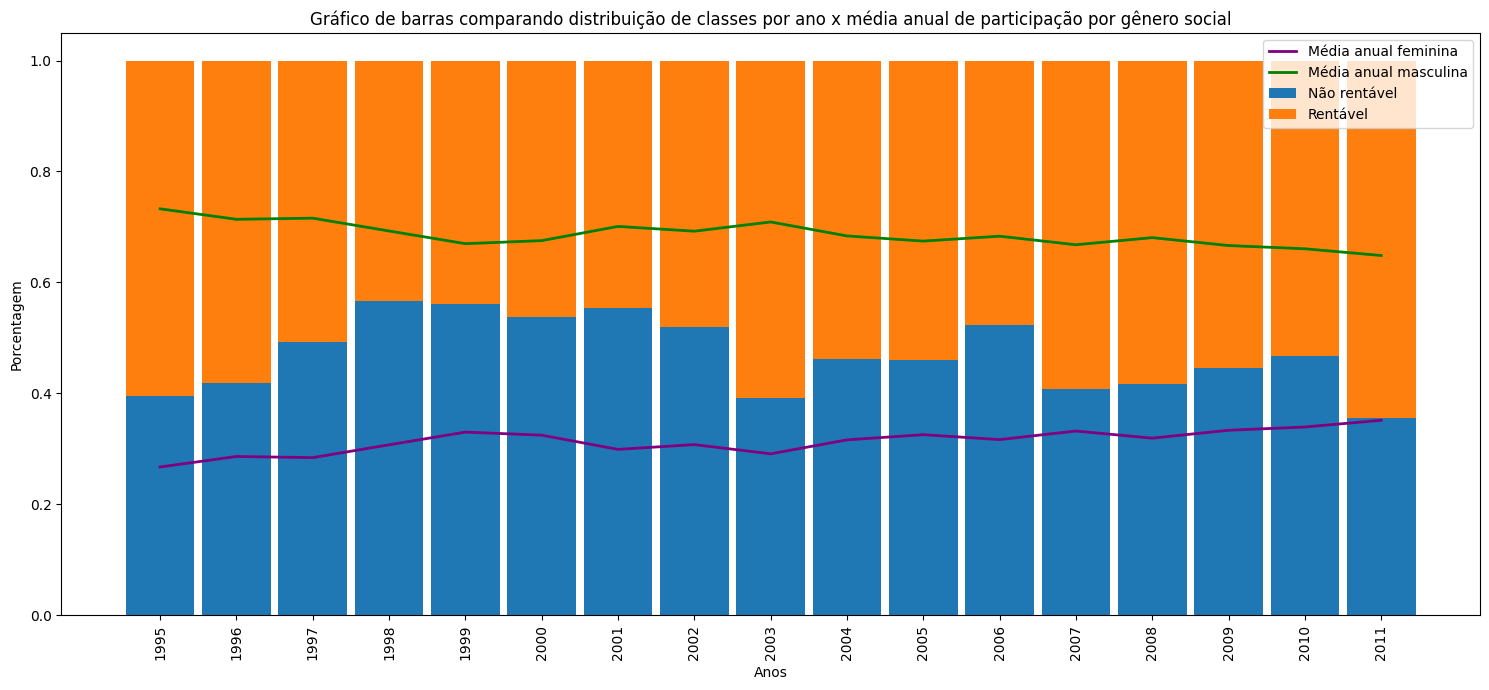

In [ ]:
x = ()
y = ()
z = ()
w = ()
tags = ()
df_filtrado = df_[df_['moviesByYear'] >= df_['moviesByYear'].quantile(q=0.25)]
anos = df_filtrado.year.sort_values().unique()
for year in anos:
    df_ano = df_filtrado[df_.year == year]

    x = x + (len(df_ano[df_ano['class'] == 0]) / len(df_ano),)
    y = y + (len(df_ano[df_ano['class'] == 1]) / len(df_ano),)
    z = z + (df_ano['actress_percent'].mean()/100,)
    w = w + (df_ano['actors_percent'].mean()/100,)
    tags += (year,)

n = len(x)
x_location = anos
bar_width = 0.9

fig, ax = plt.subplots(figsize = (15,7))
# ax2 = ax.twinx()
# ax3 = ax.twinx()

#plot the bar graph
x_bar = ax.bar(x_location, x, bar_width, label = 'Não rentável')
y_bar = ax.bar(x_location, y, bar_width, bottom= x, label = 'Rentável')
# add the legend
# ax2.legend(('Média anual feminina'), loc = 'upper right')
# ax3.legend(('Média anual masculina'), loc = 'upper right')

# add the x and y label
ax.set_ylabel('Porcentagem')
ax.set_xlabel('Anos')
# add the x axis labels
ax.set_xticks(x_location, labels = tags, rotation=90)
ax.set_xticklabels(tags)

z_line = ax.plot(x_location, z, label='média anual de participação feminina', color='purple', linewidth=2)
# ax2.set_ylim([0.0, 1.0])
w_line = ax.plot(x_location, w, label='média anual de participação masculina', color='green', linewidth=2)

ax.legend(('Média anual feminina', 'Média anual masculina', 'Não rentável', 'Rentável'), loc = 'upper right')

# ax2.set_ylim([0.0, 1.0])
# insert data labels to the columns
# ax.bar_label(x_bar, label_type= 'center', color = 'white')
# ax.bar_label(y_bar, label_type= 'center', color = 'white')
# title
plt.title('Gráfico de barras comparando distribuição de classes por ano x média anual de participação por gênero social')
plt.tight_layout()
plt.show()

**Podemos notar que 17 anos possuem mais de 48 filmes na base de dados consolidada. É possível ver uma tendência de crescimento da participação de mulheres ao longo desses anos, e acompanhando essa tendência, é possível notar também que quando ocorre variação positiva na média anual de participação de mulheres a proporção de filmes rentáveis sofre uma leve variação, bem como o oposto também ocorre. Os motivos para que isso esteja ocorrendo podem ser diversos, e como a base carece de dados sociais que possam fortalecer qualquer argumento com base em um contexto social, no entando, podemos dizer que a porcentagem de mulheres atuando sofre alterações pela influência desses fatores sociais e inferir com mais confiança que há mudança de comportamento na indústria dentro desse conjunto de filmes filtrado, corroborando para a hipótese que desejamos validar.**

# **Avaliação da correlação para seleção de variáveis**

In [ ]:
df_.columns

Index(['title', 'year', 'actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count', 'averageRating', 'numVotes', 'budget', 'revenue',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent', 'Animation', 'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult',
       'revenue_budget', 'class', 'moviesByYear'],
      dtype='object')

In [ ]:
df_.to_csv('df_.csv', index=False)

In [ ]:
columns = ['year', 'actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count', 'averageRating', 'numVotes', 'budget', 'revenue','revenue_budget', 'class',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent', 'revenue_budget', 'class']

In [ ]:
len(columns)

21

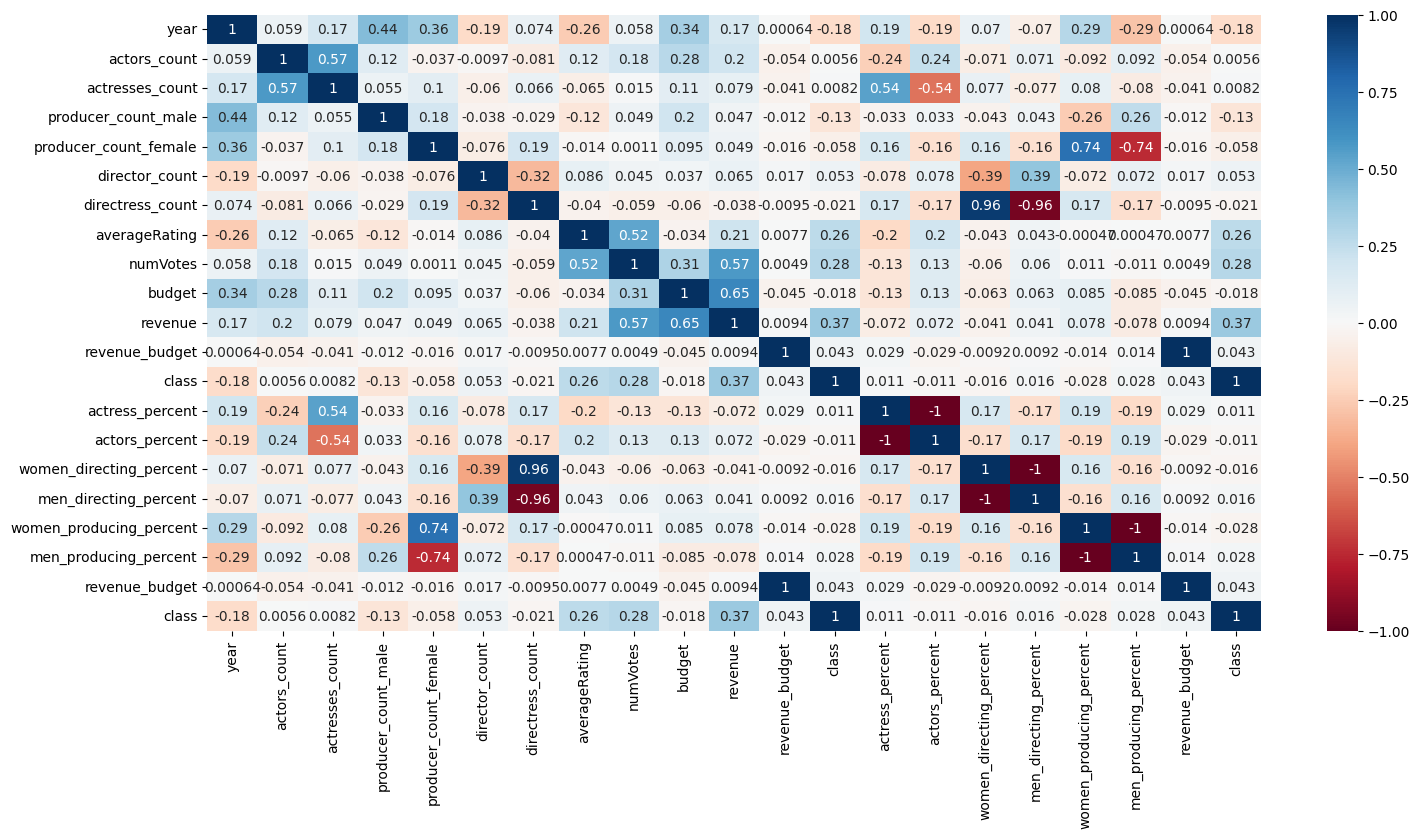

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (17,8))
sns.heatmap(df_[columns].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

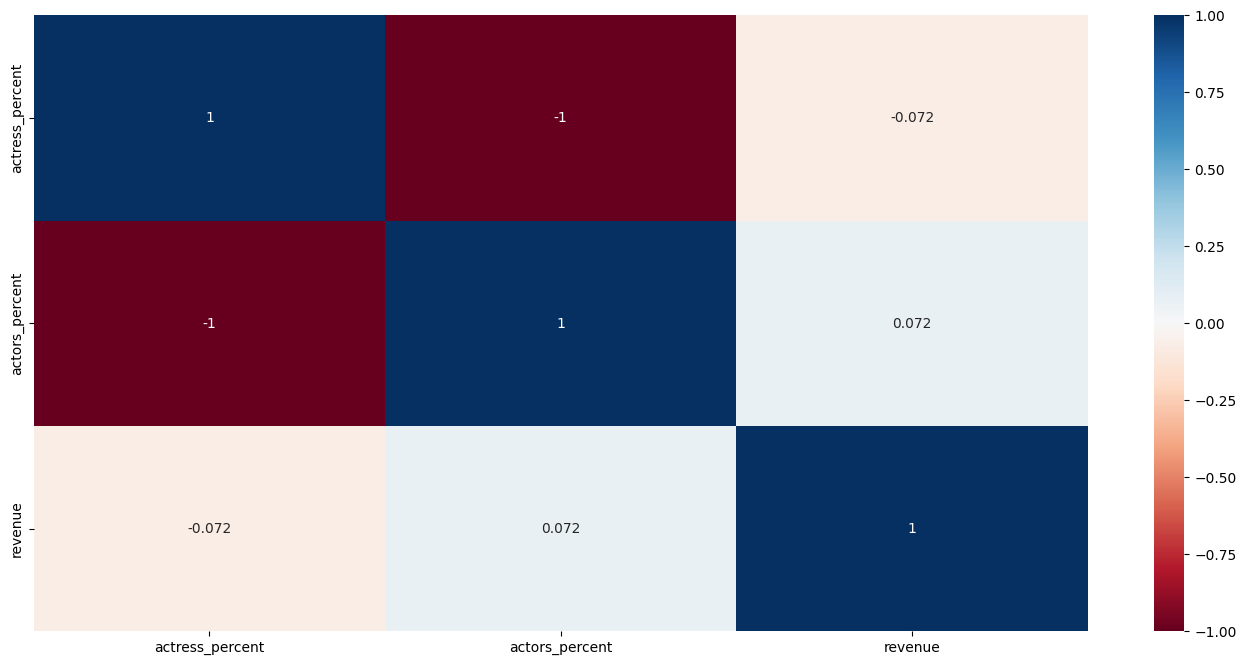

In [ ]:
plt.figure(figsize = (17,8))
sns.heatmap(df_[['actress_percent', 'actors_percent', 'revenue']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

**Aqui percebemos que que a correlação em módulo para atrizes e atores em relação a receita é a mesma.**

**Temos porém que a correlação entre atrizes e receita é negativa, indicando que os atributos são inversamente proporcionais, enquanto que a correlação entre atores e orçamento é positiva, onde estes atributos são diretamente proporcionais. No entanto, a correlação é fraca bem como a correlação entre o percentual masculino e a receita.**

**Diante disso, tem-se um indicativo, novamente, de que gênero é um fator que não influencia na receita, causando um baixo impacto no faturamento do filme, já que atrizes e atores decrescem e crescem a uma mesma taxa.**


**O uso de ambas as variáveis como entrada para tanto um modelo de classificação quanto de regressão não é recomendado, pois as duas variáveis e as demais com características semelhantes, representam redunância nos dados, o que faz sentido pois ambas são calculadas a partir de um valor em comum, que é o total de atores, produtores e diretores. Assim, a escolha fica a critério de optar por uma ou outra variável entre seus respectivos pares, ou combinações dessas duas variáveis por meio de técnicas como PCA**

**Analisamos conjuntos distintos de variáveis mais adequados para a previsão das classes e de receita por meio da análise de correlação. O critério para escolha do número de componentes é baseado no quanto os componentes são capazes de explicar os dados na base, no caso o valor escolhido é de 80%.**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columns_pca_classificacao = ['year', 'budget',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent']
# mean-centers and auto-scales the data
standardizedData = StandardScaler().fit_transform(df_[columns_pca_classificacao])

pca_classificacao = PCA(0.8)

principalComponentsClassification = pca_classificacao.fit_transform(X = standardizedData)

# To get how many principal components was chosen
print(pca_classificacao.n_components_)

4


In [ ]:
pd.DataFrame(principalComponentsClassification)

0     1     2     3
0     0.84  1.52 -3.06  0.74
1    -0.08 -0.12 -0.15 -0.82
2    -1.19  2.46 -1.83 -1.83
3    -3.77  1.28  1.82 -2.12
4     0.68  2.82 -4.03 -1.01
...    ...   ...   ...   ...
1937 -0.05 -0.72  0.19  0.29
1938 -0.06  0.07 -0.40 -0.53
1939 -1.58  0.19  0.41  1.07
1940  3.50 -1.47 -1.88 -0.54
1941 -0.61 -0.48  0.68 -0.43

[1942 rows x 4 columns]

In [ ]:
pd.DataFrame(pca_classificacao.explained_variance_ratio_)

0
0 0.35
1 0.23
2 0.21
3 0.14

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

columns_pca_regressao = ['year', 'budget', 'actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count']
# mean-centers and auto-scales the data
standardizedData = RobustScaler().fit_transform(df_[columns_pca_regressao])

pca_regressao = PCA(0.8)

principalComponentsRegression = pca_regressao.fit_transform(X = standardizedData)

# To get how many principal components was chosen
print(pca_regressao.n_components_)

4


In [ ]:
pd.DataFrame(principalComponentsRegression)

0     1     2     3
0    -0.87 -1.37 -0.62 -0.39
1    -1.22 -0.28 -0.10 -0.29
2    -4.24  1.97  0.10 -0.13
3    -4.12  0.50  0.44  0.35
4    -3.36  1.58 -0.39 -0.19
...    ...   ...   ...   ...
1937 -0.28 -0.08  0.75 -0.74
1938 -0.18 -0.91 -0.66  0.65
1939  1.32  0.63  0.70  1.29
1940  2.29  1.96 -2.09 -1.44
1941  1.17  0.64 -0.47  0.77

[1942 rows x 4 columns]

In [ ]:
pd.DataFrame(pca_regressao.explained_variance_)

0
0 2.06
1 1.38
2 0.70
3 0.50

**Por fim, temos nossas duas bases que serão utilizadas posteriormente para input em futuros algoritmos de machine learning e que reduziram pela metade a dimensionalidade dos dados. Os componentes principais em ambos são capazes de explicar satisfatoriamente os dados no modelo. Vale ressaltar que no PCA para regressão, existem componentes que estão explicando mais de 100% dos dados, isso abre questionamento sobre o peso que algumas variáveis possuem dentro da base, mesmo com a normalização, porem também abre a possibilidade de termos modelos mais simples e precisos.**

**Por fim vale ressaltar que para avaliação de um futuro modelo preditivo, o processo de Análise de componentes principais precisará ser aplicado separadamente ao conjunto de treino e teste, pois ocorrem normalizações e padronizações sendo realizadas nesse processo. O objetivo é evitar vazamento de dados do conjunto de teste para o conjunto de treino.**